In [418]:
# first we import all relevant packages
from bulk import * # bulk.py stores a lot of my personal functions, i.e. for reading from the .data files and such
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import pynbody
from scipy import stats
from scipy.stats import binned_statistic

pynbody.config['halo-class-priority'] =  [pynbody.halo.ahf.AHFCatalogue,
                                          pynbody.halo.GrpCatalogue,
                                          pynbody.halo.AmigaGrpCatalogue,
                                          pynbody.halo.legacy.RockstarIntermediateCatalogue,
                                          pynbody.halo.rockstar.RockstarCatalogue,
                                          pynbody.halo.subfind.SubfindCatalogue, pynbody.halo.hop.HOPCatalogue]

In [419]:
# we set the global matplotlib parameters so the fonts are all consistent and serif 
mpl.rc('font',**{'family':'serif','monospace':['Palatino']})
mpl.rc('text', usetex=True)
mpl.rcParams.update({'font.size': 9})
mpl.rcParams['hatch.linewidth'] = 0.8

In [420]:
def read_timescales():
    '''Function to read in the resulting data file which contains quenching and infall times'''
    data = []
    with open('/home/akinshol/Data/Timescales/QuenchingTimescales_sSFR_F19.data', 'rb') as f:
        while True:
            try:
                data.append(pickle.load(f,encoding='latin1'))
            except EOFError:
                break

    data = pd.DataFrame(data)
    return data

In [421]:
def read_new_data():
    '''Function to read in the resulting data file which contains quenching and infall times'''
    data = []
    with open('/home/akinshol/Data/Timescales/QuenchingTimescales_sSFR_F19.data', 'rb') as f:
        while True:
            try:
                data.append(pickle.load(f,encoding='latin1'))
            except EOFError:
                break

    data = pd.DataFrame(data)
    return data

In [5]:
snapnums = ['004096', '004032', '003936', '003840', '003744', '003648', '003606', '003552', '003456', '003360', '003264', '003195', '003168', '003072','002976', '002880', '002784', '002688', '002592', '002554', '002496', '002400', '002304','002208', '002112', '002088', '002016', '001920', '001824','001740','001728','001632', '001536', '001475', '001440', '001344', '001269', '001248','001152', '001106', '001056', '000974', '000960','000864', '000776', '000768', '000672', '000637', '000576', '000480', '000456', '000384', '000347', '000288', '000275', '000225', '000192', '000188', '000139', '000107', '000096', '000071']

haloids = {
    1: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 5, 19, 16],
    11: [11, 8, 7, 7, 7, 7, 7, 6, 5, 6, 6, 5, 5, 6, 6, 7, 6, 6, 6, 6, 8, 8, 8, 7, 7, 7, 7, 7, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 8, 8, 8, 9, 9, 10, 10, 10, 14, 13, 15, 16, 18, 20, 21, 20, 21, 24, 20, 21, 32],
    31: [31, 31, 31, 32, 32, 29, 28, 19, 15, 14, 15, 14, 14, 15, 14, 14, 14, 14, 14, 14, 13, 13, 13, 12, 11, 11, 11, 11, 11, 11, 11, 10, 10, 9, 10, 10, 19, 23, 24, 26, 27, 38, 39, 38, 41, 41, 48, 43, 46, 46, 49, 61, 62, 70, 73, 92, 84, 81, 106],
    33: [33, 33, 34, 34, 33, 33, 33, 35, 35, 34, 34, 32, 32, 32, 31, 31, 27, 27, 28, 32, 17, 16, 16, 16, 15, 14, 13, 15, 14, 14, 13, 12, 12, 12, 12, 15, 14, 16, 15, 14, 14, 15, 15, 14, 17, 17, 22, 69, 52, 50, 52, 65, 95, 179, 196, 189, 212, 205],
    40: [40, 39, 30, 28, 27, 27, 26, 27, 26, 27, 28, 27, 27, 29, 28, 29, 28, 28, 26, 27, 28, 27, 27, 28, 28, 28, 29, 29, 28, 27, 28, 27, 27, 28, 29, 29, 28, 29, 30, 28, 28, 23, 24, 24, 26, 28, 43, 41, 45, 41, 40, 54, 86, 91, 90, 74, 61, 60, 91],
    64: [64, 63, 63, 62, 61, 65, 64, 64, 60, 58, 59, 56, 57, 56, 52, 50, 47, 44, 45, 44, 43, 44, 41, 41, 40, 40, 40, 38, 39, 41, 41, 43, 43, 43, 42, 39, 44, 46, 45, 43, 44, 41, 41, 40, 53, 52, 54, 59, 70, 151, 151, 157, 159, 170, 176, 143, 99, 95, 77, 60],
    103: [103, 102, 103, 104, 107, 108, 109, 110, 108, 108, 107, 105, 106, 107, 109, 114, 124, 125, 111, 105, 98, 96, 99, 113, 96, 93, 81, 76, 76, 73, 75, 74, 72, 68, 68, 63, 61, 60, 48, 45, 41, 29, 28, 32, 33, 34, 41, 38, 39, 48, 50, 51, 49, 49, 50, 48, 67, 69, 64],
    133: [133, 132, 132, 128, 131, 129, 131, 130, 125, 125, 123, 117, 118, 118, 114, 100, 95, 95, 93, 92, 92, 87, 89, 84, 83, 84, 83, 78, 69, 64, 67, 66, 54, 38, 37, 32, 33, 33, 33, 31, 30, 27, 27, 25, 27, 26, 32, 33, 33, 33, 38, 47, 65, 130, 136, 219],
    137: [137, 138, 136, 137, 140, 136, 137, 138, 139, 139, 139, 137, 140, 143, 140, 133, 122, 122, 117, 113, 66, 55, 56, 53, 54, 54, 52, 52, 52, 46, 45, 44, 37, 31, 24, 14, 13, 15, 14, 13, 13, 16, 16, 15, 16, 16, 20, 21, 23, 23, 20, 23, 23, 22, 19, 19, 15, 15, 11, 20, 23],
    146: [146, 148, 148, 147, 148, 148, 148, 148, 150, 152, 151, 150, 154, 154, 155, 158, 157, 159, 157, 154, 154, 152, 152, 151, 154, 157, 158, 160, 155, 155, 156, 161, 162, 158, 155, 156, 160, 162, 165, 162, 156, 163, 164, 159, 156, 159, 161, 165, 163, 155, 153, 143, 145, 141, 141, 117, 111, 108, 62, 40, 28, 8],
    185: [185, 185, 183, 179, 181, 181, 178, 175, 174, 172, 169, 165, 166, 167, 166, 163, 159, 155, 146, 141, 137, 125, 119, 104, 97, 99, 94, 86, 83, 82, 80, 78, 73, 66, 66, 60, 59, 59, 55, 56, 53, 48, 47, 49, 59, 60, 58, 58, 60, 66, 65, 64, 61, 71, 69, 66, 64, 64, 44, 44, 43],
    447: [447, 438, 429, 409, 381, 359, 549, 434, 230, 191, 213]
}

rvirs = {
    11: [62.0, 61.08, 59.71, 58.36, 57.02, 55.69, 55.21, 54.6, 53.45, 52.19, 51.03, 50.04, 49.57, 48.05, 46.67, 45.2, 43.78, 42.09, 39.97, 38.72, 36.19, 34.38, 33.03, 31.71, 30.55, 30.28, 29.41, 28.28, 27.19, 26.24, 26.09, 24.85, 23.62, 22.76, 22.32, 21.02, 20.06, 19.79, 18.54, 17.98, 17.37, 16.39, 16.19, 14.79, 13.54, 13.44, 12.07, 11.61, 10.88, 9.12, 8.61, 6.85, 5.95, 4.76, 4.42, 3.49, 2.91, 2.83, 1.69],
    31: [49.46, 48.73, 47.63, 46.55, 45.48, 44.43, 43.97, 43.38, 42.34, 41.32, 40.3, 39.57, 39.29, 38.28, 37.22, 36.14, 35.08, 33.98, 32.9, 32.48, 31.83, 30.64, 29.47, 28.46, 27.48, 27.24, 26.44, 25.33, 24.24, 23.31, 23.05, 22.27, 21.41, 20.66, 20.11, 19.08, 16.15, 15.68, 14.13, 13.57, 12.7, 10.25, 10.07, 9.03, 8.2, 8.11, 7.21, 6.89, 6.38, 5.64, 5.37, 4.18, 3.72, 3.03, 2.86, 2.07, 1.85, 1.82, 1.1],
    33: [35.93, 35.37, 34.55, 33.73, 32.95, 32.18, 31.86, 31.46, 30.8, 30.19, 29.66, 29.37, 29.24, 28.91, 34.66, 33.74, 32.83, 31.92, 31.01, 30.65, 30.11, 29.21, 28.31, 27.22, 26.21, 26.0, 25.23, 23.66, 22.75, 21.97, 21.84, 20.88, 19.88, 19.24, 18.83, 17.74, 16.92, 16.67, 15.61, 15.11, 14.58, 13.77, 13.62, 12.51, 11.16, 11.03, 9.91, 3.7, 5.3, 5.31, 5.15, 4.1, 3.14, 2.07, 1.95, 1.58, 1.3, 1.27],
    40: [40.02, 39.42, 38.54, 37.66, 36.8, 35.94, 35.57, 35.1, 34.26, 33.43, 32.56, 31.96, 31.73, 30.81, 29.9, 29.01, 28.1, 27.24, 26.34, 25.96, 25.42, 24.52, 23.56, 22.65, 21.77, 21.56, 20.91, 20.09, 19.35, 18.65, 18.54, 17.71, 16.79, 16.21, 15.88, 14.98, 14.24, 14.03, 13.1, 12.67, 12.26, 11.72, 11.64, 10.7, 9.45, 9.29, 7.35, 6.95, 6.35, 5.79, 5.53, 4.38, 3.28, 2.71, 2.59, 2.23, 2.09, 2.05, 1.15],
    64: [32.14, 31.66, 30.95, 30.25, 29.55, 28.87, 28.57, 28.19, 27.51, 26.85, 26.18, 25.71, 25.53, 24.88, 24.23, 23.59, 22.95, 22.31, 21.68, 21.43, 21.04, 20.4, 19.76, 19.13, 18.5, 18.36, 17.9, 17.28, 16.64, 16.06, 15.98, 15.31, 14.57, 14.11, 13.88, 13.05, 12.27, 12.07, 11.06, 10.73, 10.39, 9.76, 9.68, 8.77, 7.63, 7.58, 6.84, 6.32, 5.51, 3.56, 3.39, 2.82, 2.58, 2.11, 2.01, 1.76, 1.72, 1.69, 1.21, 0.9],
    103: [22.56, 22.3, 21.7, 21.22, 20.76, 20.28, 20.07, 19.81, 19.39, 18.96, 18.57, 18.29, 18.18, 17.81, 15.45, 12.92, 12.57, 12.22, 11.87, 11.74, 11.53, 11.18, 8.38, 4.1, 6.84, 8.19, 12.02, 13.63, 13.15, 12.72, 12.66, 12.13, 11.66, 11.38, 11.25, 10.98, 10.92, 10.93, 10.86, 10.66, 10.83, 11.07, 11.0, 9.9, 8.88, 8.79, 7.55, 7.2, 6.57, 5.53, 5.27, 4.47, 4.14, 3.55, 3.43, 2.8, 2.02, 1.94, 1.29],
    133: [24.29, 23.93, 23.39, 22.86, 22.33, 21.82, 21.59, 21.3, 20.79, 20.29, 19.79, 19.43, 19.29, 18.8, 18.31, 17.82, 17.34, 16.86, 16.38, 16.19, 15.9, 15.47, 15.03, 14.6, 14.18, 14.07, 13.81, 13.53, 17.11, 16.54, 16.45, 15.79, 15.12, 14.7, 14.45, 13.77, 13.35, 13.21, 12.59, 12.32, 11.93, 11.22, 11.1, 10.25, 9.27, 9.25, 8.6, 8.07, 7.33, 6.06, 5.62, 4.61, 3.65, 2.36, 2.2, 1.52],
    137: [19.65, 19.36, 18.93, 18.5, 18.07, 17.65, 17.47, 17.24, 16.83, 16.42, 16.1, 15.77, 15.67, 15.35, 21.84, 21.26, 20.68, 20.11, 19.54, 19.31, 18.97, 18.4, 17.83, 17.27, 16.7, 16.56, 16.15, 15.66, 15.28, 15.15, 21.45, 20.59, 19.72, 19.16, 18.84, 17.95, 17.31, 17.12, 16.04, 15.47, 14.84, 13.75, 13.6, 12.6, 11.65, 11.56, 10.27, 9.85, 9.1, 7.82, 7.43, 6.26, 5.76, 4.78, 4.58, 3.81, 3.37, 3.31, 2.32, 1.28, 1.0],
    146: [19.65, 19.36, 18.93, 18.5, 18.13, 17.75, 17.52, 17.28, 16.83, 16.47, 16.01, 15.8, 15.62, 15.24, 14.88, 14.39, 14.03, 13.58, 13.19, 13.04, 12.8, 12.37, 12.03, 11.58, 11.2, 11.09, 10.81, 10.4, 9.99, 9.65, 9.6, 9.18, 8.75, 8.49, 8.34, 7.9, 7.55, 7.45, 6.99, 6.78, 6.56, 6.17, 6.1, 5.66, 5.22, 5.17, 4.65, 4.44, 4.05, 3.5, 3.37, 2.92, 2.65, 2.27, 2.2, 1.9, 1.65, 1.63, 1.31, 1.03, 0.95],
    185: [25.07, 24.7, 24.14, 23.6, 23.05, 22.52, 22.29, 21.99, 21.46, 20.94, 20.43, 20.06, 19.91, 19.4, 18.9, 18.4, 17.9, 17.4, 16.91, 16.71, 16.42, 15.92, 15.43, 14.94, 14.45, 14.33, 13.96, 13.47, 12.97, 12.54, 12.47, 11.97, 11.66, 12.42, 12.21, 11.64, 11.18, 11.05, 10.46, 10.17, 9.81, 9.29, 9.18, 8.32, 7.35, 7.27, 6.57, 6.32, 5.83, 4.78, 4.54, 4.13, 3.75, 3.02, 2.93, 2.42, 2.05, 2.02, 1.51, 0.99, 0.86],
    447: [25.07, 24.7, 24.14, 23.6, 23.05, 22.52, 22.29, 21.99, 21.46, 20.94, 20.43]
}

In [44]:
print(len(snapnums))

62


In [78]:
i1, i2 = 55,51 # snapshots to step between
f_base = '/home/christenc/Data/Sims/h329.cosmo50PLK.3072g/h329.cosmo50PLK.3072gst5HbwK1BH/snapshots_200bkgdens/h329.cosmo50PLK.3072gst5HbwK1BH.'
f1 = f_base + snapnums[i1]
f2 = f_base + snapnums[i2]
s1 = pynbody.load(f1)
s2 = pynbody.load(f2)

In [79]:
h1 = s1.halos()
h2 = s2.halos()

In [93]:
b = pynbody.bridge.OrderBridge(s1,s2, order_array='iord', allow_family_change=True)

In [50]:
z0haloid = 11
print(f'Halo {z0haloid} in snapshot {snapnums[i1]} is actually halo {haloids[z0haloid][i1]} with rvir {rvirs[z0haloid][i1]}.')
print(f'Halo {z0haloid} in snapshot {snapnums[i2]} is actually halo {haloids[z0haloid][i2]} with rvir {rvirs[z0haloid][i2]}.')

Halo 11 in snapshot 000225 is actually halo 24 with rvir 3.49.
Halo 11 in snapshot 000275 is actually halo 21 with rvir 4.42.


In [51]:
s1.physical_units()
s2.physical_units()

In [94]:
filtered_gas_particles_s1 = h1[1].g
filtered_gas_particles_s2 = b(filtered_gas_particles_s1)

In [26]:
gas_cool_filt = pynbody.filt.LowPass('temp', 1e4) # select all gas particles with T < 1e4 K
gas_highdens_filt = pynbody.filt.HighPass('rho',2453000) # select all gas particles with rho > 0.1 amu/cc (converted into Msol/kpc**3)
gas_filt = gas_cool_filt & gas_highdens_filt 

In [27]:
print(f'In snapshot {snapnums[i1]}, roughly {len(h1[haloids[z0haloid][i1]].g[gas_filt])/len(h1[haloids[z0haloid][i1]])*100:.2f}% of the satellite gas is hot and diffuse')
print(f'In snapshot {snapnums[i2]}, roughly {len(h2[haloids[z0haloid][i2]].g[gas_filt])/len(h2[haloids[z0haloid][i2]])*100:.2f}% of the satellite gas is hot and diffuse')

In snapshot 000974, roughly 2.60% of the satellite gas is hot and diffuse
In snapshot 001056, roughly 1.64% of the satellite gas is hot and diffuse


Centering halo
Making plot


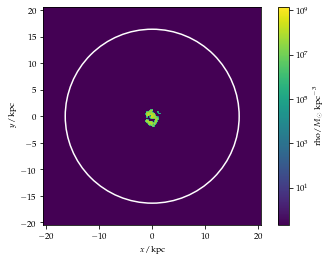

In [28]:
print('Centering halo')
pynbody.analysis.angmom.faceon(h1[haloids[z0haloid][i1]])
print('Making plot')
img_width = str(round(rvirs[z0haloid][i1]*2.5,2)) + ' kpc'

pynbody.plot.sph.image(h1[haloids[z0haloid][i1]].g[gas_filt], width=img_width)
circle = plt.Circle((0,0),rvirs[z0haloid][i1],color = 'w', linestyle='-', fill=False, linewidth=1.5)
plt.gca().add_artist(circle)
plt.show()

In [61]:
np.sum(filtered_gas_particles_s1.g['mass']) - np.sum(filtered_gas_particles_s2.g['mass'])

SimArray(69188087.14336228, 'Msol')

In [25]:
print(len(h1[haloids[z0haloid][i1]].g))
print(len(h2[haloids[z0haloid][i2]].g))

21074
17937


Centering halo
Making plot


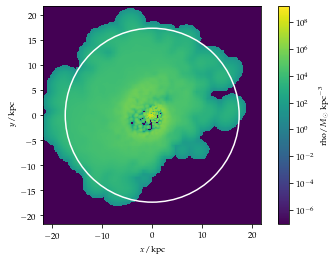

In [76]:
print('Centering halo')
pynbody.analysis.angmom.faceon(h2[haloids[z0haloid][i2]])
print('Making plot')
img_width = str(round(rvirs[z0haloid][i2]*2.5,2)) + ' kpc'

pynbody.plot.sph.image(filtered_gas_particles_s2.g, width=img_width)
circle = plt.Circle((0,0),rvirs[z0haloid][i2],color = 'w', linestyle='-', fill=False, linewidth=1.5)
plt.gca().add_artist(circle)
plt.show()

# Following an Individual Halo at Infall: h242, halo 80

In [104]:
snapnums = ['004096', '004032', '003936', '003840', '003744', '003648', '003606', '003552', '003456', '003360', '003264', '003195', '003168', '003072','002976', '002880', '002784', '002688', '002592', '002554', '002496', '002400', '002304','002208', '002112', '002088', '002016', '001920', '001824','001740','001728','001632', '001536', '001475', '001440', '001344', '001269', '001248','001152', '001106', '001056', '000974', '000960','000864', '000776', '000768', '000672', '000637', '000576', '000480', '000456', '000384', '000347', '000288', '000275', '000225', '000192', '000188', '000139', '000107', '000096', '000071']

haloids = {
    1: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 4, 4, 4, 2],
    10: [10, 10, 9, 7, 7, 8, 7, 7, 7, 4, 5, 5, 5, 6, 6, 4, 3, 3, 3, 3, 3, 4, 5, 5, 6, 6, 4, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 6, 9, 9, 9, 10, 10, 9, 13, 14, 16, 18, 18, 18, 20],
    12: [12, 12, 12, 9, 10, 11, 10, 10, 10, 9, 10, 6, 6, 5, 4, 3, 4, 4, 4, 4, 4, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 4, 4, 4, 4, 4, 5, 6, 6, 7, 8, 8, 8, 8, 10, 11, 10, 7, 6, 11, 11, 7, 11, 11, 9, 5, 6, 9],
    24: [24, 24, 25, 26, 25, 25, 25, 24, 24, 23, 24, 25, 24, 22, 22, 22, 21, 20, 19, 19, 19, 19, 19, 20, 19, 19, 17, 20, 21, 21, 20, 21, 17, 16, 17, 15, 15, 16, 15, 18, 17, 17, 17, 20, 21, 21, 20, 21, 24, 26, 28, 25, 24, 27, 29, 23, 20, 19, 14, 12, 16, 17],
    30: [30, 29, 29, 31, 29, 28, 29, 29, 30, 32, 30, 29, 28, 26, 25, 24, 22, 22, 20, 20, 20, 21, 21, 22, 21, 21, 18, 19, 18, 17, 16, 17, 15, 13, 14, 12, 13, 14, 13, 13, 13, 14, 14, 13, 15, 15, 14, 15, 16, 16, 17, 18, 16, 14, 12, 8, 9, 9, 8, 6, 5, 4],
    34: [34, 33, 34, 36, 35, 35, 34, 34, 35, 36, 33, 33, 33, 33, 33, 33, 33, 32, 32, 32, 32, 31, 31, 30, 30, 31, 28],
    40: [40, 40, 41, 44, 41, 41, 42, 41, 42, 42, 40, 39, 40, 39, 38, 38, 38, 38, 38, 38, 39, 38, 37, 38, 38, 38, 37, 36, 37, 35, 34, 34, 34, 32, 33, 34, 32, 34, 35, 38, 40, 38, 38, 42, 38, 38, 39, 40, 45, 50, 49, 49, 52, 57, 55, 50, 40, 41, 31, 25, 26],
    41: [41, 41, 42, 43, 44, 29, 26, 23, 20, 19, 19, 19, 19, 18, 18, 18, 19, 18, 18, 18, 18, 20, 20, 21, 22, 22, 21, 23, 28, 28, 28, 27, 29, 27, 28, 29, 27, 29, 32, 34, 35, 29, 29, 28, 26, 26, 34, 43, 121, 121, 115, 101, 103, 87, 82, 77, 122, 156, 122],
    44: [44, 44, 45, 48, 46, 45, 47, 46, 48, 50, 48, 50, 53, 51, 51, 52, 50, 52, 52, 53, 51, 51, 49, 50, 49, 50, 49, 50, 51, 48, 48, 45, 43, 39, 41, 41, 37, 39, 41, 46, 46, 46, 44, 46, 39, 39, 41, 41, 47, 53, 50, 46, 47, 50, 52, 53, 41, 40, 34, 30, 28, 25],
    48: [48, 50, 48, 51, 51, 50, 52, 51, 54, 54, 52, 53, 57, 55, 53, 53, 53, 54, 54, 54, 54, 53, 51, 49, 48, 48, 47, 51, 55, 54, 53, 57, 57, 57, 59, 60, 58, 61, 68, 68, 67, 67, 66, 69, 66, 66, 56, 57, 66, 67, 65, 59, 64, 71, 75, 85, 95, 94, 86, 77],
    49: [49, 49, 47, 50, 50, 49, 50, 50, 53, 55, 53, 55, 69, 56, 55, 55, 56, 55, 55, 57, 56, 58, 54, 57, 57, 57, 57, 60, 64, 65, 65, 69, 72, 73, 75, 79, 78, 83, 86, 86, 85, 81, 81, 83, 79, 79, 85, 94, 97, 100, 100, 103, 95, 92, 87, 91, 83, 84, 150],
    71: [71, 70, 72, 75, 75, 75, 75, 73, 72, 75, 71, 72, 72, 68, 66, 66, 67, 66, 66, 58, 57, 55, 53, 53, 50, 49, 48, 49, 53, 52, 51, 48, 48, 47, 50, 48, 42, 44, 46, 49, 48, 51, 53, 56, 50, 50, 48, 48, 56, 64, 62, 63, 65, 63, 58, 58, 55, 56, 47, 65],
    78: [78, 76, 76, 78, 76, 71, 70, 68, 64, 65, 63, 66, 65, 64, 62, 61, 62, 62, 60, 61, 59, 59, 60, 59, 59, 58, 56, 57, 60, 63, 62, 64, 62, 61, 62, 62, 60, 62, 67, 69, 68, 63, 63, 60, 45, 44, 47, 47, 54, 57, 51, 52, 62, 82, 77],
    80: [80, 268, 64, 39, 33, 31, 31, 30, 29, 29, 27, 26, 25, 25, 24, 19, 15, 14, 14, 14, 14, 14, 14, 14, 14, 14, 12, 14, 15, 14, 14, 13, 12, 12, 11, 11, 12, 13, 12, 14, 15, 15, 15, 15, 17, 17, 16, 17, 18, 21, 22, 29, 55, 53, 50, 47, 48, 48, 100],
    86: [86, 82, 83, 84, 82, 79, 80, 80, 76, 67, 51, 48, 47, 46, 47, 46, 46, 47, 45, 46, 45, 43, 42, 40, 39, 39, 38, 37, 39, 36, 35, 35, 35, 33, 34, 38, 35, 37, 36, 39, 42, 37, 35, 40, 41, 41, 51, 54, 58, 58, 56, 55, 57, 74, 73, 76, 88, 87, 112],
    165: [165, 153, 146, 140, 132, 125, 126, 129, 128, 134, 132, 131, 134, 128, 129, 127, 128, 127, 132, 132, 135, 136, 132, 125, 122, 116, 111, 113, 194, 133, 121, 87, 87, 92, 94, 97, 99, 102, 111, 108, 107, 102, 101, 102, 98, 101, 101, 105, 103, 95, 91, 90, 90, 91, 86, 68, 65, 64, 62],
    223: [223, 214, 228, 69, 52, 48, 48, 47, 49, 52, 50, 51, 54, 52, 52, 51, 51, 53, 53, 52, 50, 50, 48, 48, 51, 51, 50, 52, 54, 53, 52, 49, 50, 49, 52, 52, 47, 50, 49, 50, 50, 49, 49, 51, 44, 45, 49, 50, 55, 56, 54, 95, 134, 140, 135, 134, 157, 184, 146],
    439: [439, 441, 439, 442, 439, 432, 431, 430, 416, 401, 379, 367, 366, 341, 318, 283, 223, 176, 174, 170, 174, 173, 176, 178, 174, 173, 174, 176, 176, 176, 175, 168, 158, 141, 136, 122, 89, 78, 65, 63, 60, 53, 52, 43, 31, 31, 22, 22, 23, 27, 27, 26, 26, 30, 30, 31, 34, 36, 74],
    480: [480, 481, 466, 463, 462, 461, 459, 456, 460, 470, 467, 469, 472, 468, 472, 471, 460, 450, 437, 432, 425, 419, 415, 408, 409, 405, 408, 405, 405, 413, 411, 410, 404, 399, 393, 393, 368, 368, 356, 351, 342, 321, 320, 294, 224, 215, 118, 104, 89, 62, 57, 51, 54, 55, 54, 52, 49, 47, 37, 38, 42]
}

rvirs = {
    10: [105.92, 104.34, 102.0, 99.69, 97.4, 95.14, 94.15, 92.89, 90.67, 88.47, 86.29, 84.74, 84.13, 81.98, 79.85, 77.73, 75.62, 73.53, 71.44, 70.61, 69.36, 67.28, 65.21, 63.13, 61.06, 60.54, 58.98, 56.9, 54.81, 52.97, 52.7, 50.58, 48.45, 47.08, 46.3, 44.06, 42.13, 41.56, 38.83, 37.4, 35.91, 33.52, 33.11, 30.53, 28.43, 28.19, 24.91, 23.19, 18.23, 14.15, 13.46, 11.47, 10.1, 7.62, 7.25, 5.41, 4.35, 4.19, 2.65, 1.89, 1.58, 0.81],
    12: [88.48, 87.16, 85.21, 83.27, 81.36, 79.47, 78.65, 77.6, 75.74, 73.9, 72.08, 70.78, 70.28, 68.48, 66.7, 64.93, 63.17, 61.42, 59.67, 59.05, 58.15, 56.77, 55.59, 62.19, 60.15, 59.64, 58.1, 56.05, 53.99, 52.18, 51.92, 49.83, 39.06, 33.66, 34.57, 45.55, 43.99, 43.13, 39.62, 37.89, 34.53, 27.88, 27.33, 24.31, 22.18, 21.98, 19.33, 18.4, 16.21, 13.71, 13.23, 11.97, 10.82, 7.5, 7.12, 5.56, 4.48, 4.35, 3.2, 2.49, 2.13, 1.21],
    24: [49.2, 48.46, 47.38, 46.3, 45.24, 44.19, 43.73, 43.15, 42.12, 41.09, 40.08, 39.36, 39.08, 38.08, 37.09, 36.1, 35.13, 34.15, 33.18, 32.8, 32.21, 31.25, 30.29, 29.32, 31.43, 31.8, 31.02, 29.89, 28.68, 27.66, 27.51, 26.4, 25.37, 24.78, 24.41, 23.28, 22.28, 21.98, 20.39, 19.15, 18.25, 16.54, 16.31, 14.66, 13.4, 13.28, 11.77, 11.19, 10.19, 8.71, 8.33, 7.1, 6.53, 5.51, 5.26, 4.38, 3.82, 3.74, 2.88, 2.05, 1.73, 0.97],
    30: [61.77, 60.85, 59.48, 58.14, 56.8, 55.48, 54.91, 54.17, 52.88, 51.6, 50.32, 49.42, 49.06, 47.81, 46.57, 45.33, 44.1, 42.88, 41.66, 41.18, 40.45, 39.24, 38.03, 36.82, 35.61, 35.31, 34.4, 33.18, 31.96, 30.89, 30.73, 29.5, 28.25, 27.45, 26.99, 25.93, 24.91, 24.62, 23.21, 22.59, 21.74, 20.29, 20.07, 18.42, 17.02, 16.9, 15.66, 15.13, 13.66, 11.27, 10.86, 9.41, 8.44, 7.11, 6.78, 5.54, 4.71, 4.59, 3.26, 2.42, 2.21, 1.54],
    34: [44.33, 43.67, 42.69, 41.73, 40.79, 39.81, 39.4, 38.86, 37.92, 36.95, 36.03, 35.34, 35.09, 34.17, 33.23, 32.33, 31.44, 30.56, 29.65, 29.31, 28.77, 27.92, 27.05, 26.23, 25.45, 25.26, 24.75],
    40: [41.29, 40.67, 39.76, 38.86, 37.97, 37.08, 36.7, 36.21, 35.34, 34.48, 33.64, 33.03, 32.79, 31.96, 31.14, 30.31, 29.49, 28.63, 27.8, 27.46, 26.94, 26.06, 25.17, 24.34, 23.46, 23.24, 22.6, 21.71, 20.81, 19.98, 19.85, 18.94, 18.05, 17.5, 17.19, 16.3, 15.55, 15.32, 14.25, 13.79, 13.33, 12.48, 12.32, 11.15, 10.17, 10.08, 9.0, 8.58, 7.91, 6.74, 6.38, 5.26, 4.8, 3.97, 3.8, 3.26, 2.85, 2.8, 2.24, 1.48, 1.23],
    41: [55.33, 54.51, 53.29, 52.08, 50.88, 49.7, 49.19, 48.53, 47.37, 46.22, 45.08, 44.27, 43.94, 42.73, 41.55, 40.34, 39.34, 38.13, 36.91, 36.5, 35.8, 34.67, 33.32, 31.91, 30.06, 29.59, 28.28, 25.97, 23.05, 21.99, 21.84, 20.72, 19.64, 18.94, 18.51, 17.37, 16.51, 16.26, 15.14, 14.6, 14.06, 13.59, 13.51, 12.81, 11.85, 11.72, 9.82, 8.24, 5.54, 4.48, 4.31, 3.78, 3.45, 3.13, 3.0, 2.46, 1.75, 1.53, 1.14],
    44: [38.42, 37.82, 36.96, 36.11, 35.24, 34.38, 34.01, 33.53, 32.7, 31.87, 31.04, 30.42, 30.19, 29.36, 28.57, 27.74, 26.92, 26.11, 25.31, 24.99, 24.5, 23.7, 22.89, 22.09, 21.3, 21.09, 20.5, 19.75, 19.02, 18.42, 18.35, 17.73, 17.09, 16.65, 16.37, 15.49, 14.8, 14.59, 13.66, 13.22, 12.75, 11.93, 11.79, 10.88, 9.96, 9.87, 8.78, 8.4, 7.75, 6.61, 6.32, 5.41, 4.94, 4.18, 3.95, 3.11, 2.85, 2.81, 2.07, 1.38, 1.18, 0.77],
    48: [37.88, 37.29, 36.41, 35.51, 34.64, 33.78, 33.41, 32.92, 32.07, 31.23, 30.39, 29.81, 29.57, 28.76, 27.96, 27.18, 26.42, 25.67, 24.96, 24.66, 24.23, 23.53, 22.82, 22.11, 21.4, 21.21, 20.58, 19.71, 18.82, 18.04, 17.92, 16.95, 16.06, 15.52, 15.2, 14.27, 13.53, 13.33, 12.4, 12.01, 11.54, 10.75, 10.61, 9.62, 8.91, 8.84, 7.89, 7.52, 6.78, 5.7, 5.46, 4.84, 4.4, 3.45, 3.15, 2.35, 1.89, 1.87, 1.27, 0.89],
    49: [37.85, 37.29, 36.41, 35.55, 34.72, 33.88, 33.5, 33.0, 32.12, 31.23, 30.34, 29.56, 18.01, 28.63, 27.79, 26.88, 26.03, 25.28, 24.47, 24.18, 23.73, 22.94, 22.14, 21.34, 20.52, 20.31, 19.66, 18.71, 17.71, 16.89, 16.78, 15.91, 15.04, 14.49, 14.19, 13.29, 12.63, 12.42, 11.56, 11.13, 10.7, 9.93, 9.82, 9.01, 8.2, 8.11, 7.06, 6.59, 5.91, 4.78, 4.51, 3.77, 3.62, 3.1, 2.96, 2.27, 2.0, 1.94, 1.05],
    71: [33.16, 32.66, 31.94, 31.25, 30.54, 29.83, 29.55, 29.18, 28.52, 27.93, 27.39, 27.0, 26.86, 28.14, 27.41, 26.68, 25.96, 25.24, 24.52, 24.24, 23.81, 23.1, 22.38, 20.89, 21.29, 21.11, 20.54, 19.75, 18.96, 18.23, 18.13, 17.34, 16.58, 16.08, 15.81, 15.03, 14.44, 14.25, 13.42, 13.04, 12.6, 11.64, 11.5, 10.32, 9.22, 9.15, 8.19, 7.83, 7.1, 5.73, 5.51, 4.77, 4.32, 3.74, 3.6, 2.96, 2.47, 2.38, 1.68, 0.96],
    78: [35.38, 34.86, 34.08, 33.3, 32.54, 31.78, 31.45, 31.03, 30.29, 29.56, 28.83, 28.31, 28.11, 27.39, 26.68, 25.98, 25.27, 24.57, 23.88, 23.6, 23.2, 22.5, 21.82, 21.12, 20.42, 20.23, 19.67, 18.88, 18.09, 17.39, 17.29, 16.48, 15.62, 15.12, 14.82, 14.06, 13.42, 13.24, 12.38, 11.92, 11.46, 10.79, 10.67, 10.07, 9.4, 9.32, 8.26, 7.8, 7.12, 6.35, 6.26, 5.22, 4.48, 3.22, 3.11],
    80: [68.36, 67.35, 65.84, 64.34, 62.87, 61.4, 60.77, 59.96, 58.52, 57.11, 55.7, 54.69, 54.3, 52.92, 51.54, 50.17, 48.81, 47.46, 46.11, 45.58, 44.77, 43.4, 42.12, 40.55, 38.58, 38.19, 37.01, 35.42, 33.83, 32.5, 32.31, 30.91, 29.55, 28.81, 28.37, 27.11, 25.87, 25.51, 23.73, 22.22, 21.21, 19.34, 18.93, 16.65, 14.74, 14.67, 13.51, 13.09, 12.06, 9.95, 9.36, 6.66, 4.68, 4.08, 3.98, 3.38, 2.73, 2.62, 1.19],
    86: [38.75, 38.17, 37.32, 36.47, 35.63, 34.8, 34.44, 33.98, 33.17, 32.37, 31.57, 31.0, 30.78, 29.99, 29.21, 28.44, 27.62, 26.8, 26.06, 24.52, 25.32, 24.68, 24.1, 23.62, 23.19, 23.06, 22.6, 21.76, 20.78, 19.94, 19.82, 18.85, 17.94, 17.29, 16.87, 15.83, 15.07, 14.87, 14.11, 13.73, 13.27, 12.62, 12.5, 11.29, 9.92, 9.78, 8.02, 7.55, 6.97, 6.27, 6.01, 5.13, 4.6, 3.34, 3.2, 2.46, 1.93, 1.89, 1.16],
    165: [26.0, 25.61, 25.04, 24.47, 23.91, 23.35, 23.11, 22.8, 22.26, 21.72, 21.1, 20.69, 20.52, 19.93, 19.36, 18.76, 18.19, 17.6, 17.03, 16.79, 16.46, 15.92, 15.45, 15.14, 15.12, 15.16, 15.28, 12.2, 3.89, 6.46, 7.69, 14.29, 13.61, 13.17, 12.91, 12.13, 11.56, 11.39, 10.64, 10.29, 9.88, 9.21, 9.08, 8.28, 7.58, 7.51, 6.71, 6.36, 5.76, 4.84, 4.64, 4.02, 3.69, 3.1, 2.98, 2.68, 2.3, 2.24, 1.44],
    223: [37.97, 37.4, 36.56, 35.73, 34.91, 34.1, 33.75, 33.3, 32.5, 31.71, 30.9, 30.33, 30.11, 29.35, 28.56, 27.77, 26.92, 26.12, 25.32, 25.0, 24.51, 23.7, 22.91, 22.1, 21.29, 21.09, 20.46, 19.65, 18.85, 18.19, 18.09, 17.33, 16.51, 16.01, 15.68, 14.87, 14.16, 13.97, 13.28, 12.96, 12.44, 11.73, 11.61, 10.48, 9.42, 9.31, 8.07, 7.65, 7.05, 6.37, 6.08, 3.92, 3.09, 2.58, 2.49, 1.98, 1.53, 1.41, 1.06],
    439: [21.41, 21.09, 20.62, 20.15, 19.69, 19.23, 19.03, 18.78, 18.33, 17.88, 17.44, 17.13, 17.01, 16.57, 16.14, 15.71, 15.29, 14.86, 14.44, 14.27, 14.02, 13.6, 13.17, 12.74, 12.33, 12.2, 11.89, 11.43, 10.99, 10.63, 10.59, 10.23, 10.1, 10.22, 10.34, 13.47, 12.94, 12.8, 12.11, 11.9, 11.63, 11.23, 11.19, 10.78, 10.69, 10.7, 10.99, 9.89, 10.21, 8.62, 8.38, 6.92, 6.32, 5.36, 5.07, 3.96, 2.99, 2.84, 1.37],
    480: [16.63, 16.38, 16.02, 15.65, 15.29, 14.94, 14.78, 14.59, 14.24, 13.89, 13.55, 13.3, 13.21, 12.87, 12.54, 12.2, 11.87, 11.54, 11.22, 11.09, 10.89, 10.56, 10.24, 9.91, 9.59, 9.47, 9.19, 8.9, 8.59, 8.28, 8.26, 7.9, 7.61, 7.7, 7.57, 7.21, 6.93, 6.85, 6.48, 6.33, 6.19, 5.87, 5.85, 5.53, 5.49, 5.48, 5.5, 6.25, 6.0, 5.71, 5.71, 5.16, 4.72, 4.05, 3.9, 3.13, 2.69, 2.64, 1.92, 1.27, 1.01]
}

In [105]:
data = read_timescales()
data = data[(data.sim=='h242')&(data.quenched==True)]
data['timescale'] = data.tinfall - data.tquench
data[data.haloid==80]

M_star  haloid  n_star quenched   sim   tinfall  tinfall_lower  \
63  2.352154e+07      80    4760     True  h242  5.191967       5.191967   

    tinfall_upper   tquench  tquench_lower  tquench_upper  timescale  
63       5.064019  0.705483       0.900994       0.705483   4.486484

### Gas heatmap, for reference as we look at the infall process

![alt text](h242_80/h242_80.png "Title")

In [106]:
age = 13.800797497330507
s = 'h242'

i1 = 23 # starting snapshot index

f_base = f'/home/christenc/Data/Sims/{s}.cosmo50PLK.3072g/{s}.cosmo50PLK.3072gst5HbwK1BH/snapshots_200bkgdens/{s}.cosmo50PLK.3072gst5HbwK1BH.'
f1 = f_base + snapnums[i1]
s1 = pynbody.load(f1)
s1.physical_units()
h1 = s1.halos()
print('snapshot LBT = ',age - s1.properties['time'].in_units('Gyr'))
print('tinfall = ',5.191967)

snapshot LBT =  6.356960611249782
tinfall =  5.191967


## Start with the snapshot 1 Gyr before infall, identify hot/diffuse gas in the satellite

In [107]:
z0haloid = 80
print(f'Halo {z0haloid} in snapshot {snapnums[i1]} is actually halo {haloids[z0haloid][i1]} with rvir {rvirs[z0haloid][i1]}.')

Halo 80 in snapshot 002208 is actually halo 14 with rvir 40.55.


In [108]:
gas_hot_filt = pynbody.filt.HighPass('temp', 1e4) # select all gas particles with T > 1e4 K
gas_lowdens_filt = pynbody.filt.LowPass('rho',2453000) # select all gas particles with rho < 0.1 amu/cc (converted into Msol/kpc**3)
gas_radial_filt = pynbody.filt.HighPass('r', 0.2*rvirs[z0haloid][i1])
gas_filt = gas_hot_filt & gas_lowdens_filt & gas_radial_filt

In [109]:
print(f'In snapshot {snapnums[i1]}, roughly {len(h1[haloids[z0haloid][i1]].g[gas_filt])/len(h1[haloids[z0haloid][i1]])*100:.2f}% of the satellite gas is hot, diffuse, and in the halo')

In snapshot 002208, roughly 2.91% of the satellite gas is hot, diffuse, and in the halo


Centering halo
Making plot


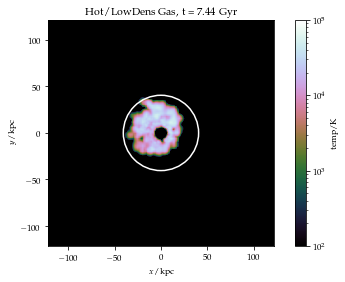

In [190]:
filtered_gas_particles_s1 = h1[haloids[z0haloid][i1]].g[gas_filt]
m_tot = np.sum(filtered_gas_particles_s1.g['mass'].in_units('Msol'))
masses = np.array([float(m_tot)])

t = s1.properties['time'].in_units('Gyr')

print('Centering halo')
pynbody.analysis.angmom.faceon(h1[haloids[z0haloid][i1]])
print('Making plot')


fig, ax = plt.subplots(1,1)
img_width = str(round(rvirs[z0haloid][i1]*6,2)) + ' kpc'
pynbody.plot.sph.image(filtered_gas_particles_s1, width=img_width, subplot=ax, qty='temp', vmin=1e2, vmax=1e5, cmap='cubehelix')#, show_cbar=False)

#img_width = str(round(rvirs[z0haloid][i1]*20,2)) + ' kpc'
#pynbody.plot.sph.image(filtered_gas_particles_s1, width=img_width, subplot=ax[1], vmin=1e-6, vmax=1e6, show_cbar=False)

ax.set_title(f"Hot/LowDens Gas, t = {t:.2f} Gyr")

circle = plt.Circle((0,0),rvirs[z0haloid][i1],color = 'w', linestyle='-', fill=False, linewidth=1.5)
ax.add_artist(circle)
#circle2 = plt.Circle((0,0),rvirs[z0haloid][i1],color = 'w', linestyle='-', fill=False, linewidth=1.5)
#ax[1].add_artist(circle2)

plt.tight_layout()
plt.savefig(f'particle_tracking_plots/h242_{z0haloid}_{snapnums[i1]}.png',dpi=300)
plt.show()

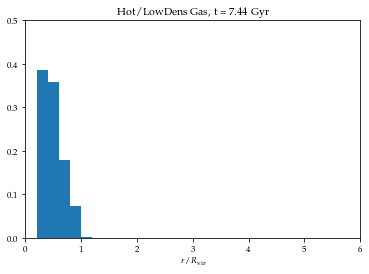

In [191]:
bins = np.arange(0,6,0.2)
rs = filtered_gas_particles_s1.g['r']/rvirs[z0haloid][i1]
plt.hist(rs, bins=bins, weights=np.ones(len(rs)) / len(rs))
plt.xlim(0,6)
plt.ylim(0,0.5)
plt.title(f"Hot/LowDens Gas, t = {t:.2f} Gyr")
plt.xlabel(r'$r / R_{\mathrm{vir}}$')
plt.savefig(f'particle_tracking_histograms/h242_{z0haloid}_{snapnums[i1]}.png',dpi=300)
plt.show()

Snapshot 002304, t = 7.77
	 Creating bridge object...
	 Identifying gas particles w/ bridge...
	 Identified 4510 gas particles, M = 1.17e+08 Msol
	 Centering halo...
	 Making plot...


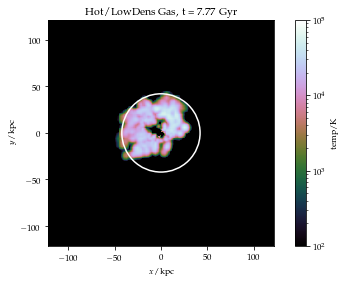

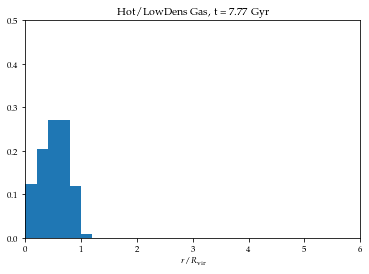

Snapshot 002400, t = 8.09
	 Creating bridge object...
	 Identifying gas particles w/ bridge...
	 Identified 4510 gas particles, M = 1.17e+08 Msol
	 Centering halo...
	 Making plot...


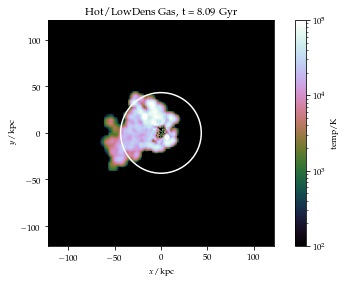

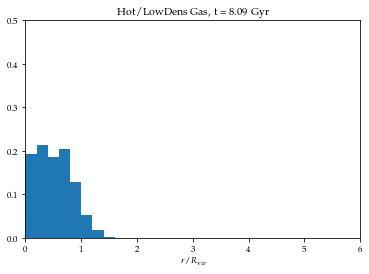

Snapshot 002496, t = 8.41
	 Creating bridge object...
	 Identifying gas particles w/ bridge...
	 Identified 4510 gas particles, M = 1.17e+08 Msol
	 Centering halo...
	 Making plot...


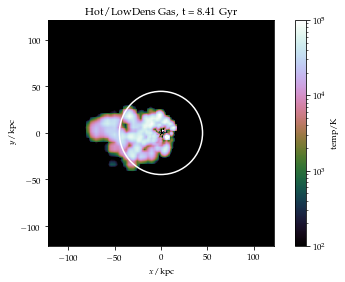

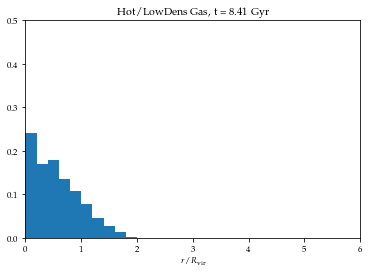

Snapshot 002554, t = 8.61
	 Creating bridge object...
	 Identifying gas particles w/ bridge...
	 Identified 4510 gas particles, M = 1.17e+08 Msol
	 Centering halo...
	 Making plot...


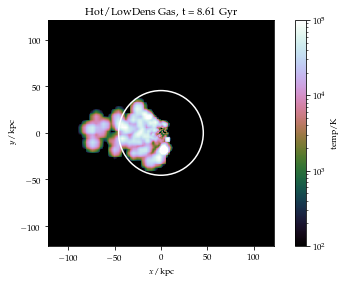

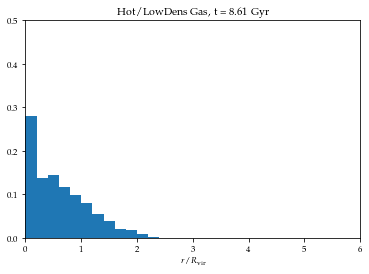

Snapshot 002592, t = 8.74
	 Creating bridge object...
	 Identifying gas particles w/ bridge...
	 Identified 4510 gas particles, M = 1.17e+08 Msol
	 Centering halo...
	 Making plot...


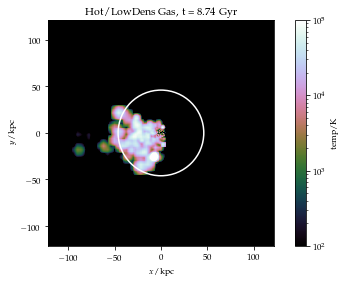

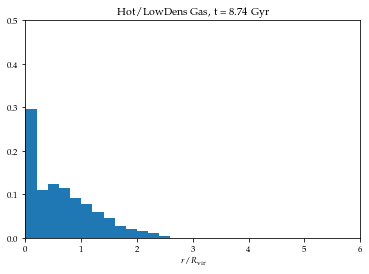

Snapshot 002688, t = 9.06
	 Creating bridge object...
	 Identifying gas particles w/ bridge...
	 Identified 4510 gas particles, M = 1.17e+08 Msol
	 Centering halo...
	 Making plot...


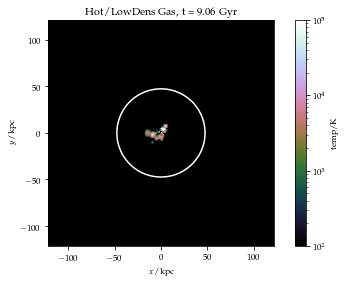

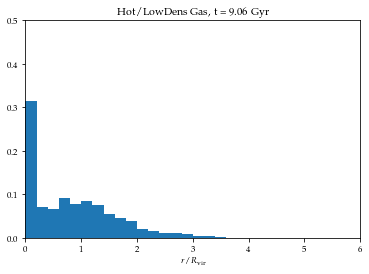

Snapshot 002784, t = 9.38
	 Creating bridge object...
	 Identifying gas particles w/ bridge...
	 Identified 4510 gas particles, M = 1.17e+08 Msol
	 Centering halo...
	 Making plot...


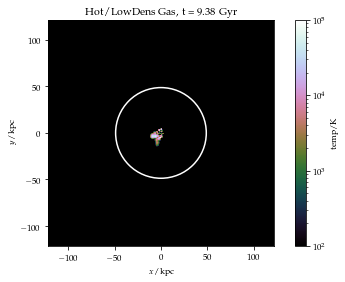

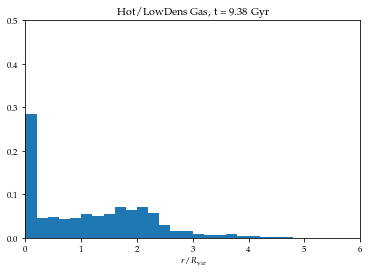

Snapshot 002880, t = 9.71
	 Creating bridge object...
	 Identifying gas particles w/ bridge...
	 Identified 4510 gas particles, M = 1.17e+08 Msol
	 Centering halo...
	 Making plot...


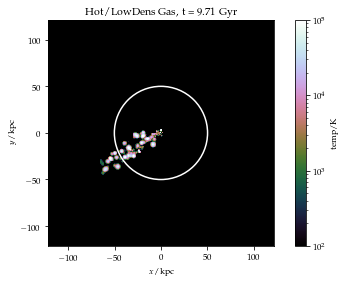

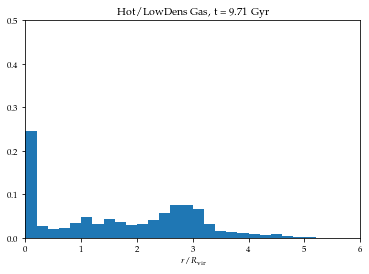

Snapshot 002976, t = 10.03
	 Creating bridge object...
	 Identifying gas particles w/ bridge...
	 Identified 4510 gas particles, M = 1.17e+08 Msol
	 Centering halo...
	 Making plot...


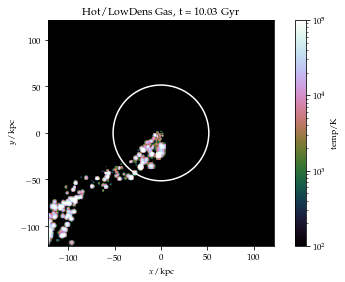

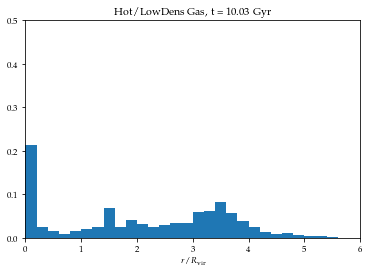

Snapshot 003072, t = 10.35
	 Creating bridge object...
	 Identifying gas particles w/ bridge...
	 Identified 4510 gas particles, M = 1.17e+08 Msol
	 Centering halo...
	 Making plot...


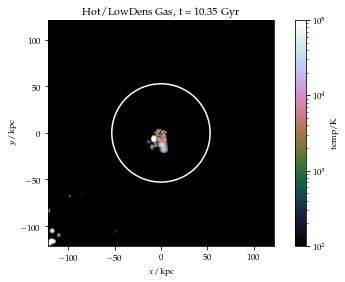

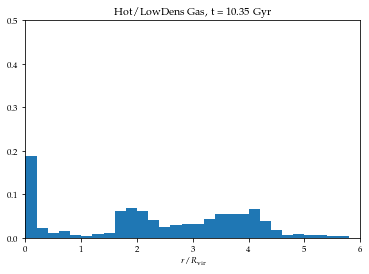

In [192]:
for i in np.flip(np.arange(i1-10,i1,1)):
    f = f_base + snapnums[i]
    s = pynbody.load(f)
    s.physical_units()
    h = s.halos()
    t = s.properties['time'].in_units('Gyr')
    print(f'Snapshot {snapnums[i]}, t = {t:.2f}')
    
    print('\t Creating bridge object...')
    b = pynbody.bridge.OrderBridge(s1,s)
    
    print('\t Identifying gas particles w/ bridge...')
    filtered_gas_particles = b(filtered_gas_particles_s1)

    m_tot = np.sum(filtered_gas_particles.g['mass'].in_units('Msol'))
    masses = np.append(masses, float(m_tot))
    print(f'\t Identified {len(filtered_gas_particles)} gas particles, M = {m_tot:.2e} Msol')

        
    print('\t Centering halo...')
    pynbody.analysis.angmom.faceon(h[haloids[z0haloid][i]])
    
    print('\t Making plot...')
    fig, ax = plt.subplots(1,1)
    
    img_width = str(round(rvirs[z0haloid][i1]*6,2)) + ' kpc' # intentionally left as i1 to keep the size fixed
    pynbody.plot.sph.image(filtered_gas_particles.g, width=img_width, subplot=ax, qty='temp', vmin=1e2, vmax=1e5, cmap='cubehelix')
    
    # img_width = str(round(rvirs[z0haloid][i1]*20,2)) + ' kpc'
    # pynbody.plot.sph.image(filtered_gas_particles.g, width=img_width, subplot=ax[1], vmin=1e-6, vmax=1e6, show_cbar=False)
    
    ax.set_title(f"Hot/LowDens Gas, t = {t:.2f} Gyr")

    circle = plt.Circle((0,0),rvirs[z0haloid][i],color = 'w', linestyle='-', fill=False, linewidth=1.5)
    ax.add_artist(circle)
    #circle2 = plt.Circle((0,0),rvirs[z0haloid][i],color = 'w', linestyle='-', fill=False, linewidth=1.5)
    #ax[1].add_artist(circle2)
    
    plt.tight_layout()
    plt.savefig(f'particle_tracking_plots/h242_{z0haloid}_{snapnums[i]}.png',dpi=300)
    plt.show()
    
    bins = np.arange(0,6,0.2)
    rs = filtered_gas_particles.g['r']/rvirs[z0haloid][i]
    plt.figure()
    plt.hist(rs, bins=bins, weights=np.ones(len(rs)) / len(rs))
    plt.xlim(0,6)
    plt.ylim(0,0.5)
    plt.title(f"Hot/LowDens Gas, t = {t:.2f} Gyr")
    plt.xlabel(r'$r / R_{\mathrm{vir}}$')
    plt.savefig(f'particle_tracking_histograms/h242_{z0haloid}_{snapnums[i]}.png',dpi=300)
    plt.show()

In [193]:
import imageio
from os import listdir

filenames = listdir('particle_tracking_plots/')
filenames.sort()
filenames = np.array(filenames)
filenames = filenames[filenames!='.ipynb_checkpoints']
images = []

for filename in filenames:
    images.append(imageio.imread('particle_tracking_plots/'+filename))
imageio.mimsave('h242_80_movie.gif', images, duration=1)

# Following pre-infall halo gas fractions

In [422]:
age = 13.800797497330507
s = 'h242'
z0haloid = 80
i1 = 20 # starting snapshot index

f_base = f'/home/christenc/Data/Sims/{s}.cosmo50PLK.3072g/{s}.cosmo50PLK.3072gst5HbwK1BH/snapshots_200bkgdens/{s}.cosmo50PLK.3072gst5HbwK1BH.'

f1 = f_base + snapnums[i1]
s1 = pynbody.load(f1)
s1.physical_units()
h1 = s1.halos()
t = s1.properties['time'].in_units('Gyr')
print(f'Snapshot {snapnums[i1]}, t = {t:.2f}')


gas_hot_filt = pynbody.filt.HighPass('temp', 1e4) # select all gas particles with T > 1e4 K
gas_lowdens_filt = pynbody.filt.LowPass('rho',2453000) # select all gas particles with rho < 0.1 amu/cc (converted into Msol/kpc**3)
gas_radial_filt = pynbody.filt.HighPass('r', 0.2*rvirs[z0haloid][i1])
gas_filt = gas_hot_filt & gas_lowdens_filt & gas_radial_filt

pynbody.analysis.halo.center(h1[haloids[z0haloid][i1]])

filtered_gas_particles_s1 = h1[haloids[z0haloid][i1]].g[gas_filt]

Snapshot 002496, t = 8.41


In [431]:
coolontime = filtered_gas_particles_s1.g['coolontime']
difference = coolontime-t
# len(difference[difference>0])/len(difference)
# coolontime.in_units('Gyr')
filtered_gas_particles_s1.g['iord']

SimArray([ 1335600,  2833142,  2833249, ...,  9947769, 10043145, 10056729])

In [423]:
m_tot = np.sum(filtered_gas_particles_s1.g['mass'].in_units('Msol'))
m = filtered_gas_particles_s1.g['mass'].in_units('Msol')
temp = filtered_gas_particles_s1.g['temp'].in_units('K')
rho = filtered_gas_particles_s1.g['rho'].in_units('Msol kpc**-3')
rvir = rvirs[z0haloid][i1]
r = filtered_gas_particles_s1.g['r'].in_units('kpc') / rvir

frac_hot = np.sum(m[(temp > 1e4) & (rho < 2453000) & (r < 1)])/m_tot
frac_disk = np.sum(m[(temp < 1e4) & (rho > 2453000) & (r < 0.2)])/m_tot
frac_stripped = np.sum(m[r > 1])/m_tot

frac_cool_halo = np.sum(m[(temp < 1e4) & (r < 1) & (r > 0.2)])/m_tot
frac_dense_halo = np.sum(m[(rho > 2453000) & (r < 1) & (r > 0.2)])/m_tot
frac_cooldense_halo = np.sum(m[(temp < 1e4) & (rho > 2453000) & (r < 1) & (r > 0.2)])/m_tot

print(f'Hot gas: {frac_hot*100:.2f}%')
print(f'Cool gas in atomic disk: {frac_disk*100:.2f}%')
print(f'Gas stripped away: {frac_stripped*100:.2f}%')
print(f'Total: {(frac_hot+frac_disk+frac_stripped)*100:.2f}%')

Hot gas: 100.00%
Cool gas in atomic disk: 0.00%
Gas stripped away: 0.00%
Total: 100.00%


In [210]:
snapnumbers = [snapnums[i1]]
ts = [t]
fracs_hot = [frac_hot]
fracs_disk = [frac_disk]
fracs_stripped = [frac_stripped]
fracs_cool_halo = [frac_cool_halo]
fracs_dense_halo = [frac_dense_halo]
fracs_cooldense_halo = [frac_cooldense_halo]

In [211]:
for i in np.flip(np.arange(i1-19,i1,1)):
    f = f_base + snapnums[i]
    s = pynbody.load(f)
    s.physical_units()
    h = s.halos()
    t = s.properties['time'].in_units('Gyr')
    print(f'Snapshot {snapnums[i]}, t = {t:.2f}')
    snapnumbers.append(snapnums[i])
    ts.append(t)
    
    print('\t Creating bridge object...')
    b = pynbody.bridge.OrderBridge(s1,s)
    
    print('\t Identifying gas particles w/ bridge...')
    filtered_gas_particles = b(filtered_gas_particles_s1)
    print(f'\t Identified {len(filtered_gas_particles)} gas particles, M = {m_tot:.2e} Msol')
    
    print('\t Centering halo... ')
    pynbody.analysis.halo.center(h[haloids[z0haloid][i]])
    
    m_tot = np.sum(filtered_gas_particles.g['mass'].in_units('Msol'))
    m = filtered_gas_particles.g['mass'].in_units('Msol')
    temp = filtered_gas_particles.g['temp'].in_units('K')
    rho = filtered_gas_particles.g['rho'].in_units('Msol kpc**-3')
    rvir = rvirs[z0haloid][i]
    r = filtered_gas_particles.g['r'].in_units('kpc') / rvir

    frac_hot = np.sum(m[(temp > 1e4) & (rho < 2453000) & (r < 1)])/m_tot
    frac_disk = np.sum(m[(temp < 1e4) & (rho > 2453000) & (r < 0.2)])/m_tot
    frac_stripped = np.sum(m[r > 1])/m_tot
    frac_cool_halo = np.sum(m[(temp < 1e4) & (r < 1) & (r > 0.2)])/m_tot
    frac_dense_halo = np.sum(m[(rho > 2453000) & (r < 1) & (r > 0.2)])/m_tot
    frac_cooldense_halo = np.sum(m[(temp < 1e4) & (rho > 2453000) & (r < 1) & (r > 0.2)])/m_tot
    
    fracs_hot.append(frac_hot)
    fracs_disk.append(frac_disk)
    fracs_stripped.append(frac_stripped)
    fracs_cool_halo.append(frac_cool_halo)
    fracs_dense_halo.append(frac_dense_halo)
    fracs_cooldense_halo.append(frac_cooldense_halo)

Snapshot 002554, t = 8.61
	 Creating bridge object...
	 Identifying gas particles w/ bridge...
	 Identified 2162 gas particles, M = 5.58e+07 Msol
	 Centering halo... 
Snapshot 002592, t = 8.74
	 Creating bridge object...
	 Identifying gas particles w/ bridge...
	 Identified 2162 gas particles, M = 5.58e+07 Msol
	 Centering halo... 
Snapshot 002688, t = 9.06
	 Creating bridge object...
	 Identifying gas particles w/ bridge...
	 Identified 2162 gas particles, M = 5.58e+07 Msol
	 Centering halo... 
Snapshot 002784, t = 9.38
	 Creating bridge object...
	 Identifying gas particles w/ bridge...
	 Identified 2161 gas particles, M = 5.58e+07 Msol
	 Centering halo... 
Snapshot 002880, t = 9.71
	 Creating bridge object...
	 Identifying gas particles w/ bridge...
	 Identified 2161 gas particles, M = 5.57e+07 Msol
	 Centering halo... 
Snapshot 002976, t = 10.03
	 Creating bridge object...
	 Identifying gas particles w/ bridge...
	 Identified 2161 gas particles, M = 5.57e+07 Msol
	 Centering halo..

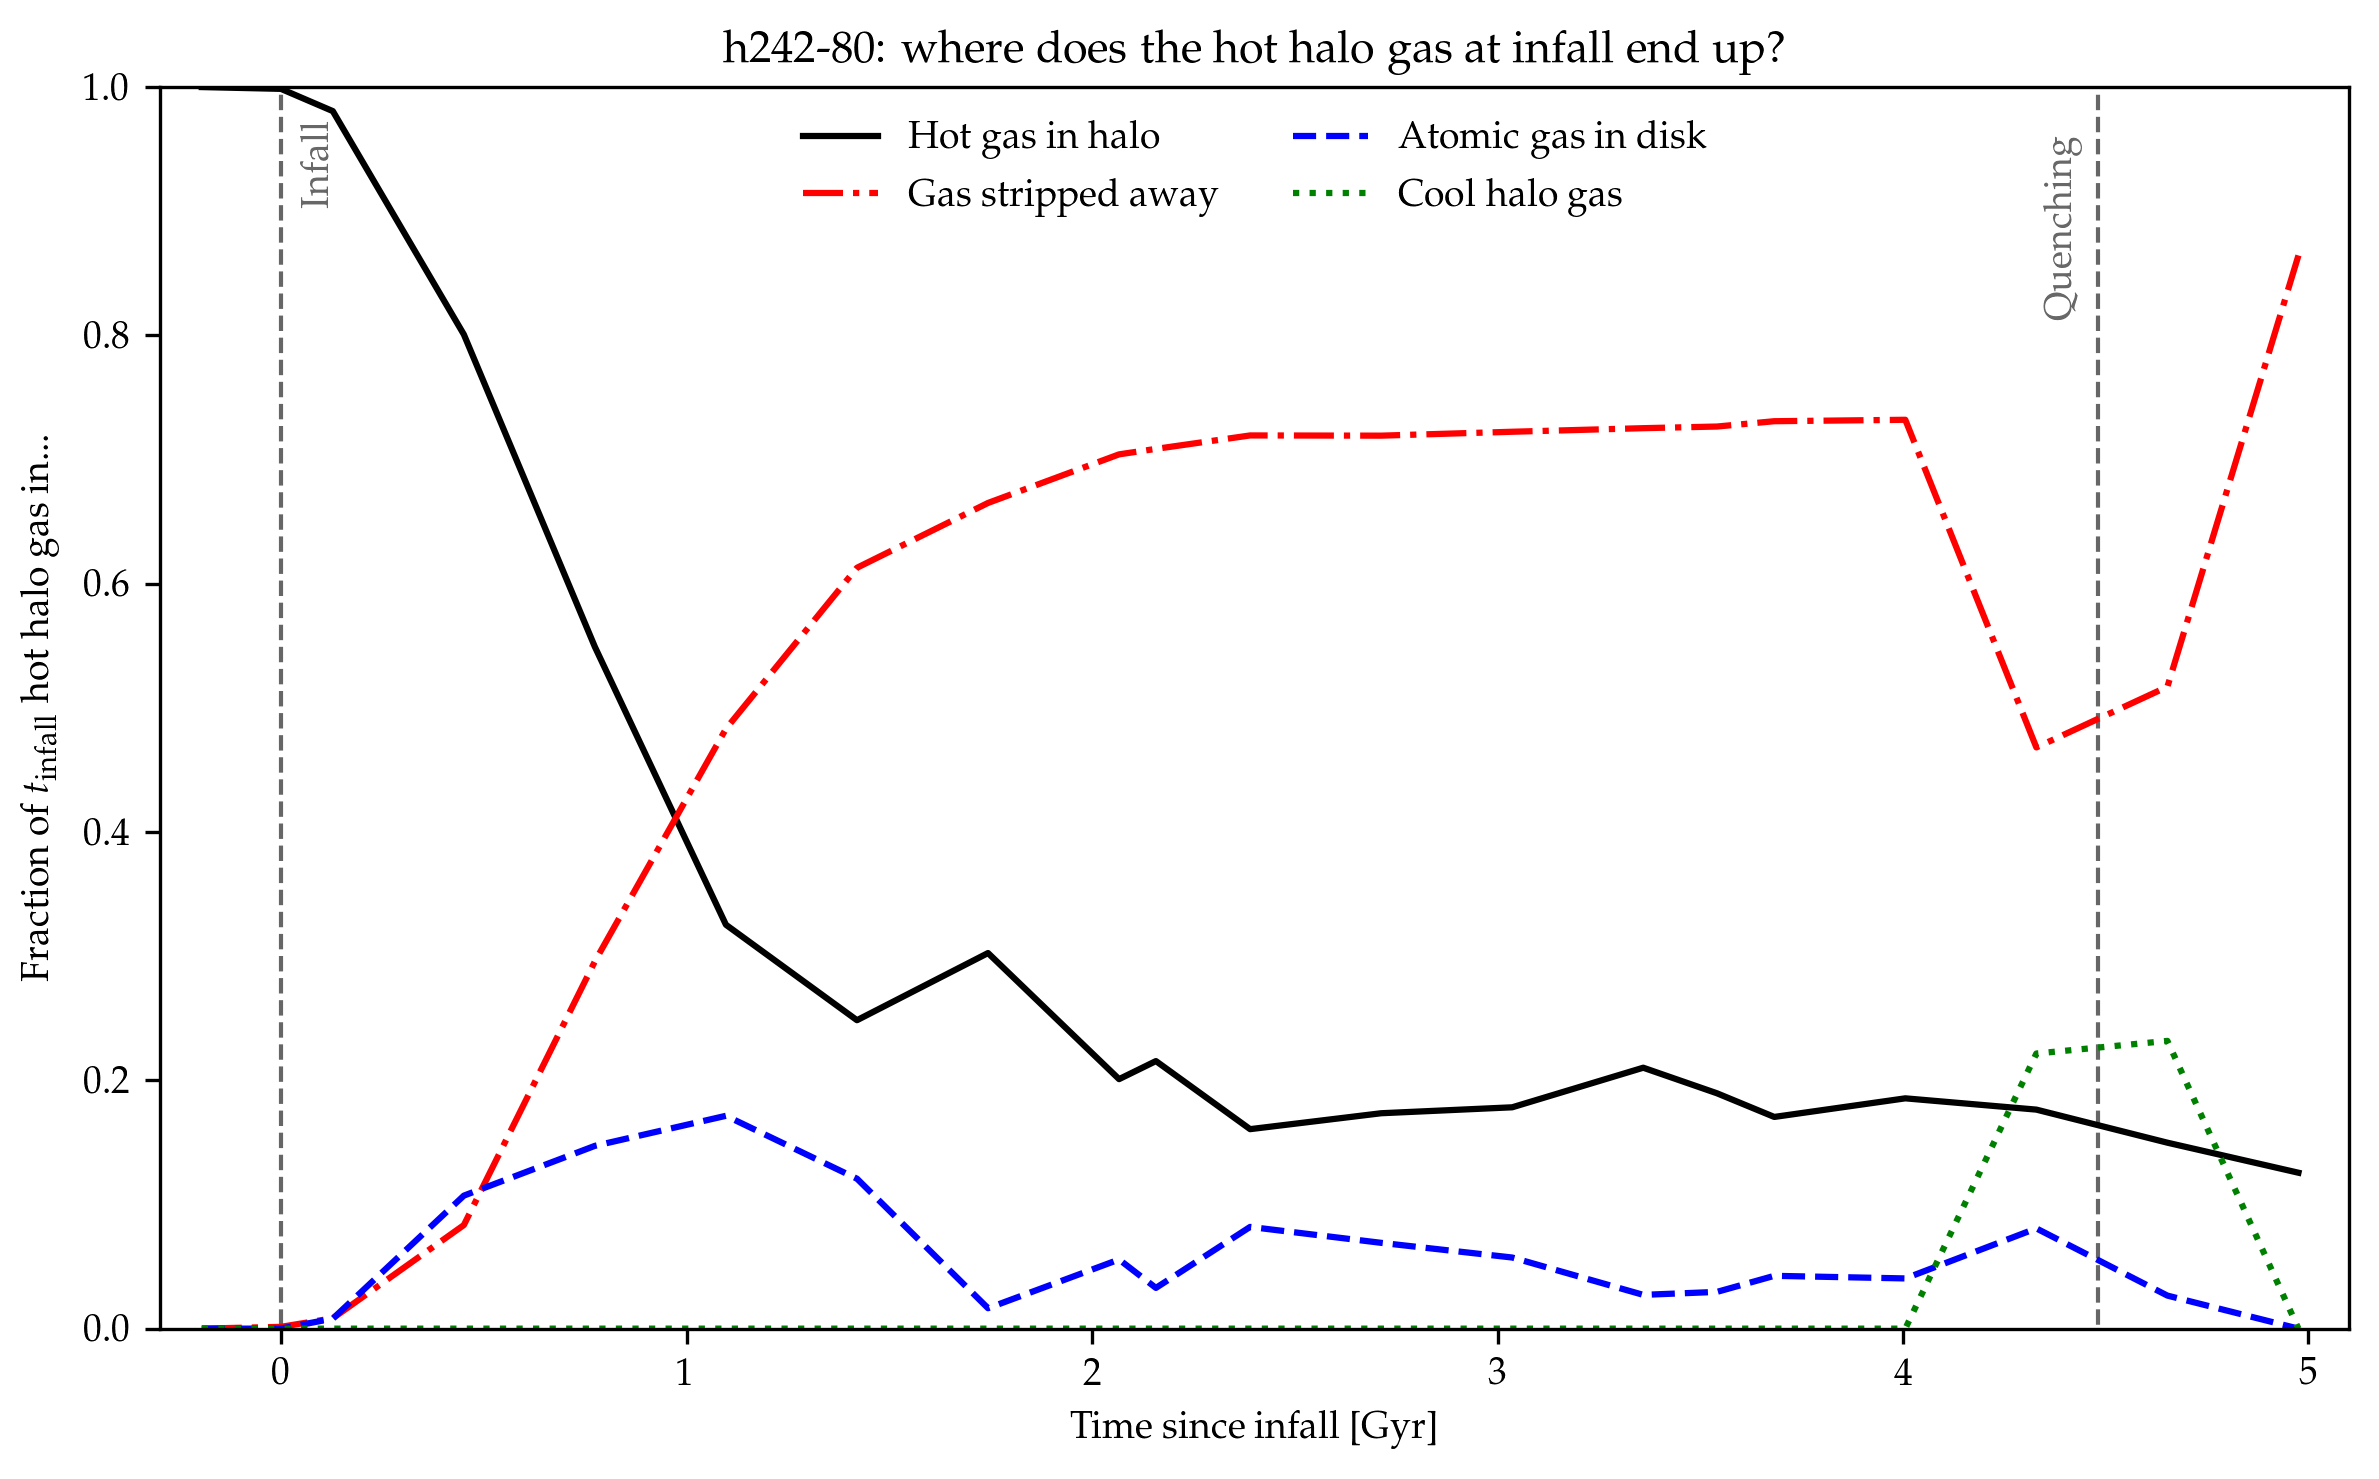

In [216]:
fig, ax = plt.subplots(1,1,dpi=300, figsize=(8,5))

frac_hot = np.array(fracs_hot)
frac_disk = np.array(fracs_disk)
frac_stripped = np.array(fracs_stripped)
frac_cool_halo = np.array(fracs_cool_halo)
frac_dense_halo = np.array(fracs_dense_halo)
frac_cooldense_halo = np.array(fracs_cooldense_halo)

t = np.array(ts) - 8.61

ax.plot(t, frac_hot, 'k-', label='Hot gas in halo')

ax.plot(t, frac_stripped, 'r-.', label='Gas stripped away')

ax.plot(t, frac_disk, 'b--', label='Atomic gas in disk')
ax.plot(t, frac_cool_halo, 'g:', label='Cool halo gas')

ax.set_ylim(0, 1)
ax.set_xlim(-0.3,5.1)
ax.legend(frameon=False,ncol=2)

ax.plot([0,0],[-0.05,1.05], 'k--', alpha=0.6, zorder=0,linewidth=1)
ax.annotate('Infall',(0.05,0.91),alpha=0.6, rotation='vertical')
ax.plot([4.48,4.48],[-0.05,1.05],'k--', alpha=0.6, zorder=0,linewidth=1)
ax.annotate(r'Quenching',(4.35,0.82),alpha=0.6, rotation='vertical')

ax.set_xlabel('Time since infall [Gyr]')
ax.set_ylabel('Fraction of $t_{\mathrm{infall}}$ hot halo gas in...')
ax.set_title('h242-80: where does the hot halo gas at infall end up?')

plt.tight_layout()
# plt.savefig('h242_80_hot_gas_fractions.png',dpi=300)
plt.show()

# Some Debugging

In [123]:
age = 13.800797497330507
s = 'h242'
z0haloid = 80

i1 = 20 # starting snapshot index

f_base = f'/home/christenc/Data/Sims/{s}.cosmo50PLK.3072g/{s}.cosmo50PLK.3072gst5HbwK1BH/snapshots_200bkgdens/{s}.cosmo50PLK.3072gst5HbwK1BH.'

f1 = f_base + snapnums[i1]
s1 = pynbody.load(f1)
s1.physical_units()
h1 = s1.halos()
f2 = f_base + snapnums[i1-1]
s2 = pynbody.load(f2)
s2.physical_units()
h2 = s2.halos()

gas_cool_filt = pynbody.filt.LowPass('temp', 1e4) # select all gas particles with T > 1e4 K
gas_highdens_filt = pynbody.filt.HighPass('rho',2453000) # select all gas particles with rho < 0.1 amu/cc (converted into Msol/kpc**3)
gas_radial_filt = pynbody.filt.LowPass('r', 0.2*rvirs[z0haloid][i1])
gas_filt = gas_cool_filt & gas_highdens_filt & gas_radial_filt

In [124]:
b = pynbody.bridge.OrderBridge(s1, s2)

In [125]:
halo = h1[1]
halo

<SimSnap "/home/christenc/Data/Sims/h242.cosmo50PLK.3072g/h242.cosmo50PLK.3072gst5HbwK1BH/snapshots_200bkgdens/h242.cosmo50PLK.3072gst5HbwK1BH.002496:halo_1" len=36665612>

In [127]:
len(halo.s), len(halo.g)

(14625496, 3439465)

In [128]:
halo2 = b(halo)
halo2

<SimSnap "/home/christenc/Data/Sims/h242.cosmo50PLK.3072g/h242.cosmo50PLK.3072gst5HbwK1BH/snapshots_200bkgdens/h242.cosmo50PLK.3072gst5HbwK1BH.002554:indexed" len=36617445>

In [129]:
len(halo2.s), len(halo2.g)

(14625496, 3391298)

In [133]:
pynbody.analysis.halo.center(halo)

In [134]:
filt = pynbody.filt.LowPass('r', 10)
halo_filt = halo[filt]
halo_filt

<SimSnap "/home/christenc/Data/Sims/h242.cosmo50PLK.3072g/h242.cosmo50PLK.3072gst5HbwK1BH/snapshots_200bkgdens/h242.cosmo50PLK.3072gst5HbwK1BH.002496:halo_1:lowpass_r" len=12942461>

In [135]:
len(halo_filt.s), len(halo_filt.g)

(11030065, 378552)

In [136]:
filt1 = pynbody.filt.LowPass('r', 10)
filt2 = pynbody.filt.LowPass('r', 5)
filt = filt1 & filt2
halo_filt = halo[filt]
halo_filt

<SimSnap "/home/christenc/Data/Sims/h242.cosmo50PLK.3072g/h242.cosmo50PLK.3072gst5HbwK1BH/snapshots_200bkgdens/h242.cosmo50PLK.3072gst5HbwK1BH.002496:halo_1:lowpass_r&lowpass_r" len=10360025>

In [137]:
len(halo_filt.s), len(halo_filt.g)

(9512969, 133770)

In [158]:
b = pynbody.bridge.OrderBridge(s1, s2)#, allow_family_change=True, monotonic=False)

In [155]:
halo_filt2 = b(halo_filt)

In [156]:
len(halo_filt2.s), len(halo_filt2.g)

(9512969, 118494)

In [152]:
?b

Signature:      b(s)
Type:           OrderBridge
String form:    <pynbody.bridge.OrderBridge object at 0x7f6b5b304438>
File:           ~/anaconda3/envs/py37/lib/python3.7/site-packages/pynbody/bridge/__init__.py
Docstring:     
An OrderBridge uses integer arrays in two simulations
(start,end) where particles i_start and i_end are
defined to be the same if and only if
start[order_array][i_start] == start[order_array][i_end].

If monotonic is True, order_array must be monotonically increasing
in both ends of the bridge (and this is not checked for you). If
monotonic is False, the bridging is slower but this is the
failsafe option.
Call docstring:
Given a subview of either the start or end point of the bridge,
generate the corresponding subview of the connected snapshot


# Following pre-infall COLD gas fractions

In [178]:
age = 13.800797497330507
s = 'h242'
z0haloid = 80

i1 = 20 # starting snapshot index

f_base = f'/home/christenc/Data/Sims/{s}.cosmo50PLK.3072g/{s}.cosmo50PLK.3072gst5HbwK1BH/snapshots_200bkgdens/{s}.cosmo50PLK.3072gst5HbwK1BH.'

f1 = f_base + snapnums[i1]
s1 = pynbody.load(f1)
s1.physical_units()
h1 = s1.halos()
t = s1.properties['time'].in_units('Gyr')
print(f'Snapshot {snapnums[i1]}, t = {t:.2f}')


gas_cool_filt = pynbody.filt.LowPass('temp', 1e4) # select all gas particles with T > 1e4 K
gas_highdens_filt = pynbody.filt.HighPass('rho',2453000) # select all gas particles with rho < 0.1 amu/cc (converted into Msol/kpc**3)
gas_radial_filt = pynbody.filt.LowPass('r', 0.2*rvirs[z0haloid][i1])
gas_filt = gas_cool_filt & gas_highdens_filt & gas_radial_filt

pynbody.analysis.halo.center(h1[haloids[z0haloid][i1]])

filtered_gas_particles_s1 = h1[haloids[z0haloid][i1]].g[gas_filt]

Snapshot 002496, t = 8.41


In [179]:
m_tot = np.sum(filtered_gas_particles_s1['mass'].in_units('Msol'))
m = filtered_gas_particles_s1['mass'].in_units('Msol')

temp = filtered_gas_particles_s1.g['temp'].in_units('K')
rho = filtered_gas_particles_s1.g['rho'].in_units('Msol kpc**-3')
rvir = rvirs[z0haloid][i1]
r = filtered_gas_particles_s1.g['r'].in_units('kpc') / rvir

frac_hot = np.sum(m[(temp > 1e4) & (rho < 2453000) & (r < 1)])/m_tot
frac_disk = np.sum(m[(temp < 1e4) & (rho > 2453000) & (r < 0.2)])/m_tot
frac_stripped = np.sum(m[r > 1])/m_tot

m_tot_init = m_tot
frac_stars = 1 - (m_tot / m_tot_init)


print(f'Hot gas: {frac_hot*100:.2f}%')
print(f'Cool disk gas: {frac_disk*100:.2f}%')
print(f'Gas stripped away: {frac_stripped*100:.2f}%')
print(f'Formed stars: {frac_stars*100:.2f}%')
print(f'Total: {(frac_hot+frac_disk+frac_stripped+frac_stars)*100:.2f}%')

Hot gas: 0.00%
Cool disk gas: 100.00%
Gas stripped away: 0.00%
Formed stars: 0.00%
Total: 100.00%


In [180]:
snapnumbers = [snapnums[i1]]
ts = [t]
fracs_hot = [frac_hot]
fracs_disk = [frac_disk]
fracs_stripped = [frac_stripped]
fracs_stars = [frac_stars]

In [181]:
for i in np.flip(np.arange(i1-19,i1,1)):
    f = f_base + snapnums[i]
    s = pynbody.load(f)
    s.physical_units()
    h = s.halos()
    t = s.properties['time'].in_units('Gyr')
    print(f'Snapshot {snapnums[i]}, t = {t:.2f}')
    snapnumbers.append(snapnums[i])
    ts.append(t)
    
    print('\t Creating bridge object...')
    b = pynbody.bridge.OrderBridge(s1,s)
    
    print('\t Identifying gas particles w/ bridge...')
    filtered_gas_particles = b(filtered_gas_particles_s1)
    print(f'\t Identified {len(filtered_gas_particles)} gas/star particles, M = {m_tot:.2e} Msol')
    
    print('\t Centering halo... ')
    pynbody.analysis.halo.center(h[haloids[z0haloid][i]])
    
    m_tot = np.sum(filtered_gas_particles['mass'].in_units('Msol'))
    m = filtered_gas_particles['mass'].in_units('Msol')

    temp = filtered_gas_particles.g['temp'].in_units('K')
    rho = filtered_gas_particles.g['rho'].in_units('Msol kpc**-3')
    rvir = rvirs[z0haloid][i]
    r = filtered_gas_particles.g['r'].in_units('kpc') / rvir

    frac_hot = np.sum(m[(temp > 1e4) & (rho < 2453000) & (r < 1)])/m_tot
    frac_disk = np.sum(m[(temp < 1e4) & (rho > 2453000) & (r < 0.2)])/m_tot
    frac_stripped = np.sum(m[r > 1])/m_tot
    frac_stars = 1 - (m_tot / m_tot_init)
    
    print(f'Hot: {frac_hot:.2f}, Disk: {frac_disk:.2f}, Stripped: {frac_stripped:.2f}, Stars: {frac_stars:.2f}')
    
    fracs_hot.append(frac_hot)
    fracs_disk.append(frac_disk)
    fracs_stars.append(frac_stars)
    fracs_stripped.append(frac_stripped)

Snapshot 002554, t = 8.61
	 Creating bridge object...
	 Identifying gas particles w/ bridge...
	 Identified 1738 gas/star particles, M = 4.51e+07 Msol
	 Centering halo... 
Hot: 0.45, Disk: 0.51, Stripped: 0.00, Stars: 0.00
Snapshot 002592, t = 8.74
	 Creating bridge object...
	 Identifying gas particles w/ bridge...
	 Identified 1738 gas/star particles, M = 4.51e+07 Msol
	 Centering halo... 
Hot: 0.44, Disk: 0.52, Stripped: 0.00, Stars: 0.00
Snapshot 002688, t = 9.06
	 Creating bridge object...
	 Identifying gas particles w/ bridge...
	 Identified 1738 gas/star particles, M = 4.50e+07 Msol
	 Centering halo... 
Hot: 0.54, Disk: 0.43, Stripped: 0.00, Stars: 0.01
Snapshot 002784, t = 9.38
	 Creating bridge object...
	 Identifying gas particles w/ bridge...
	 Identified 1737 gas/star particles, M = 4.48e+07 Msol
	 Centering halo... 
Hot: 0.57, Disk: 0.38, Stripped: 0.02, Stars: 0.01
Snapshot 002880, t = 9.71
	 Creating bridge object...
	 Identifying gas particles w/ bridge...
	 Identified 

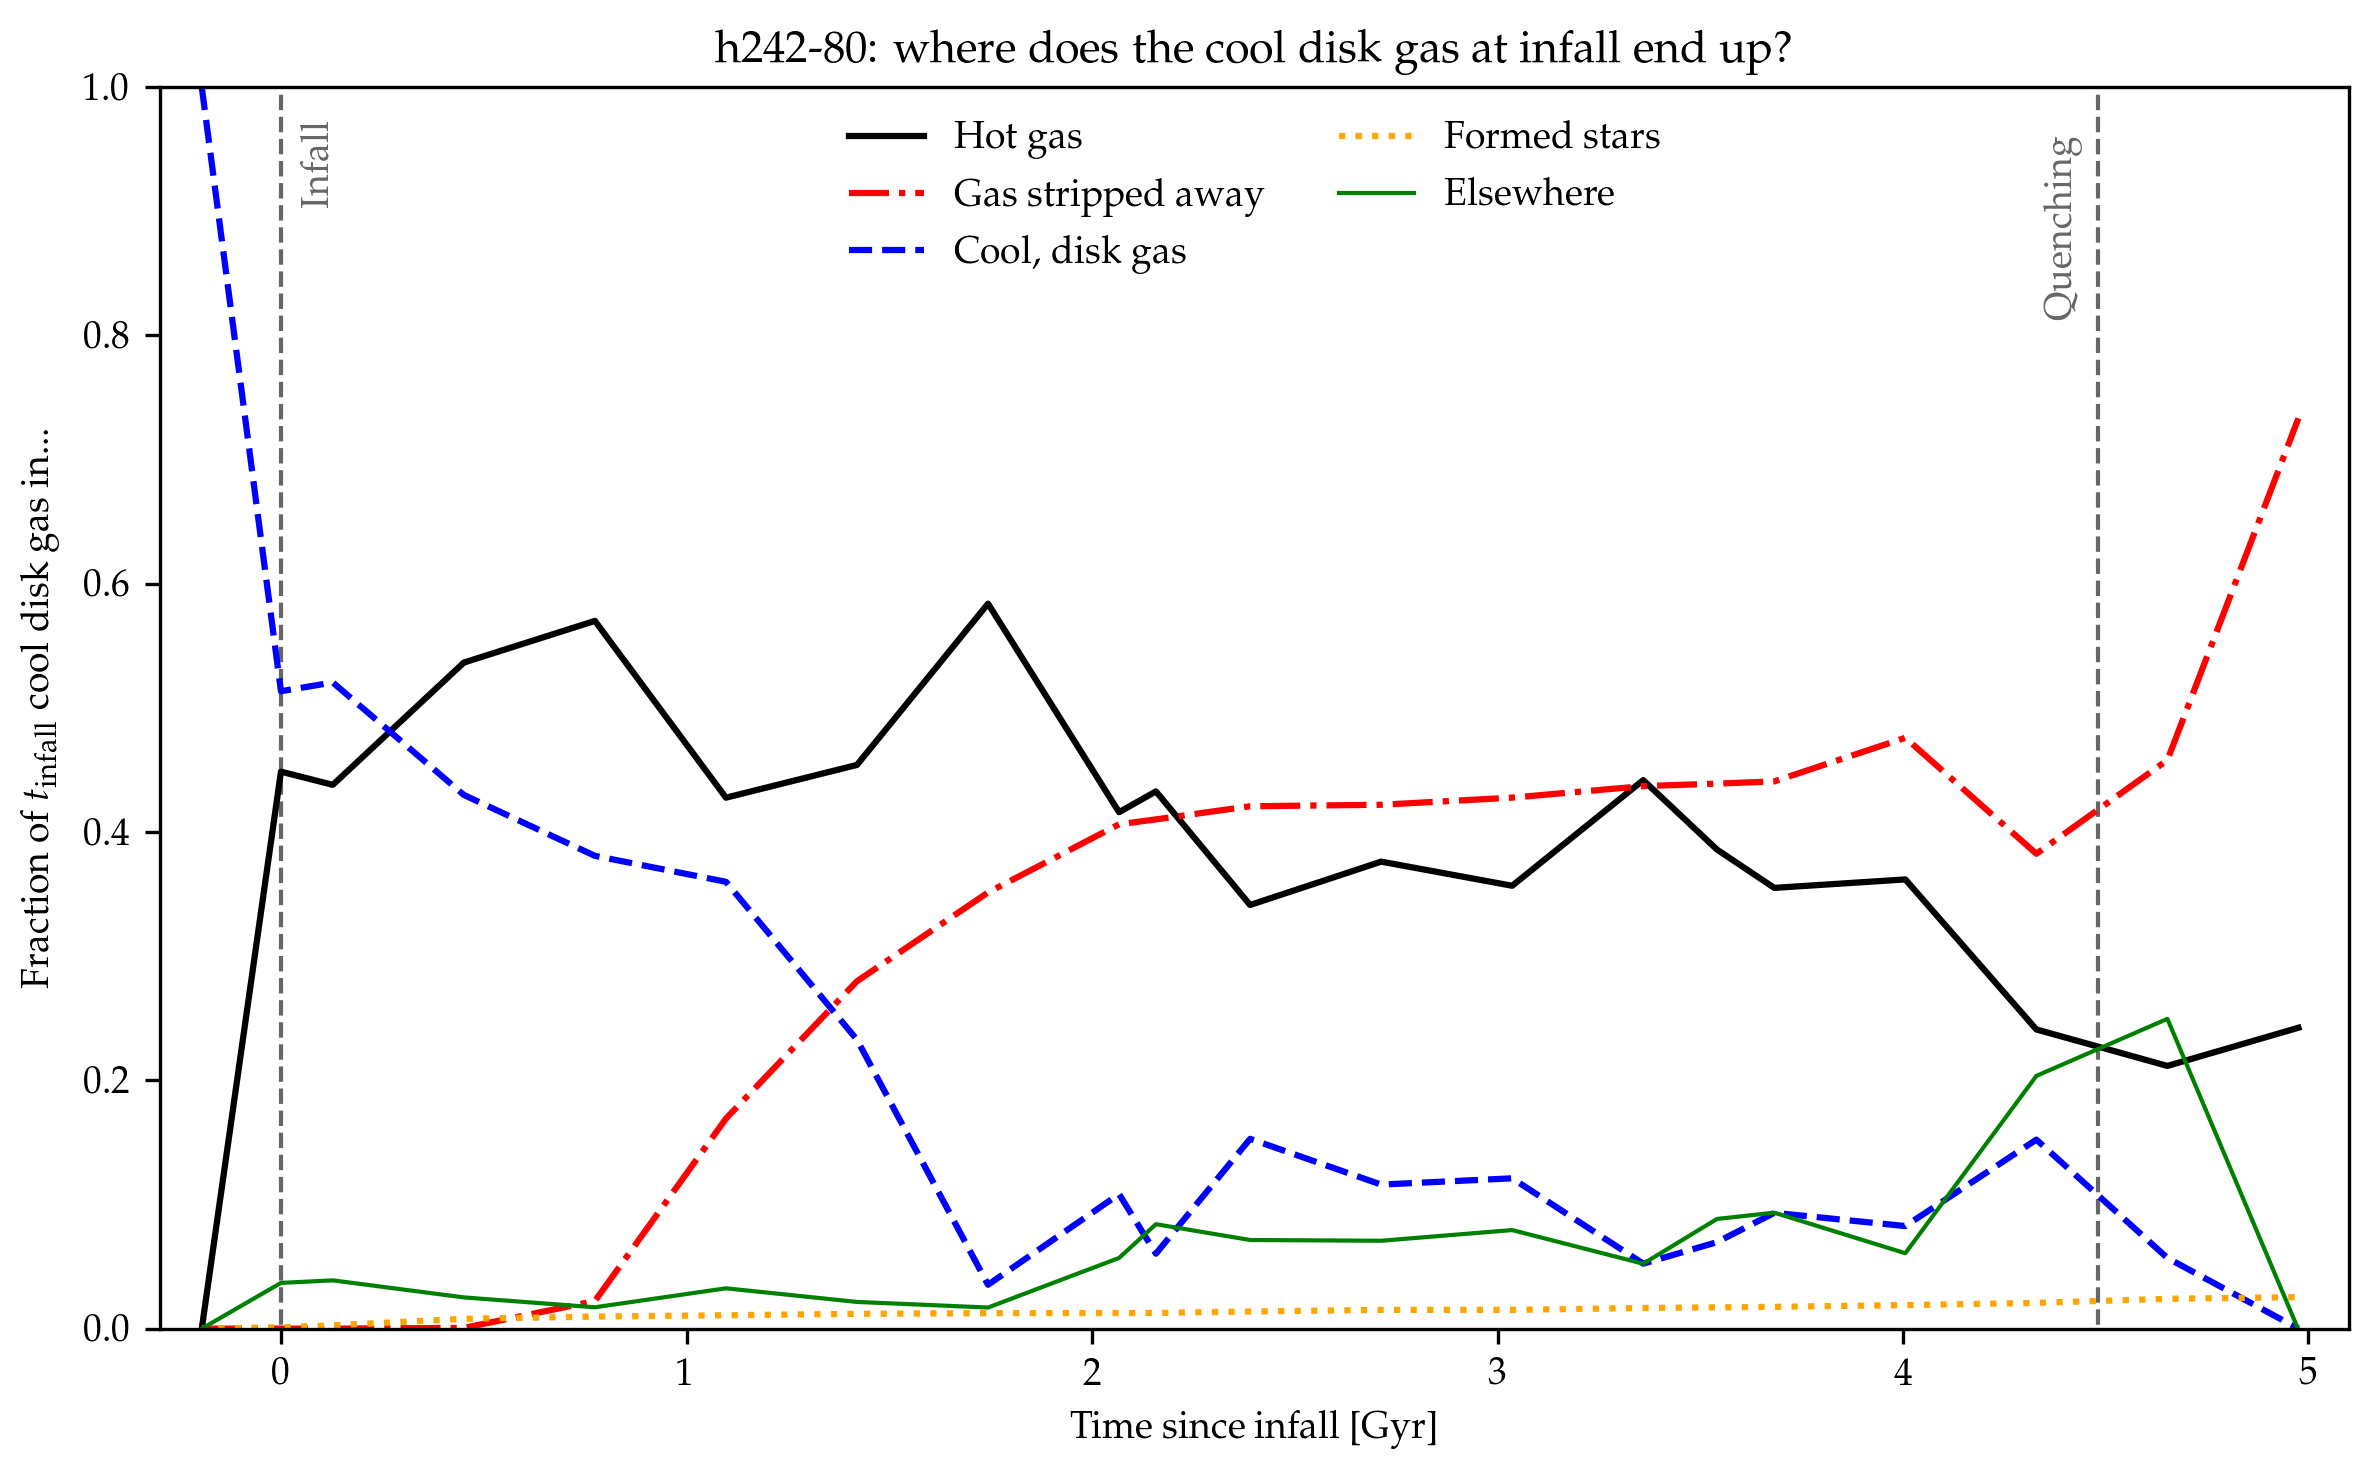

In [182]:
fig, ax = plt.subplots(1,1,dpi=300, figsize=(8,5))

frac_hot = np.array(fracs_hot)
frac_disk = np.array(fracs_disk)
frac_stars = np.array(fracs_stars)
frac_stripped = np.array(fracs_stripped)
t = np.array(ts) - 8.61

ax.plot(t, frac_hot, 'k-', label='Hot gas')

ax.plot(t, frac_stripped, 'r-.', label='Gas stripped away')

ax.plot(t, frac_disk, 'b--', label='Cool, disk gas')
ax.plot(t, frac_stars, ':', color='orange', label='Formed stars')

ax.plot(t, 1-frac_hot-frac_stripped-frac_disk-frac_stars, 'g-', label='Elsewhere', linewidth=1)

ax.set_ylim(0, 1)
ax.set_xlim(-0.3,5.1)
ax.legend(frameon=False,ncol=2)

ax.plot([0,0],[-0.05,1.05], 'k--', alpha=0.6, zorder=0,linewidth=1)
ax.annotate('Infall',(0.05,0.91),alpha=0.6, rotation='vertical')
ax.plot([4.48,4.48],[-0.05,1.05],'k--', alpha=0.6, zorder=0,linewidth=1)
ax.annotate(r'Quenching',(4.35,0.82),alpha=0.6, rotation='vertical')

ax.set_xlabel('Time since infall [Gyr]')
ax.set_ylabel('Fraction of $t_{\mathrm{infall}}$ cool disk gas in...')
ax.set_title('h242-80: where does the cool disk gas at infall end up?')

plt.tight_layout()
plt.savefig('h242_80_cold_gas_fractions.png',dpi=300)
plt.show()

# Scaling this Up

In [183]:
data = read_timescales()
data = data[(data.quenched==True)]
data['timescale'] = data.tinfall - data.tquench
data = data[(data.timescale > 3)]
data

M_star  haloid  n_star quenched   sim   tinfall  tinfall_lower  \
12  8.417204e+07      28   16982     True  h148  7.326666       7.326666   
16  5.759679e+06      37    1159     True  h148  4.740784       4.740784   
24  2.822993e+06      68     568     True  h148  5.602745       5.602745   
63  2.352154e+07      80    4760     True  h242  5.191967       5.191967   
72  3.338275e+06      20     672     True  h229  5.387255       5.710490   
73  7.714878e+07      22   15673     True  h229  9.589313       9.589313   

    tinfall_upper   tquench  tquench_lower  tquench_upper  timescale  
12       7.326666  0.711615       1.742898       0.092845   6.615052  
16       4.740784  0.250474       0.250474       0.250474   4.490310  
24       5.191967  1.089320       1.089320       1.089320   4.513425  
63       5.064019  0.705483       0.900994       0.705483   4.486484  
72       5.191967  0.340459       0.340459       0.340459   5.046795  
73       6.033725  5.183798       5.183798       2.549277   4.405516

### WILL NEED TO LIST THESE FOR EACH SIM

In [184]:
snapnums = ['004096', '004032', '003936', '003840', '003744', '003648', '003606', '003552', '003456', '003360', '003264', '003195', '003168', '003072','002976', '002880', '002784', '002688', '002592', '002554', '002496', '002400', '002304','002208', '002112', '002088', '002016', '001920', '001824','001740','001728','001632', '001536', '001475', '001440', '001344', '001269', '001248','001152', '001106', '001056', '000974', '000960','000864', '000776', '000768', '000672', '000637', '000576', '000480', '000456', '000384', '000347', '000288', '000275', '000225', '000192', '000188', '000139', '000107', '000096', '000071']

haloids = {
    1: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 4, 4, 4, 2],
    10: [10, 10, 9, 7, 7, 8, 7, 7, 7, 4, 5, 5, 5, 6, 6, 4, 3, 3, 3, 3, 3, 4, 5, 5, 6, 6, 4, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 6, 9, 9, 9, 10, 10, 9, 13, 14, 16, 18, 18, 18, 20],
    12: [12, 12, 12, 9, 10, 11, 10, 10, 10, 9, 10, 6, 6, 5, 4, 3, 4, 4, 4, 4, 4, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 4, 4, 4, 4, 4, 5, 6, 6, 7, 8, 8, 8, 8, 10, 11, 10, 7, 6, 11, 11, 7, 11, 11, 9, 5, 6, 9],
    24: [24, 24, 25, 26, 25, 25, 25, 24, 24, 23, 24, 25, 24, 22, 22, 22, 21, 20, 19, 19, 19, 19, 19, 20, 19, 19, 17, 20, 21, 21, 20, 21, 17, 16, 17, 15, 15, 16, 15, 18, 17, 17, 17, 20, 21, 21, 20, 21, 24, 26, 28, 25, 24, 27, 29, 23, 20, 19, 14, 12, 16, 17],
    30: [30, 29, 29, 31, 29, 28, 29, 29, 30, 32, 30, 29, 28, 26, 25, 24, 22, 22, 20, 20, 20, 21, 21, 22, 21, 21, 18, 19, 18, 17, 16, 17, 15, 13, 14, 12, 13, 14, 13, 13, 13, 14, 14, 13, 15, 15, 14, 15, 16, 16, 17, 18, 16, 14, 12, 8, 9, 9, 8, 6, 5, 4],
    34: [34, 33, 34, 36, 35, 35, 34, 34, 35, 36, 33, 33, 33, 33, 33, 33, 33, 32, 32, 32, 32, 31, 31, 30, 30, 31, 28],
    40: [40, 40, 41, 44, 41, 41, 42, 41, 42, 42, 40, 39, 40, 39, 38, 38, 38, 38, 38, 38, 39, 38, 37, 38, 38, 38, 37, 36, 37, 35, 34, 34, 34, 32, 33, 34, 32, 34, 35, 38, 40, 38, 38, 42, 38, 38, 39, 40, 45, 50, 49, 49, 52, 57, 55, 50, 40, 41, 31, 25, 26],
    41: [41, 41, 42, 43, 44, 29, 26, 23, 20, 19, 19, 19, 19, 18, 18, 18, 19, 18, 18, 18, 18, 20, 20, 21, 22, 22, 21, 23, 28, 28, 28, 27, 29, 27, 28, 29, 27, 29, 32, 34, 35, 29, 29, 28, 26, 26, 34, 43, 121, 121, 115, 101, 103, 87, 82, 77, 122, 156, 122],
    44: [44, 44, 45, 48, 46, 45, 47, 46, 48, 50, 48, 50, 53, 51, 51, 52, 50, 52, 52, 53, 51, 51, 49, 50, 49, 50, 49, 50, 51, 48, 48, 45, 43, 39, 41, 41, 37, 39, 41, 46, 46, 46, 44, 46, 39, 39, 41, 41, 47, 53, 50, 46, 47, 50, 52, 53, 41, 40, 34, 30, 28, 25],
    48: [48, 50, 48, 51, 51, 50, 52, 51, 54, 54, 52, 53, 57, 55, 53, 53, 53, 54, 54, 54, 54, 53, 51, 49, 48, 48, 47, 51, 55, 54, 53, 57, 57, 57, 59, 60, 58, 61, 68, 68, 67, 67, 66, 69, 66, 66, 56, 57, 66, 67, 65, 59, 64, 71, 75, 85, 95, 94, 86, 77],
    49: [49, 49, 47, 50, 50, 49, 50, 50, 53, 55, 53, 55, 69, 56, 55, 55, 56, 55, 55, 57, 56, 58, 54, 57, 57, 57, 57, 60, 64, 65, 65, 69, 72, 73, 75, 79, 78, 83, 86, 86, 85, 81, 81, 83, 79, 79, 85, 94, 97, 100, 100, 103, 95, 92, 87, 91, 83, 84, 150],
    71: [71, 70, 72, 75, 75, 75, 75, 73, 72, 75, 71, 72, 72, 68, 66, 66, 67, 66, 66, 58, 57, 55, 53, 53, 50, 49, 48, 49, 53, 52, 51, 48, 48, 47, 50, 48, 42, 44, 46, 49, 48, 51, 53, 56, 50, 50, 48, 48, 56, 64, 62, 63, 65, 63, 58, 58, 55, 56, 47, 65],
    78: [78, 76, 76, 78, 76, 71, 70, 68, 64, 65, 63, 66, 65, 64, 62, 61, 62, 62, 60, 61, 59, 59, 60, 59, 59, 58, 56, 57, 60, 63, 62, 64, 62, 61, 62, 62, 60, 62, 67, 69, 68, 63, 63, 60, 45, 44, 47, 47, 54, 57, 51, 52, 62, 82, 77],
    80: [80, 268, 64, 39, 33, 31, 31, 30, 29, 29, 27, 26, 25, 25, 24, 19, 15, 14, 14, 14, 14, 14, 14, 14, 14, 14, 12, 14, 15, 14, 14, 13, 12, 12, 11, 11, 12, 13, 12, 14, 15, 15, 15, 15, 17, 17, 16, 17, 18, 21, 22, 29, 55, 53, 50, 47, 48, 48, 100],
    86: [86, 82, 83, 84, 82, 79, 80, 80, 76, 67, 51, 48, 47, 46, 47, 46, 46, 47, 45, 46, 45, 43, 42, 40, 39, 39, 38, 37, 39, 36, 35, 35, 35, 33, 34, 38, 35, 37, 36, 39, 42, 37, 35, 40, 41, 41, 51, 54, 58, 58, 56, 55, 57, 74, 73, 76, 88, 87, 112],
    165: [165, 153, 146, 140, 132, 125, 126, 129, 128, 134, 132, 131, 134, 128, 129, 127, 128, 127, 132, 132, 135, 136, 132, 125, 122, 116, 111, 113, 194, 133, 121, 87, 87, 92, 94, 97, 99, 102, 111, 108, 107, 102, 101, 102, 98, 101, 101, 105, 103, 95, 91, 90, 90, 91, 86, 68, 65, 64, 62],
    223: [223, 214, 228, 69, 52, 48, 48, 47, 49, 52, 50, 51, 54, 52, 52, 51, 51, 53, 53, 52, 50, 50, 48, 48, 51, 51, 50, 52, 54, 53, 52, 49, 50, 49, 52, 52, 47, 50, 49, 50, 50, 49, 49, 51, 44, 45, 49, 50, 55, 56, 54, 95, 134, 140, 135, 134, 157, 184, 146],
    439: [439, 441, 439, 442, 439, 432, 431, 430, 416, 401, 379, 367, 366, 341, 318, 283, 223, 176, 174, 170, 174, 173, 176, 178, 174, 173, 174, 176, 176, 176, 175, 168, 158, 141, 136, 122, 89, 78, 65, 63, 60, 53, 52, 43, 31, 31, 22, 22, 23, 27, 27, 26, 26, 30, 30, 31, 34, 36, 74],
    480: [480, 481, 466, 463, 462, 461, 459, 456, 460, 470, 467, 469, 472, 468, 472, 471, 460, 450, 437, 432, 425, 419, 415, 408, 409, 405, 408, 405, 405, 413, 411, 410, 404, 399, 393, 393, 368, 368, 356, 351, 342, 321, 320, 294, 224, 215, 118, 104, 89, 62, 57, 51, 54, 55, 54, 52, 49, 47, 37, 38, 42]
}

rvirs = {
    10: [105.92, 104.34, 102.0, 99.69, 97.4, 95.14, 94.15, 92.89, 90.67, 88.47, 86.29, 84.74, 84.13, 81.98, 79.85, 77.73, 75.62, 73.53, 71.44, 70.61, 69.36, 67.28, 65.21, 63.13, 61.06, 60.54, 58.98, 56.9, 54.81, 52.97, 52.7, 50.58, 48.45, 47.08, 46.3, 44.06, 42.13, 41.56, 38.83, 37.4, 35.91, 33.52, 33.11, 30.53, 28.43, 28.19, 24.91, 23.19, 18.23, 14.15, 13.46, 11.47, 10.1, 7.62, 7.25, 5.41, 4.35, 4.19, 2.65, 1.89, 1.58, 0.81],
    12: [88.48, 87.16, 85.21, 83.27, 81.36, 79.47, 78.65, 77.6, 75.74, 73.9, 72.08, 70.78, 70.28, 68.48, 66.7, 64.93, 63.17, 61.42, 59.67, 59.05, 58.15, 56.77, 55.59, 62.19, 60.15, 59.64, 58.1, 56.05, 53.99, 52.18, 51.92, 49.83, 39.06, 33.66, 34.57, 45.55, 43.99, 43.13, 39.62, 37.89, 34.53, 27.88, 27.33, 24.31, 22.18, 21.98, 19.33, 18.4, 16.21, 13.71, 13.23, 11.97, 10.82, 7.5, 7.12, 5.56, 4.48, 4.35, 3.2, 2.49, 2.13, 1.21],
    24: [49.2, 48.46, 47.38, 46.3, 45.24, 44.19, 43.73, 43.15, 42.12, 41.09, 40.08, 39.36, 39.08, 38.08, 37.09, 36.1, 35.13, 34.15, 33.18, 32.8, 32.21, 31.25, 30.29, 29.32, 31.43, 31.8, 31.02, 29.89, 28.68, 27.66, 27.51, 26.4, 25.37, 24.78, 24.41, 23.28, 22.28, 21.98, 20.39, 19.15, 18.25, 16.54, 16.31, 14.66, 13.4, 13.28, 11.77, 11.19, 10.19, 8.71, 8.33, 7.1, 6.53, 5.51, 5.26, 4.38, 3.82, 3.74, 2.88, 2.05, 1.73, 0.97],
    30: [61.77, 60.85, 59.48, 58.14, 56.8, 55.48, 54.91, 54.17, 52.88, 51.6, 50.32, 49.42, 49.06, 47.81, 46.57, 45.33, 44.1, 42.88, 41.66, 41.18, 40.45, 39.24, 38.03, 36.82, 35.61, 35.31, 34.4, 33.18, 31.96, 30.89, 30.73, 29.5, 28.25, 27.45, 26.99, 25.93, 24.91, 24.62, 23.21, 22.59, 21.74, 20.29, 20.07, 18.42, 17.02, 16.9, 15.66, 15.13, 13.66, 11.27, 10.86, 9.41, 8.44, 7.11, 6.78, 5.54, 4.71, 4.59, 3.26, 2.42, 2.21, 1.54],
    34: [44.33, 43.67, 42.69, 41.73, 40.79, 39.81, 39.4, 38.86, 37.92, 36.95, 36.03, 35.34, 35.09, 34.17, 33.23, 32.33, 31.44, 30.56, 29.65, 29.31, 28.77, 27.92, 27.05, 26.23, 25.45, 25.26, 24.75],
    40: [41.29, 40.67, 39.76, 38.86, 37.97, 37.08, 36.7, 36.21, 35.34, 34.48, 33.64, 33.03, 32.79, 31.96, 31.14, 30.31, 29.49, 28.63, 27.8, 27.46, 26.94, 26.06, 25.17, 24.34, 23.46, 23.24, 22.6, 21.71, 20.81, 19.98, 19.85, 18.94, 18.05, 17.5, 17.19, 16.3, 15.55, 15.32, 14.25, 13.79, 13.33, 12.48, 12.32, 11.15, 10.17, 10.08, 9.0, 8.58, 7.91, 6.74, 6.38, 5.26, 4.8, 3.97, 3.8, 3.26, 2.85, 2.8, 2.24, 1.48, 1.23],
    41: [55.33, 54.51, 53.29, 52.08, 50.88, 49.7, 49.19, 48.53, 47.37, 46.22, 45.08, 44.27, 43.94, 42.73, 41.55, 40.34, 39.34, 38.13, 36.91, 36.5, 35.8, 34.67, 33.32, 31.91, 30.06, 29.59, 28.28, 25.97, 23.05, 21.99, 21.84, 20.72, 19.64, 18.94, 18.51, 17.37, 16.51, 16.26, 15.14, 14.6, 14.06, 13.59, 13.51, 12.81, 11.85, 11.72, 9.82, 8.24, 5.54, 4.48, 4.31, 3.78, 3.45, 3.13, 3.0, 2.46, 1.75, 1.53, 1.14],
    44: [38.42, 37.82, 36.96, 36.11, 35.24, 34.38, 34.01, 33.53, 32.7, 31.87, 31.04, 30.42, 30.19, 29.36, 28.57, 27.74, 26.92, 26.11, 25.31, 24.99, 24.5, 23.7, 22.89, 22.09, 21.3, 21.09, 20.5, 19.75, 19.02, 18.42, 18.35, 17.73, 17.09, 16.65, 16.37, 15.49, 14.8, 14.59, 13.66, 13.22, 12.75, 11.93, 11.79, 10.88, 9.96, 9.87, 8.78, 8.4, 7.75, 6.61, 6.32, 5.41, 4.94, 4.18, 3.95, 3.11, 2.85, 2.81, 2.07, 1.38, 1.18, 0.77],
    48: [37.88, 37.29, 36.41, 35.51, 34.64, 33.78, 33.41, 32.92, 32.07, 31.23, 30.39, 29.81, 29.57, 28.76, 27.96, 27.18, 26.42, 25.67, 24.96, 24.66, 24.23, 23.53, 22.82, 22.11, 21.4, 21.21, 20.58, 19.71, 18.82, 18.04, 17.92, 16.95, 16.06, 15.52, 15.2, 14.27, 13.53, 13.33, 12.4, 12.01, 11.54, 10.75, 10.61, 9.62, 8.91, 8.84, 7.89, 7.52, 6.78, 5.7, 5.46, 4.84, 4.4, 3.45, 3.15, 2.35, 1.89, 1.87, 1.27, 0.89],
    49: [37.85, 37.29, 36.41, 35.55, 34.72, 33.88, 33.5, 33.0, 32.12, 31.23, 30.34, 29.56, 18.01, 28.63, 27.79, 26.88, 26.03, 25.28, 24.47, 24.18, 23.73, 22.94, 22.14, 21.34, 20.52, 20.31, 19.66, 18.71, 17.71, 16.89, 16.78, 15.91, 15.04, 14.49, 14.19, 13.29, 12.63, 12.42, 11.56, 11.13, 10.7, 9.93, 9.82, 9.01, 8.2, 8.11, 7.06, 6.59, 5.91, 4.78, 4.51, 3.77, 3.62, 3.1, 2.96, 2.27, 2.0, 1.94, 1.05],
    71: [33.16, 32.66, 31.94, 31.25, 30.54, 29.83, 29.55, 29.18, 28.52, 27.93, 27.39, 27.0, 26.86, 28.14, 27.41, 26.68, 25.96, 25.24, 24.52, 24.24, 23.81, 23.1, 22.38, 20.89, 21.29, 21.11, 20.54, 19.75, 18.96, 18.23, 18.13, 17.34, 16.58, 16.08, 15.81, 15.03, 14.44, 14.25, 13.42, 13.04, 12.6, 11.64, 11.5, 10.32, 9.22, 9.15, 8.19, 7.83, 7.1, 5.73, 5.51, 4.77, 4.32, 3.74, 3.6, 2.96, 2.47, 2.38, 1.68, 0.96],
    78: [35.38, 34.86, 34.08, 33.3, 32.54, 31.78, 31.45, 31.03, 30.29, 29.56, 28.83, 28.31, 28.11, 27.39, 26.68, 25.98, 25.27, 24.57, 23.88, 23.6, 23.2, 22.5, 21.82, 21.12, 20.42, 20.23, 19.67, 18.88, 18.09, 17.39, 17.29, 16.48, 15.62, 15.12, 14.82, 14.06, 13.42, 13.24, 12.38, 11.92, 11.46, 10.79, 10.67, 10.07, 9.4, 9.32, 8.26, 7.8, 7.12, 6.35, 6.26, 5.22, 4.48, 3.22, 3.11],
    80: [68.36, 67.35, 65.84, 64.34, 62.87, 61.4, 60.77, 59.96, 58.52, 57.11, 55.7, 54.69, 54.3, 52.92, 51.54, 50.17, 48.81, 47.46, 46.11, 45.58, 44.77, 43.4, 42.12, 40.55, 38.58, 38.19, 37.01, 35.42, 33.83, 32.5, 32.31, 30.91, 29.55, 28.81, 28.37, 27.11, 25.87, 25.51, 23.73, 22.22, 21.21, 19.34, 18.93, 16.65, 14.74, 14.67, 13.51, 13.09, 12.06, 9.95, 9.36, 6.66, 4.68, 4.08, 3.98, 3.38, 2.73, 2.62, 1.19],
    86: [38.75, 38.17, 37.32, 36.47, 35.63, 34.8, 34.44, 33.98, 33.17, 32.37, 31.57, 31.0, 30.78, 29.99, 29.21, 28.44, 27.62, 26.8, 26.06, 24.52, 25.32, 24.68, 24.1, 23.62, 23.19, 23.06, 22.6, 21.76, 20.78, 19.94, 19.82, 18.85, 17.94, 17.29, 16.87, 15.83, 15.07, 14.87, 14.11, 13.73, 13.27, 12.62, 12.5, 11.29, 9.92, 9.78, 8.02, 7.55, 6.97, 6.27, 6.01, 5.13, 4.6, 3.34, 3.2, 2.46, 1.93, 1.89, 1.16],
    165: [26.0, 25.61, 25.04, 24.47, 23.91, 23.35, 23.11, 22.8, 22.26, 21.72, 21.1, 20.69, 20.52, 19.93, 19.36, 18.76, 18.19, 17.6, 17.03, 16.79, 16.46, 15.92, 15.45, 15.14, 15.12, 15.16, 15.28, 12.2, 3.89, 6.46, 7.69, 14.29, 13.61, 13.17, 12.91, 12.13, 11.56, 11.39, 10.64, 10.29, 9.88, 9.21, 9.08, 8.28, 7.58, 7.51, 6.71, 6.36, 5.76, 4.84, 4.64, 4.02, 3.69, 3.1, 2.98, 2.68, 2.3, 2.24, 1.44],
    223: [37.97, 37.4, 36.56, 35.73, 34.91, 34.1, 33.75, 33.3, 32.5, 31.71, 30.9, 30.33, 30.11, 29.35, 28.56, 27.77, 26.92, 26.12, 25.32, 25.0, 24.51, 23.7, 22.91, 22.1, 21.29, 21.09, 20.46, 19.65, 18.85, 18.19, 18.09, 17.33, 16.51, 16.01, 15.68, 14.87, 14.16, 13.97, 13.28, 12.96, 12.44, 11.73, 11.61, 10.48, 9.42, 9.31, 8.07, 7.65, 7.05, 6.37, 6.08, 3.92, 3.09, 2.58, 2.49, 1.98, 1.53, 1.41, 1.06],
    439: [21.41, 21.09, 20.62, 20.15, 19.69, 19.23, 19.03, 18.78, 18.33, 17.88, 17.44, 17.13, 17.01, 16.57, 16.14, 15.71, 15.29, 14.86, 14.44, 14.27, 14.02, 13.6, 13.17, 12.74, 12.33, 12.2, 11.89, 11.43, 10.99, 10.63, 10.59, 10.23, 10.1, 10.22, 10.34, 13.47, 12.94, 12.8, 12.11, 11.9, 11.63, 11.23, 11.19, 10.78, 10.69, 10.7, 10.99, 9.89, 10.21, 8.62, 8.38, 6.92, 6.32, 5.36, 5.07, 3.96, 2.99, 2.84, 1.37],
    480: [16.63, 16.38, 16.02, 15.65, 15.29, 14.94, 14.78, 14.59, 14.24, 13.89, 13.55, 13.3, 13.21, 12.87, 12.54, 12.2, 11.87, 11.54, 11.22, 11.09, 10.89, 10.56, 10.24, 9.91, 9.59, 9.47, 9.19, 8.9, 8.59, 8.28, 8.26, 7.9, 7.61, 7.7, 7.57, 7.21, 6.93, 6.85, 6.48, 6.33, 6.19, 5.87, 5.85, 5.53, 5.49, 5.48, 5.5, 6.25, 6.0, 5.71, 5.71, 5.16, 4.72, 4.05, 3.9, 3.13, 2.69, 2.64, 1.92, 1.27, 1.01]
}

In [190]:
lbts = np.array([])
s = 'h242'
f_base = f'/home/christenc/Data/Sims/{s}.cosmo50PLK.3072g/{s}.cosmo50PLK.3072gst5HbwK1BH/snapshots_200bkgdens/{s}.cosmo50PLK.3072gst5HbwK1BH.'
print(f_base)

for i, snapnum in enumerate(snapnums):
    f = f_base + snapnums[i]
    s = pynbody.load(f)
    lbt = age - s.properties['time'].in_units('Gyr')
    lbts = np.append(lbts, lbt)
    

/home/christenc/Data/Sims/h242.cosmo50PLK.3072g/h242.cosmo50PLK.3072gst5HbwK1BH/snapshots_200bkgdens/h242.cosmo50PLK.3072gst5HbwK1BH.


In [204]:
with open('/home/akinshol/Data/S20/HotGasTracking.data','wb') as outfile:
    for sim, z0haloid, tinfall, tquench in zip(data.sim, data.haloid, data.tinfall, data.tquench):

        if not z0haloid==80: #for testing purposes
            continue

        f_base = f'/home/christenc/Data/Sims/{sim}.cosmo50PLK.3072g/{sim}.cosmo50PLK.3072gst5HbwK1BH/snapshots_200bkgdens/{sim}.cosmo50PLK.3072gst5HbwK1BH.'
        # will need to change this for h148

        i1 = np.argmin(np.abs(lbts - tinfall))+1
        iend = np.argmin(np.abs(lbts-tquench))
        if iend-2 > 0:
            iend -= 2
        print(f'Running from snapshot {snapnums[i1]} to {snapnums[iend]}, or index {i1} to index {iend}')



        snapnumbers = [snapnums[i1]]
        ts = [t]
        fracs_hot = [frac_hot]
        fracs_disk = [frac_disk]
        fracs_stripped = [frac_stripped]

        for i in np.flip(np.arange(iend, i1+1,1)):
            if i==i1:
                f = f_base + snapnums[i]
                s = pynbody.load(f)
                s1 = s
                s.physical_units()
                h = s.halos()
                t = s.properties['time'].in_units('Gyr')
                print(f'Running for halo {sim}-{z0haloid}, starting with snapshot {snapnums[i]}, t = {t:.2f}')

                gas_hot_filt = pynbody.filt.HighPass('temp', 1e4) # select all gas particles with T > 1e4 K
                gas_lowdens_filt = pynbody.filt.LowPass('rho',2453000) # select all gas particles with rho < 0.1 amu/cc (converted into Msol/kpc**3)
                gas_radial_filt = pynbody.filt.HighPass('r', 0.2*rvirs[z0haloid][i])
                gas_filt = gas_hot_filt & gas_lowdens_filt & gas_radial_filt

                print('\t Centering halo...')
                pynbody.analysis.halo.center(h[haloids[z0haloid][i]])

                filtered_gas_particles_s1 = h[haloids[z0haloid][i]].g[gas_filt]

                m_tot = np.sum(filtered_gas_particles_s1.g['mass'].in_units('Msol'))
                m = filtered_gas_particles_s1.g['mass'].in_units('Msol')
                temp = filtered_gas_particles_s1.g['temp'].in_units('K')
                rho = filtered_gas_particles_s1.g['rho'].in_units('Msol kpc**-3')
                rvir = rvirs[z0haloid][i1]
                r = filtered_gas_particles_s1.g['r'].in_units('kpc') / rvir

                frac_hot = np.sum(m[(temp > 1e4) & (rho < 2453000) & (r < 1)])/m_tot
                frac_disk = np.sum(m[(temp < 1e4) & (rho > 2453000) & (r < 0.2)])/m_tot
                frac_stripped = np.sum(m[r > 1])/m_tot

                print(f'\t Hot gas: {frac_hot*100:.2f}%')
                print(f'\t Cool gas in atomic disk: {frac_disk*100:.2f}%')
                print(f'\t Gas stripped away: {frac_stripped*100:.2f}%')
                print(f'\t Total: {(frac_hot+frac_disk+frac_stripped)*100:.2f}%')

            else:
                f = f_base + snapnums[i]
                s = pynbody.load(f)
                s.physical_units()
                h = s.halos()
                t = s.properties['time'].in_units('Gyr')
                print(f'Snapshot {snapnums[i]}, t = {t:.2f}')


                print('\t Creating bridge object...')
                b = pynbody.bridge.OrderBridge(s1,s)

                print('\t Identifying gas particles w/ bridge...')
                filtered_gas_particles = b(filtered_gas_particles_s1)
                print(f'\t Identified {len(filtered_gas_particles)} gas particles, M = {m_tot:.2e} Msol')

                print('\t Centering halo... ')
                pynbody.analysis.halo.center(h[haloids[z0haloid][i]])

                m_tot = np.sum(filtered_gas_particles.g['mass'].in_units('Msol'))
                m = filtered_gas_particles.g['mass'].in_units('Msol')
                temp = filtered_gas_particles.g['temp'].in_units('K')
                rho = filtered_gas_particles.g['rho'].in_units('Msol kpc**-3')
                rvir = rvirs[z0haloid][i]
                r = filtered_gas_particles.g['r'].in_units('kpc') / rvir

                frac_hot = np.sum(m[(temp > 1e4) & (rho < 2453000) & (r < 1)])/m_tot
                frac_disk = np.sum(m[(temp < 1e4) & (rho > 2453000) & (r < 0.2)])/m_tot
                frac_stripped = np.sum(m[r > 1])/m_tot

            pickle.dump({
                'sim': sim,
                'haloid': z0haloid,
                'tinfall':tinfall,
                'tquench':tquench,
                'snapnum': snapnums[i],
                't': t, 
                'i': i, 
                'frac_hot': frac_hot, 
                'frac_disk': frac_disk,
                'frac_stripped': frac_stripped
            }, outfile, protocol=2) 


Running from snapshot 002496 to 004032, or index 20 to index 1
Running for halo h242-80, starting with snapshot 002496, t = 8.41
	 Centering halo...
	 Hot gas: 100.00%
	 Cool gas in atomic disk: 0.00%
	 Gas stripped away: 0.00%
	 Total: 100.00%
Snapshot 002554, t = 8.61
	 Creating bridge object...
	 Identifying gas particles w/ bridge...
	 Identified 2162 gas particles, M = 5.58e+07 Msol
	 Centering halo... 
Snapshot 002592, t = 8.74
	 Creating bridge object...
	 Identifying gas particles w/ bridge...
	 Identified 2162 gas particles, M = 5.58e+07 Msol
	 Centering halo... 
Snapshot 002688, t = 9.06
	 Creating bridge object...
	 Identifying gas particles w/ bridge...
	 Identified 2162 gas particles, M = 5.58e+07 Msol
	 Centering halo... 
Snapshot 002784, t = 9.38
	 Creating bridge object...
	 Identifying gas particles w/ bridge...
	 Identified 2161 gas particles, M = 5.58e+07 Msol
	 Centering halo... 
Snapshot 002880, t = 9.71
	 Creating bridge object...
	 Identifying gas particles w/ br

def read_tracking_data():
    '''Function to read in the data file which contains hot gas particle tracking data'''
    data = []
    with open('/home/akinshol/Data/S20/HotGasTracking-March6.data', 'rb') as f:
        while True:
            try:
                data.append(pickle.load(f,encoding='latin1'))
            except EOFError:
                break

    data = pd.DataFrame(data)
    return data

data = read_tracking_data()
data

# Tracking rapid quenching halos

In [221]:
data = read_timescales()
data = data[(data.quenched==True)]
data['timescale'] = data.tinfall - data.tquench
data = data[(data.timescale < 1) & (data.timescale > 0)]
data = data[(data.sim=='h242') & (data.haloid==41)]
data.T

57
M_star         1.83383e+06
haloid                  41
n_star                 369
quenched              True
sim                   h242
tinfall            2.47814
tinfall_lower      2.80137
tinfall_upper      2.47814
tquench            1.51206
tquench_lower      1.51206
tquench_upper      1.51206
timescale         0.966074

# h242-41, timescale 0.96 Gyr, infell 2.47 Gyr ago

In [228]:
age = 13.800797497330507
s = 'h242'
z0haloid = 41

lbts = np.array([])
s = 'h242'
f_base = f'/home/christenc/Data/Sims/{s}.cosmo50PLK.3072g/{s}.cosmo50PLK.3072gst5HbwK1BH/snapshots_200bkgdens/{s}.cosmo50PLK.3072gst5HbwK1BH.'
print(f_base)

tinfall = data.tinfall.tolist()[0]
tquench = data.tquench.tolist()[0]

for i, snapnum in enumerate(snapnums):
    f = f_base + snapnums[i]
    s = pynbody.load(f)
    lbt = age - s.properties['time'].in_units('Gyr')
    lbts = np.append(lbts, lbt)
    
i1 = np.argmin(np.abs(lbts - tinfall))+1
iend = np.argmin(np.abs(lbts-tquench))
if iend-2 > 0:
    iend -= 2
print(f'Running from snapshot {snapnums[i1]} to {snapnums[iend]}, or index {i1} to index {iend}')

/home/christenc/Data/Sims/h242.cosmo50PLK.3072g/h242.cosmo50PLK.3072gst5HbwK1BH/snapshots_200bkgdens/h242.cosmo50PLK.3072gst5HbwK1BH.
Running from snapshot 003264 to 003840, or index 10 to index 3


In [229]:
f1 = f_base + snapnums[i1]
s1 = pynbody.load(f1)
s1.physical_units()
h1 = s1.halos()
t = s1.properties['time'].in_units('Gyr')
print(f'Snapshot {snapnums[i1]}, t = {t:.2f}')


gas_hot_filt = pynbody.filt.HighPass('temp', 1e4) # select all gas particles with T > 1e4 K
gas_lowdens_filt = pynbody.filt.LowPass('rho',2453000) # select all gas particles with rho < 0.1 amu/cc (converted into Msol/kpc**3)
gas_radial_filt = pynbody.filt.HighPass('r', 0.2*rvirs[z0haloid][i1])
gas_filt = gas_hot_filt & gas_lowdens_filt & gas_radial_filt

pynbody.analysis.halo.center(h1[haloids[z0haloid][i1]])

filtered_gas_particles_s1 = h1[haloids[z0haloid][i1]].g[gas_filt]

Snapshot 003264, t = 11.00


In [230]:
m_tot = np.sum(filtered_gas_particles_s1.g['mass'].in_units('Msol'))
m = filtered_gas_particles_s1.g['mass'].in_units('Msol')
temp = filtered_gas_particles_s1.g['temp'].in_units('K')
rho = filtered_gas_particles_s1.g['rho'].in_units('Msol kpc**-3')
rvir = rvirs[z0haloid][i1]
r = filtered_gas_particles_s1.g['r'].in_units('kpc') / rvir

frac_hot = np.sum(m[(temp > 1e4) & (rho < 2453000) & (r < 1)])/m_tot
frac_disk = np.sum(m[(temp < 1e4) & (rho > 2453000) & (r < 0.2)])/m_tot
frac_stripped = np.sum(m[r > 1])/m_tot

frac_cool_halo = np.sum(m[(temp < 1e4) & (r < 1) & (r > 0.2)])/m_tot
frac_dense_halo = np.sum(m[(rho > 2453000) & (r < 1) & (r > 0.2)])/m_tot
frac_cooldense_halo = np.sum(m[(temp < 1e4) & (rho > 2453000) & (r < 1) & (r > 0.2)])/m_tot

m_tot_init = m_tot

print(f'Hot gas: {frac_hot*100:.2f}%')
print(f'Cool gas in atomic disk: {frac_disk*100:.2f}%')
print(f'Gas stripped away: {frac_stripped*100:.2f}%')
print(f'Total: {(frac_hot+frac_disk+frac_stripped)*100:.2f}%')

Hot gas: 100.00%
Cool gas in atomic disk: 0.00%
Gas stripped away: 0.00%
Total: 100.00%


In [231]:
snapnumbers = [snapnums[i1]]
ts = [t]
fracs_hot = [frac_hot]
fracs_disk = [frac_disk]
fracs_stripped = [frac_stripped]
fracs_cool_halo = [frac_cool_halo]
fracs_dense_halo = [frac_dense_halo]
fracs_cooldense_halo = [frac_cooldense_halo]

In [232]:
for i in np.flip(np.arange(iend,i1+1,1)):
    f = f_base + snapnums[i]
    s = pynbody.load(f)
    s.physical_units()
    h = s.halos()
    t = s.properties['time'].in_units('Gyr')
    print(f'Snapshot {snapnums[i]}, t = {t:.2f}')
    snapnumbers.append(snapnums[i])
    ts.append(t)
    
    print('\t Creating bridge object...')
    b = pynbody.bridge.OrderBridge(s1,s)
    
    print('\t Identifying gas particles w/ bridge...')
    filtered_gas_particles = b(filtered_gas_particles_s1)
    print(f'\t Identified {len(filtered_gas_particles)} gas particles, M = {m_tot:.2e} Msol')
    
    print('\t Centering halo... ')
    pynbody.analysis.halo.center(h[haloids[z0haloid][i]])
    
    m_tot = np.sum(filtered_gas_particles.g['mass'].in_units('Msol'))
    m = filtered_gas_particles.g['mass'].in_units('Msol')
    temp = filtered_gas_particles.g['temp'].in_units('K')
    rho = filtered_gas_particles.g['rho'].in_units('Msol kpc**-3')
    rvir = rvirs[z0haloid][i]
    r = filtered_gas_particles.g['r'].in_units('kpc') / rvir

    frac_hot = np.sum(m[(temp > 1e4) & (rho < 2453000) & (r < 1)])/m_tot_init
    frac_disk = np.sum(m[(temp < 1e4) & (rho > 2453000) & (r < 0.2)])/m_tot_init
    frac_stripped = np.sum(m[r > 1])/m_tot_init
    frac_cool_halo = np.sum(m[(temp < 1e4) & (r < 1) & (r > 0.2)])/m_tot_init
    frac_dense_halo = np.sum(m[(rho > 2453000) & (r < 1) & (r > 0.2)])/m_tot_init
    frac_cooldense_halo = np.sum(m[(temp < 1e4) & (rho > 2453000) & (r < 1) & (r > 0.2)])/m_tot_init
    
    fracs_hot.append(frac_hot)
    fracs_disk.append(frac_disk)
    fracs_stripped.append(frac_stripped)
    fracs_cool_halo.append(frac_cool_halo)
    fracs_dense_halo.append(frac_dense_halo)
    fracs_cooldense_halo.append(frac_cooldense_halo)

Snapshot 003264, t = 11.00
	 Creating bridge object...
	 Identifying gas particles w/ bridge...
	 Identified 413 gas particles, M = 1.09e+07 Msol
	 Centering halo... 
Snapshot 003360, t = 11.32
	 Creating bridge object...
	 Identifying gas particles w/ bridge...
	 Identified 413 gas particles, M = 1.09e+07 Msol
	 Centering halo... 
Snapshot 003456, t = 11.65
	 Creating bridge object...
	 Identifying gas particles w/ bridge...
	 Identified 413 gas particles, M = 1.09e+07 Msol
	 Centering halo... 
Snapshot 003552, t = 11.97
	 Creating bridge object...
	 Identifying gas particles w/ bridge...
	 Identified 413 gas particles, M = 1.09e+07 Msol
	 Centering halo... 
Snapshot 003606, t = 12.15
	 Creating bridge object...
	 Identifying gas particles w/ bridge...
	 Identified 413 gas particles, M = 1.08e+07 Msol
	 Centering halo... 
Snapshot 003648, t = 12.29
	 Creating bridge object...
	 Identifying gas particles w/ bridge...
	 Identified 413 gas particles, M = 1.08e+07 Msol
	 Centering halo...

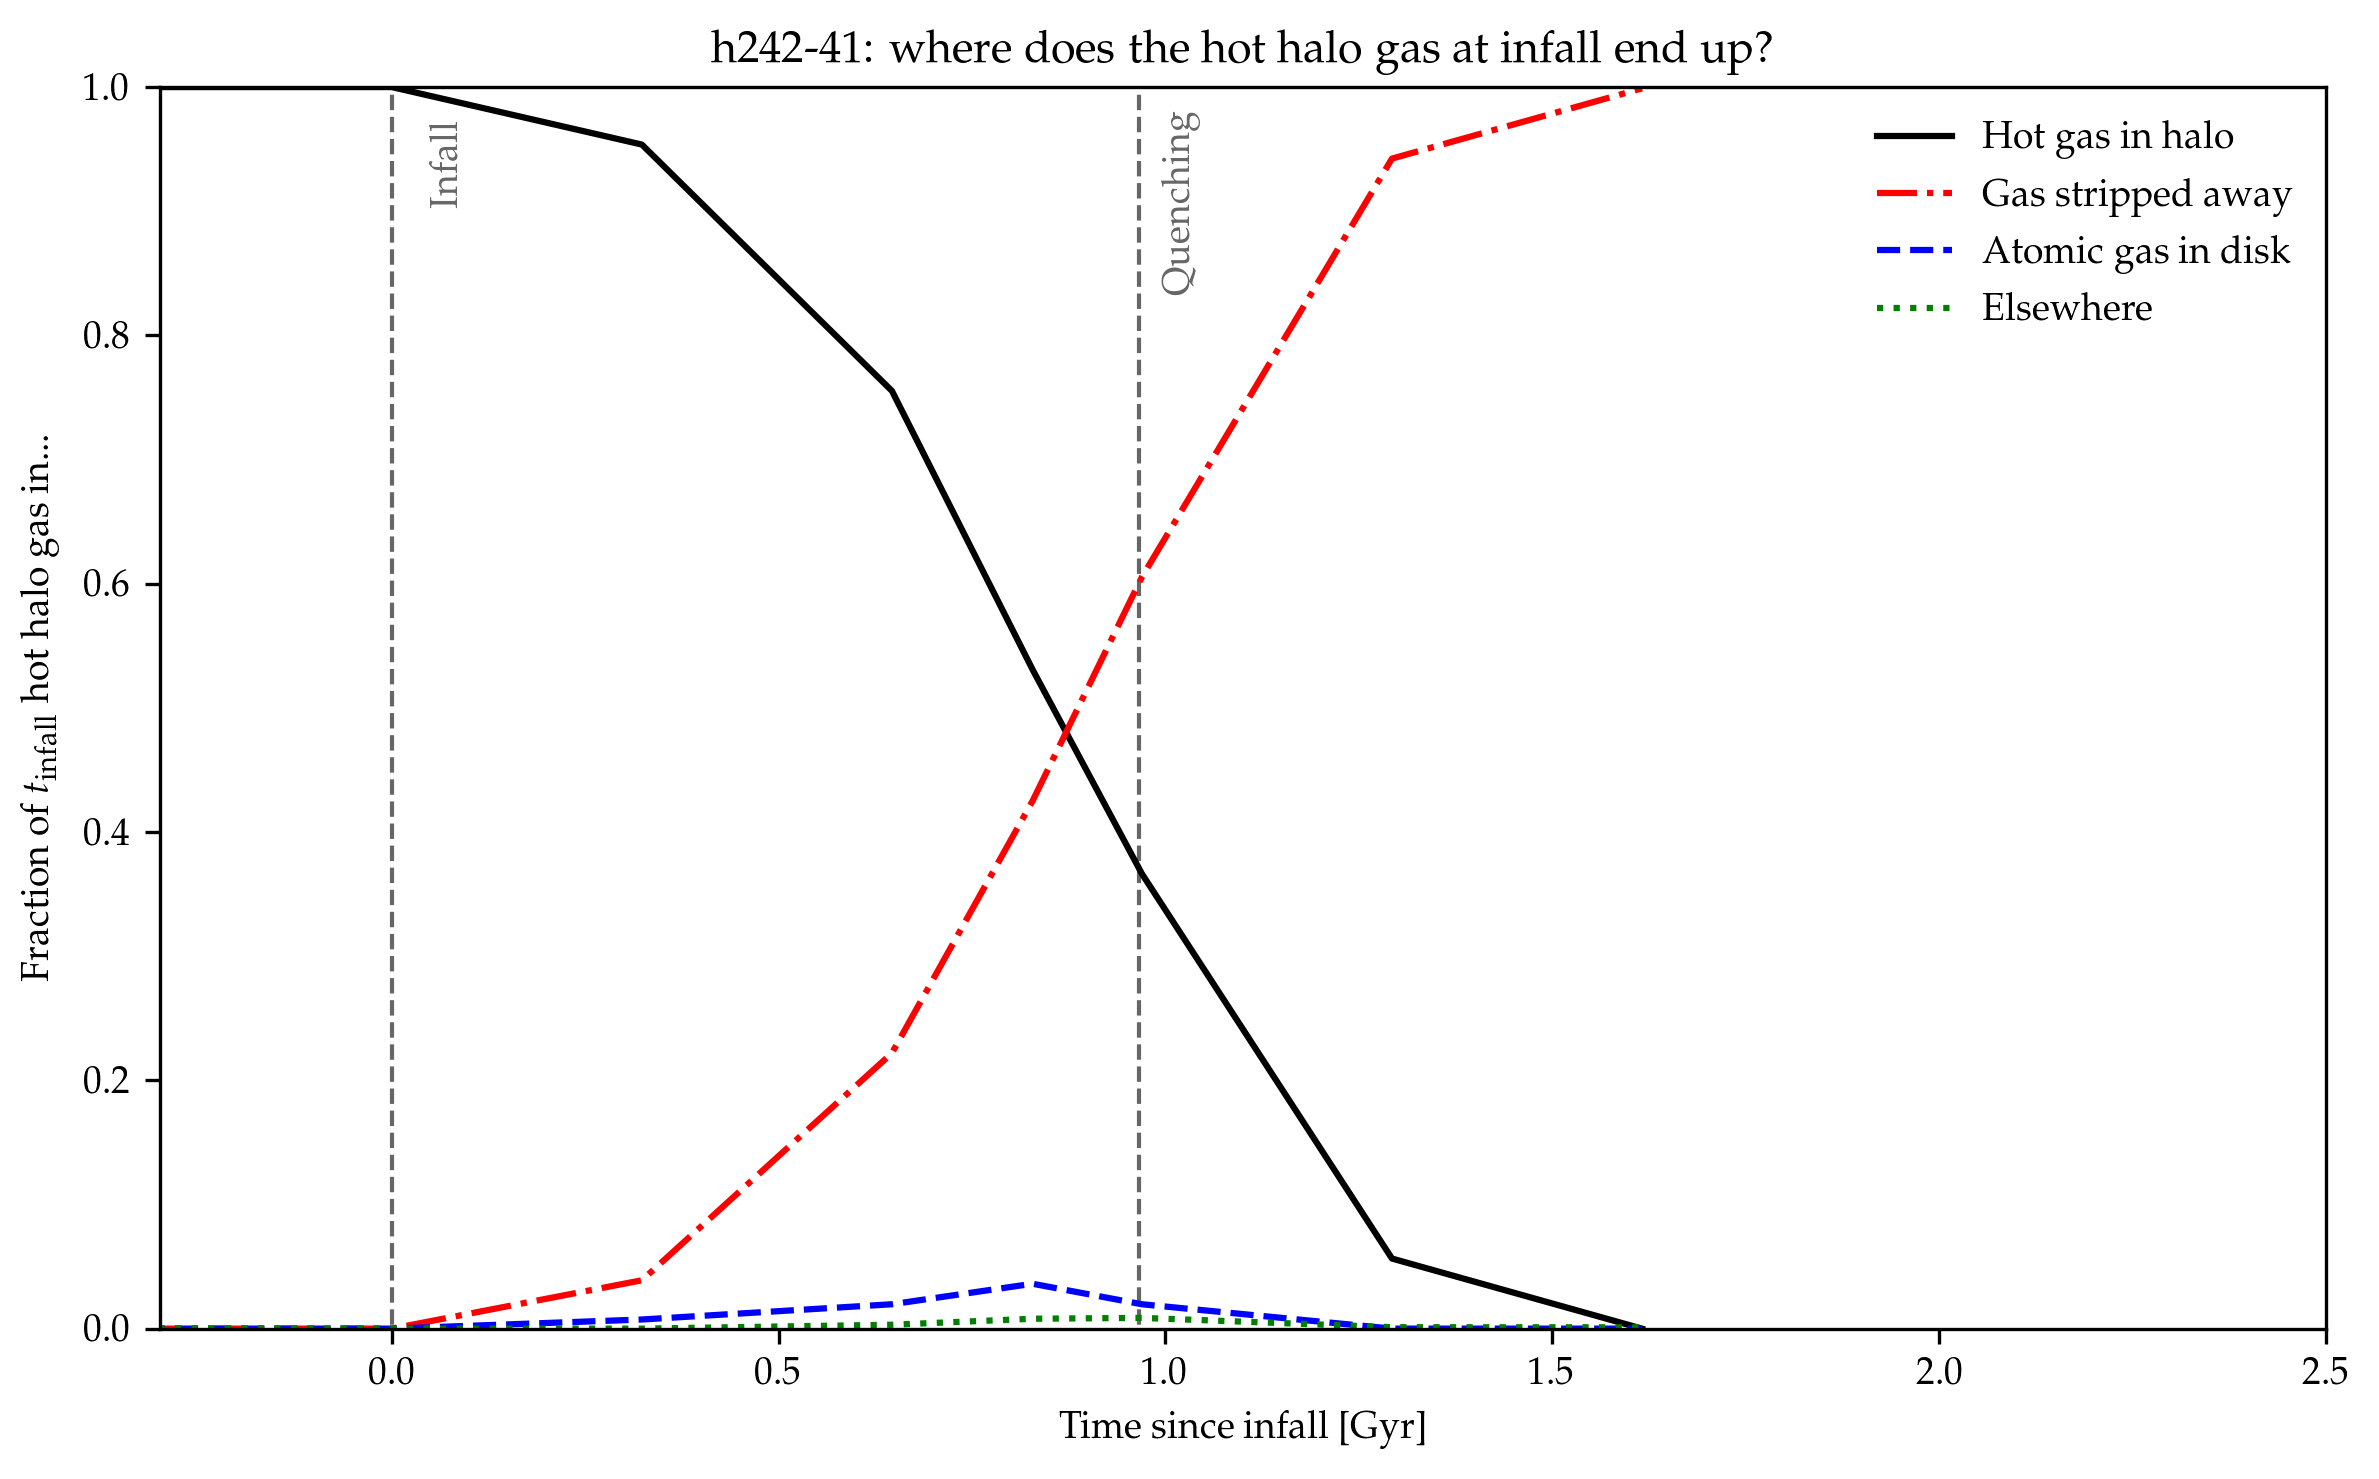

In [244]:
fig, ax = plt.subplots(1,1, figsize=(8,5), dpi=300)

frac_hot = np.array(fracs_hot)
frac_disk = np.array(fracs_disk)
frac_stripped = np.array(fracs_stripped)
frac_cool_halo = np.array(fracs_cool_halo)
frac_dense_halo = np.array(fracs_dense_halo)
frac_cooldense_halo = np.array(fracs_cooldense_halo)

t = np.array(ts) - (age-tinfall)
timescale = tinfall - tquench

ax.plot(t, frac_hot, 'k-', label='Hot gas in halo')

ax.plot(t, frac_stripped, 'r-.', label='Gas stripped away')

ax.plot(t, frac_disk, 'b--', label='Atomic gas in disk')
ax.plot(t, 1-frac_hot-frac_stripped-frac_disk, 'g:', label='Elsewhere')

ax.set_ylim(0, 1)
ax.set_xlim(-0.3,2.5)
ax.legend(frameon=False,ncol=1)

ax.plot([0,0],[-0.05,1.05], 'k--', alpha=0.6, zorder=0,linewidth=1)
ax.annotate('Infall',(0.05,0.91),alpha=0.6, rotation='vertical')
ax.plot([timescale,timescale],[-0.05,1.05],'k--', alpha=0.6, zorder=0,linewidth=1)
ax.annotate(r'Quenching',(timescale+0.03,0.84),alpha=0.6, rotation='vertical')

ax.set_xlabel('Time since infall [Gyr]')
ax.set_ylabel('Fraction of $t_{\mathrm{infall}}$ hot halo gas in...')
ax.set_title('h242-41: where does the hot halo gas at infall end up?')

plt.tight_layout()
# plt.savefig('h242_80_hot_gas_fractions.png',dpi=300)
plt.show()

In [260]:
def read_timescales():
    '''Function to read in the resulting data file which contains quenching and infall times'''
    data = []
    with open('/home/akinshol/Data/Timescales/QuenchingTimescales_sSFR_F19.data', 'rb') as f:
        while True:
            try:
                data.append(pickle.load(f,encoding='latin1'))
            except EOFError:
                break

    data = pd.DataFrame(data)
    return data


data = read_timescales()
data = data[(data.quenched==True)]
data['timescale'] = data.tinfall - data.tquench
data = data[data.timescale > 0]

data = data[(data.haloid == 55)|(data.haloid==22)|(data.haloid==41)]

data

M_star  haloid  n_star quenched   sim   tinfall  tinfall_lower  \
57  1.833826e+06      41     369     True  h242  2.478137       2.801372   
73  7.714878e+07      22   15673     True  h229  9.589313       9.589313   
80  6.790767e+06      55    1379     True  h229  5.710490       5.710490   

    tinfall_upper   tquench  tquench_lower  tquench_upper  timescale  
57       2.478137  1.512063       1.512063       1.512063   0.966074  
73       6.033725  5.183798       5.183798       2.549277   4.405516  
80       5.387255  4.129031       4.129031       4.129031   1.581459

0.7116148154642445


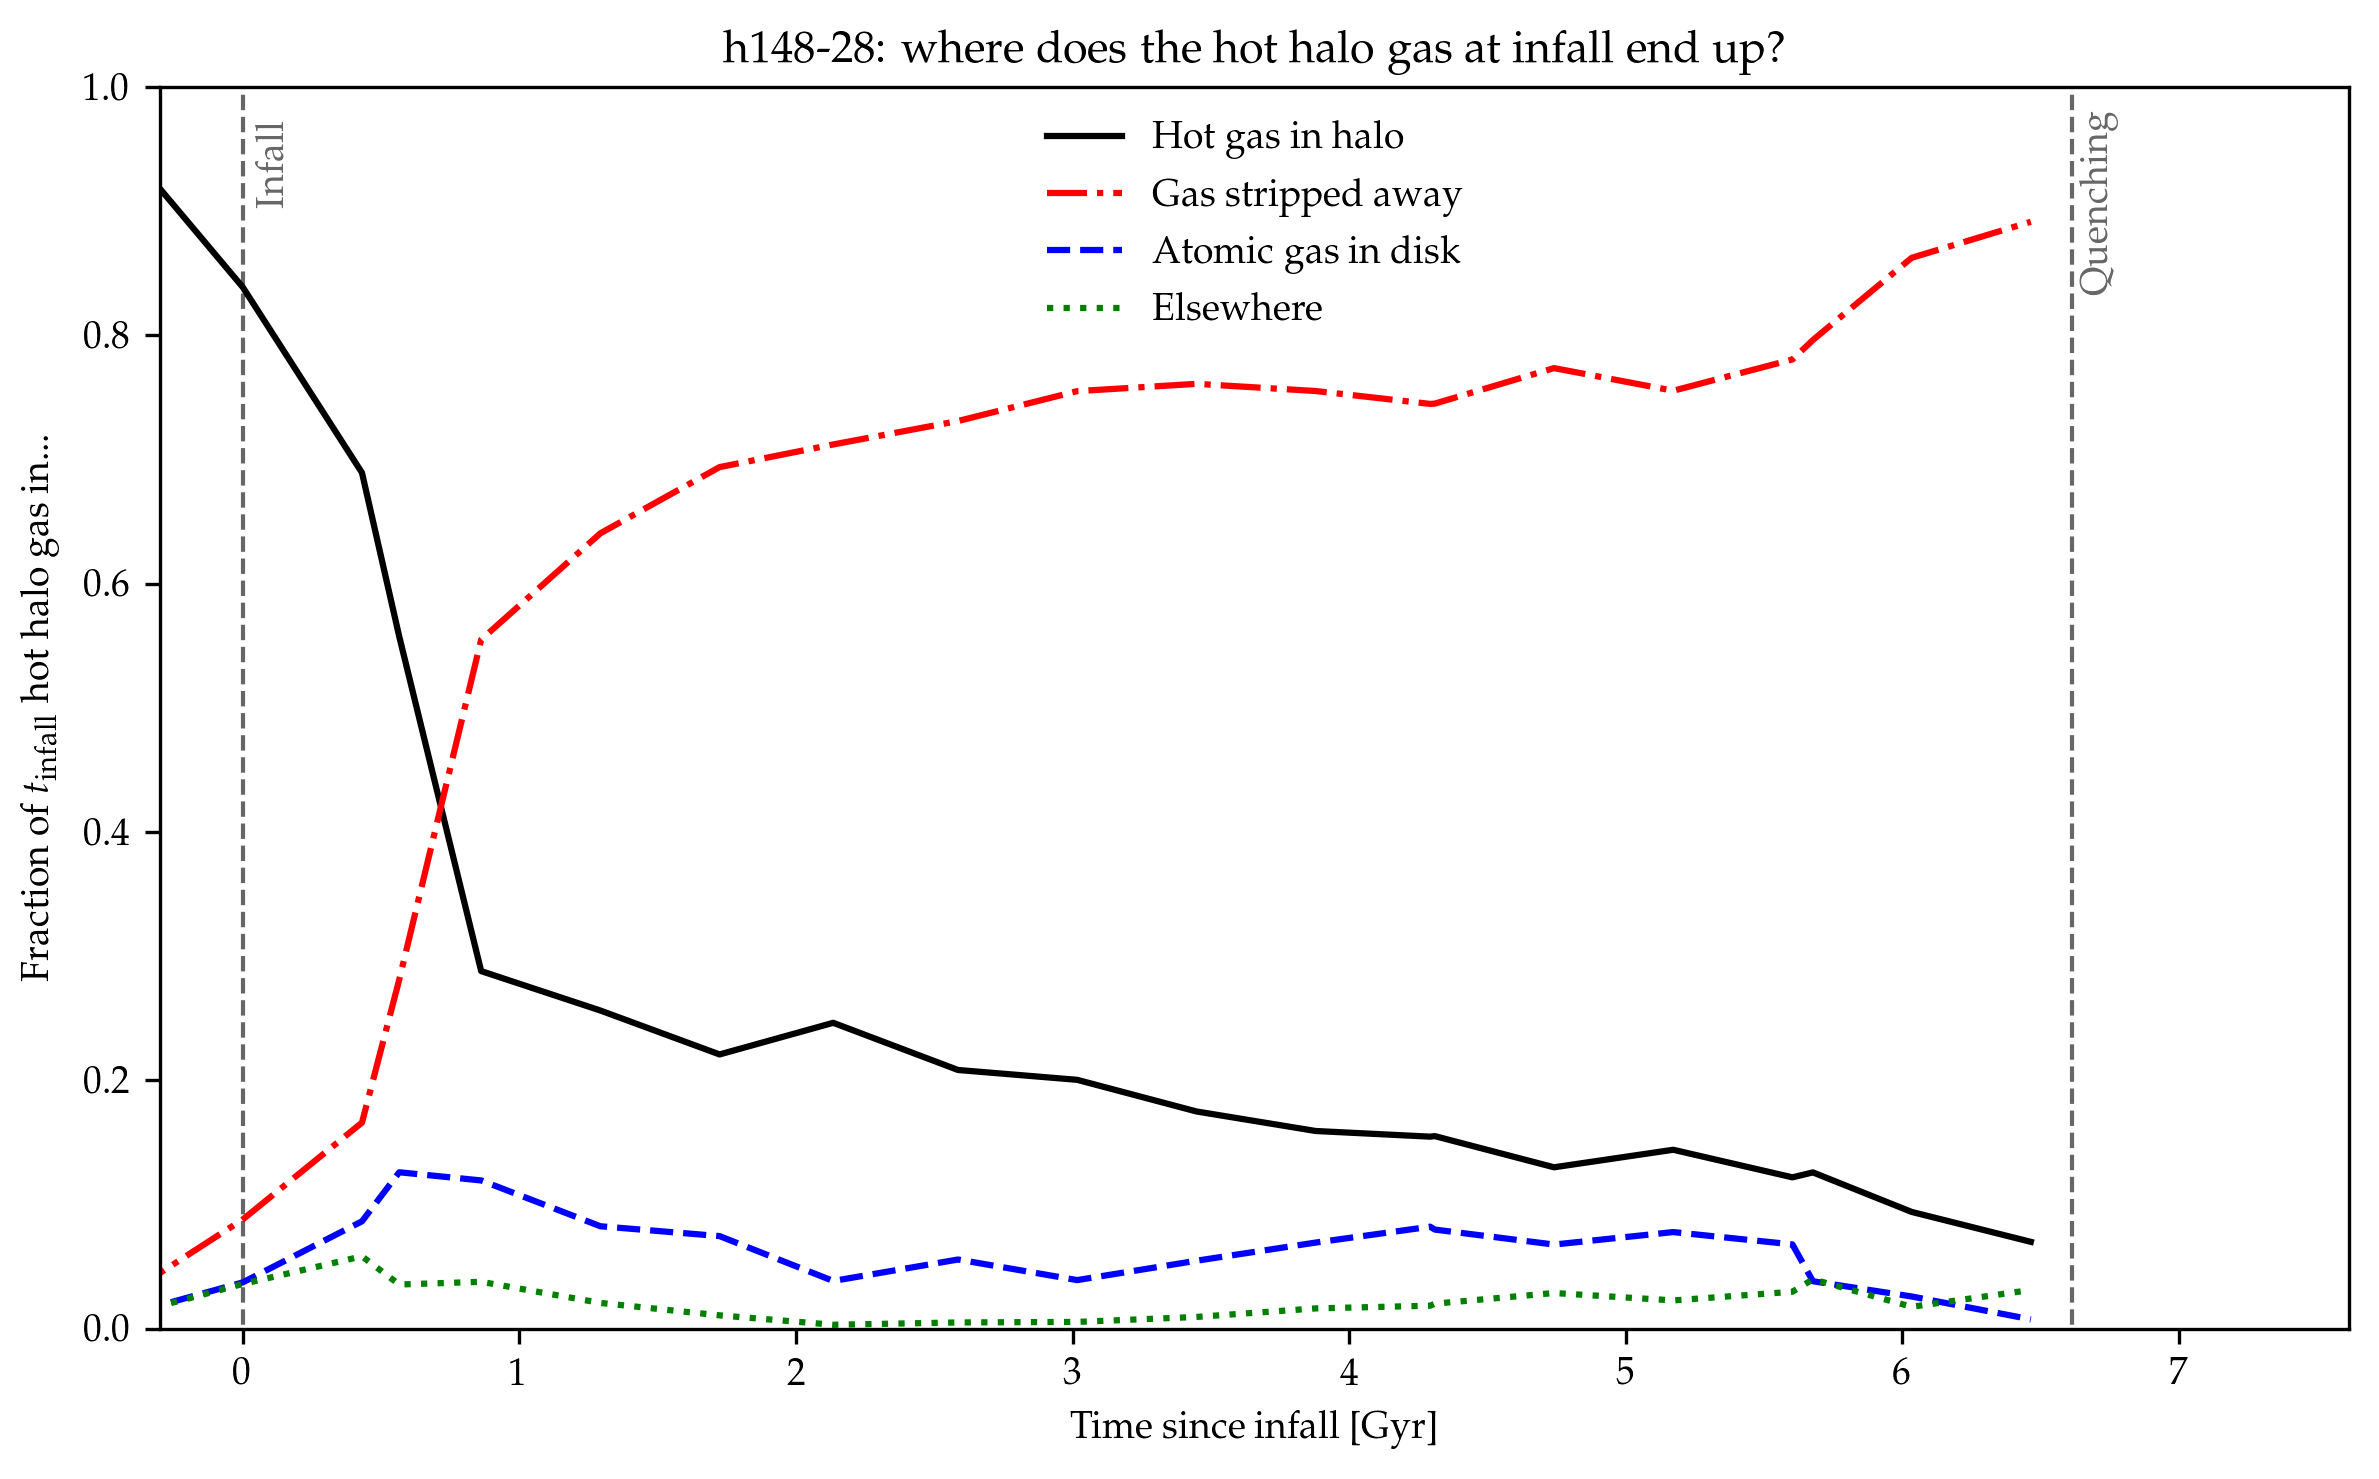

In [254]:
data = read_tracking_data()
data = data[(data.sim=='h148') & (data.haloid==28)]

timescale = np.mean(data.tinfall - data.tquench)
tinfall = np.mean(data.tinfall)
tquench = np.mean(data.tquench)
print(tquench)

t = data.t - (age-tinfall)

fig, ax = plt.subplots(1,1, figsize=(8,5), dpi=300)

ax.plot(t, data.frac_hot, 'k-', label='Hot gas in halo')

ax.plot(t, data.frac_stripped, 'r-.', label='Gas stripped away')

ax.plot(t, data.frac_disk, 'b--', label='Atomic gas in disk')
ax.plot(t, 1-data.frac_hot-data.frac_stripped-data.frac_disk, 'g:', label='Elsewhere')

ax.set_ylim(0, 1)
ax.set_xlim(-0.3,timescale+1)
ax.legend(frameon=False,ncol=1)

ax.plot([0,0],[-0.05,1.05], 'k--', alpha=0.6, zorder=0,linewidth=1)
ax.annotate('Infall',(0.05,0.91),alpha=0.6, rotation='vertical')
ax.plot([timescale,timescale],[-0.05,1.05],'k--', alpha=0.6, zorder=0,linewidth=1)
ax.annotate(r'Quenching',(timescale+0.03,0.84),alpha=0.6, rotation='vertical')

ax.set_xlabel('Time since infall [Gyr]')
ax.set_ylabel('Fraction of $t_{\mathrm{infall}}$ hot halo gas in...')
ax.set_title('h148-28: where does the hot halo gas at infall end up?')

plt.tight_layout()
# plt.savefig('h242_80_hot_gas_fractions.png',dpi=300)
plt.show()

In [261]:
def read_tracking_data(name):
    '''Function to read in the data file which contains hot gas particle tracking data'''
    data = []
    with open(f'/home/akinshol/Data/S20/{name}.data', 'rb') as f:
        while True:
            try:
                data.append(pickle.load(f,encoding='latin1'))
            except EOFError:
                break

    data = pd.DataFrame(data)
    return data

In [278]:
data = read_tracking_data('HotGasTracking')
np.unique(data.haloid)

array([22, 41, 55])

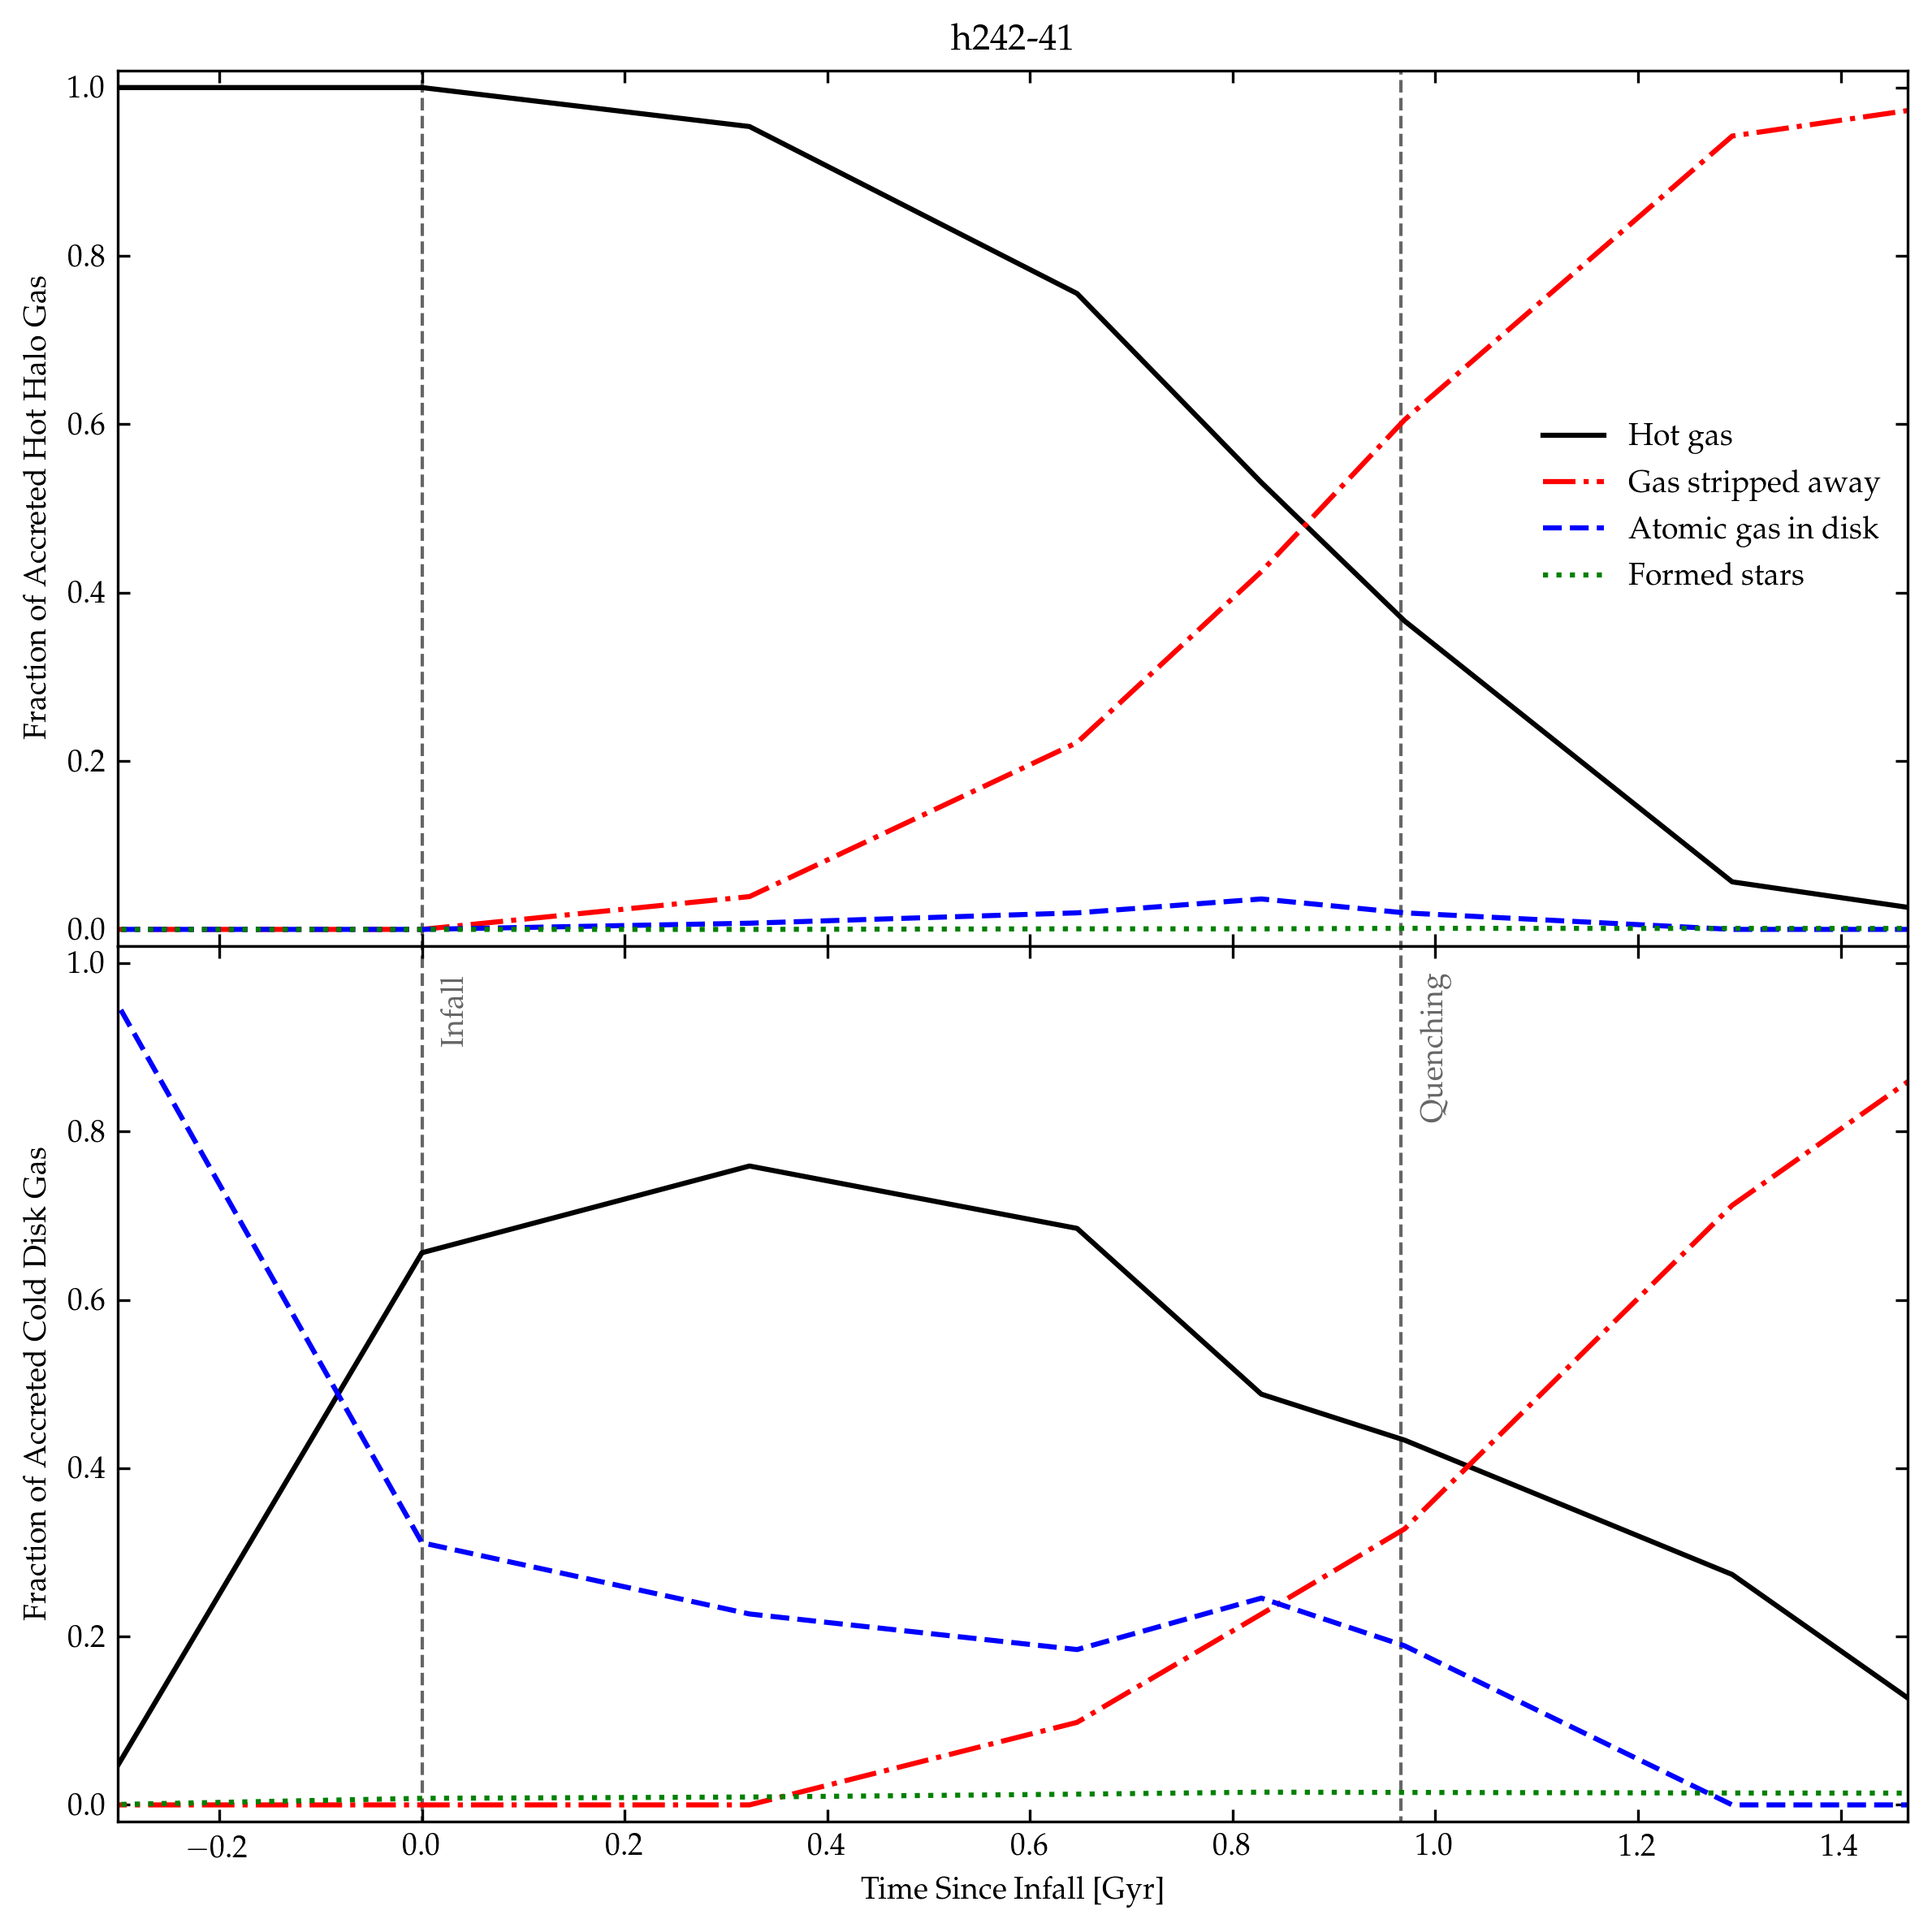

In [276]:
hgas = read_tracking_data('HotGasTracking')
cgas = read_tracking_data('ColdGasTracking')

sim, haloid = 'h242', 41
hgas = hgas[(hgas.sim==sim)&(hgas.haloid==haloid)]
cgas = cgas[(cgas.sim==sim)&(cgas.haloid==haloid)]


fig, ax = plt.subplots(2,1,figsize=(8,8),dpi=300, sharex=True)

### Top Panel: Hot Gas
timescale = np.mean(hgas.tinfall - hgas.tquench)
tinfall = np.mean(hgas.tinfall)
tquench = np.mean(hgas.tquench)

t = hgas.t - (age-tinfall)

ax[0].plot(t, hgas.frac_hot, 'k-', label='Hot gas')
ax[0].plot(t, hgas.frac_stripped, 'r-.', label='Gas stripped away')
ax[0].plot(t, hgas.frac_disk, 'b--', label='Atomic gas in disk')
ax[0].plot(t, hgas.frac_stars, 'g:', label='Formed stars')
# ax[0].plot(t, 1-hgas.frac_hot-hgas.frac_stripped-hgas.frac_disk, 'g:', label='Elsewhere')

ax[0].set_ylim(-0.02, 1.02)
ax[0].set_xlim(-0.3,timescale+0.5)
ax[0].legend(frameon=False,ncol=1)

ax[0].plot([0,0],[-0.05,1.05], 'k--', alpha=0.6, zorder=0,linewidth=1)
ax[0].plot([timescale,timescale],[-0.05,1.05],'k--', alpha=0.6, zorder=0,linewidth=1)

ax[0].set_ylabel('Fraction of Accreted Hot Halo Gas')
ax[0].set_title(f'{sim}-{haloid}')

### Bottom Panel: Cold Gas
timescale = np.mean(cgas.tinfall - cgas.tquench)
tinfall = np.mean(cgas.tinfall)
tquench = np.mean(cgas.tquench)

t = cgas.t - (age-tinfall)

ax[1].plot(t, cgas.frac_hot, 'k-', label='Hot gas')
ax[1].plot(t, cgas.frac_stripped, 'r-.', label='Gas stripped away')
ax[1].plot(t, cgas.frac_disk, 'b--', label='Atomic gas in disk')
ax[1].plot(t, cgas.frac_stars, 'g:', label='Formed stars')
#ax[1].plot(t, 1-cgas.frac_hot-cgas.frac_stripped-cgas.frac_disk, 'g:', label='Elsewhere')

ax[1].set_ylim(-.02, 1.02)
ax[1].set_xlim(-0.3,timescale+0.5)
#ax[1].legend(frameon=False,ncol=2)

ax[1].plot([0,0],[-0.05,1.05], 'k--', alpha=0.6, zorder=0,linewidth=1)
ax[1].annotate('Infall',(0.02,0.91),alpha=0.6, rotation='vertical')
ax[1].plot([timescale,timescale],[-0.05,1.05],'k--', alpha=0.6, zorder=0,linewidth=1)
ax[1].annotate(r'Quenching',(timescale+0.02,0.82),alpha=0.6, rotation='vertical')
ax[1].set_xlabel('Time Since Infall [Gyr]')
ax[1].set_ylabel('Fraction of Accreted Cold Disk Gas')

ax[0].tick_params(direction='in',which='both')
ax[0].yaxis.set_ticks_position('both')
ax[0].xaxis.set_ticks_position('both')
ax[1].tick_params(direction='in',which='both')
ax[1].yaxis.set_ticks_position('both')
ax[1].xaxis.set_ticks_position('both')


plt.tight_layout()
plt.subplots_adjust(hspace=0.)

#plt.savefig(f'{sim}-{haloid}-particletracking.png'.dpi=300)
plt.show()

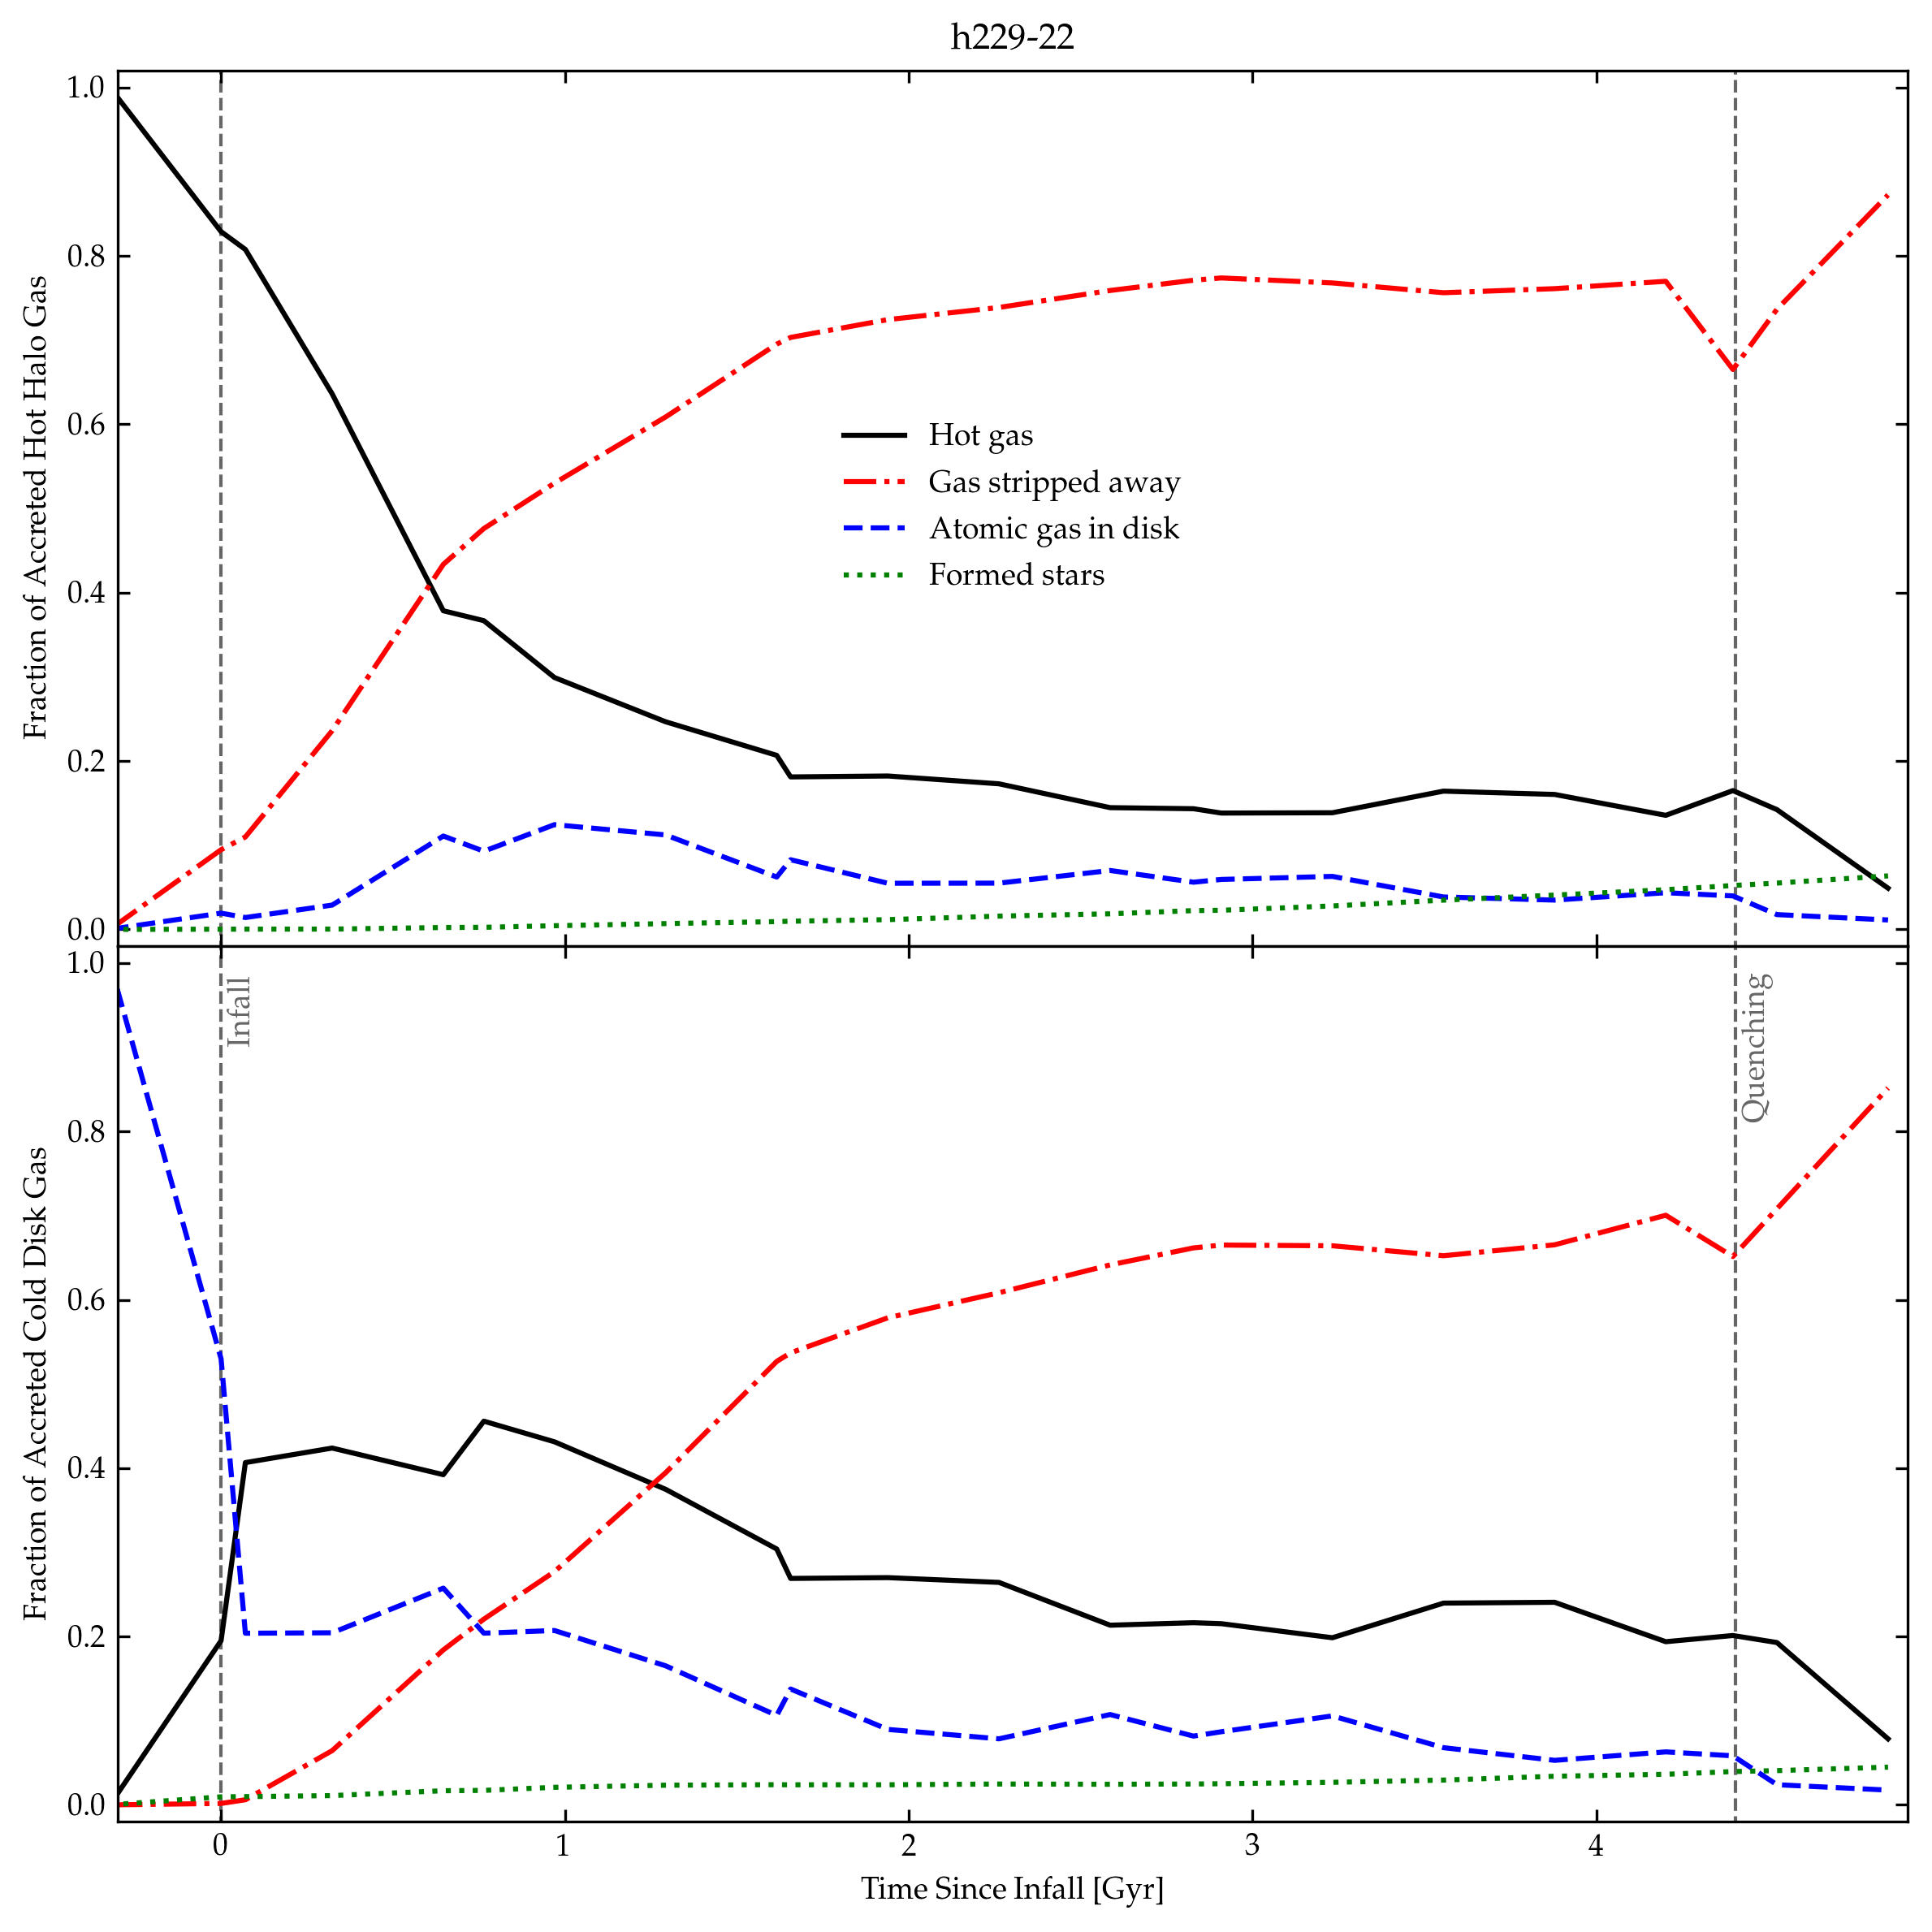

In [279]:
hgas = read_tracking_data('HotGasTracking')
cgas = read_tracking_data('ColdGasTracking')

sim, haloid = 'h229', 22
hgas = hgas[(hgas.sim==sim)&(hgas.haloid==haloid)]
cgas = cgas[(cgas.sim==sim)&(cgas.haloid==haloid)]


fig, ax = plt.subplots(2,1,figsize=(8,8),dpi=300, sharex=True)

### Top Panel: Hot Gas
timescale = np.mean(hgas.tinfall - hgas.tquench)
tinfall = np.mean(hgas.tinfall)
tquench = np.mean(hgas.tquench)

t = hgas.t - (age-tinfall)

ax[0].plot(t, hgas.frac_hot, 'k-', label='Hot gas')
ax[0].plot(t, hgas.frac_stripped, 'r-.', label='Gas stripped away')
ax[0].plot(t, hgas.frac_disk, 'b--', label='Atomic gas in disk')
ax[0].plot(t, hgas.frac_stars, 'g:', label='Formed stars')
# ax[0].plot(t, 1-hgas.frac_hot-hgas.frac_stripped-hgas.frac_disk, 'g:', label='Elsewhere')

ax[0].set_ylim(-0.02, 1.02)
ax[0].set_xlim(-0.3,timescale+0.5)
ax[0].legend(frameon=False,ncol=1)

ax[0].plot([0,0],[-0.05,1.05], 'k--', alpha=0.6, zorder=0,linewidth=1)
ax[0].plot([timescale,timescale],[-0.05,1.05],'k--', alpha=0.6, zorder=0,linewidth=1)

ax[0].set_ylabel('Fraction of Accreted Hot Halo Gas')
ax[0].set_title(f'{sim}-{haloid}')

### Bottom Panel: Cold Gas
timescale = np.mean(cgas.tinfall - cgas.tquench)
tinfall = np.mean(cgas.tinfall)
tquench = np.mean(cgas.tquench)

t = cgas.t - (age-tinfall)

ax[1].plot(t, cgas.frac_hot, 'k-', label='Hot gas')
ax[1].plot(t, cgas.frac_stripped, 'r-.', label='Gas stripped away')
ax[1].plot(t, cgas.frac_disk, 'b--', label='Atomic gas in disk')
ax[1].plot(t, cgas.frac_stars, 'g:', label='Formed stars')
#ax[1].plot(t, 1-cgas.frac_hot-cgas.frac_stripped-cgas.frac_disk, 'g:', label='Elsewhere')

ax[1].set_ylim(-.02, 1.02)
ax[1].set_xlim(-0.3,timescale+0.5)
#ax[1].legend(frameon=False,ncol=2)

ax[1].plot([0,0],[-0.05,1.05], 'k--', alpha=0.6, zorder=0,linewidth=1)
ax[1].annotate('Infall',(0.02,0.91),alpha=0.6, rotation='vertical')
ax[1].plot([timescale,timescale],[-0.05,1.05],'k--', alpha=0.6, zorder=0,linewidth=1)
ax[1].annotate(r'Quenching',(timescale+0.02,0.82),alpha=0.6, rotation='vertical')
ax[1].set_xlabel('Time Since Infall [Gyr]')
ax[1].set_ylabel('Fraction of Accreted Cold Disk Gas')

ax[0].tick_params(direction='in',which='both')
ax[0].yaxis.set_ticks_position('both')
ax[0].xaxis.set_ticks_position('both')
ax[1].tick_params(direction='in',which='both')
ax[1].yaxis.set_ticks_position('both')
ax[1].xaxis.set_ticks_position('both')


plt.tight_layout()
plt.subplots_adjust(hspace=0.)

#plt.savefig(f'{sim}-{haloid}-particletracking.png'.dpi=300)
plt.show()

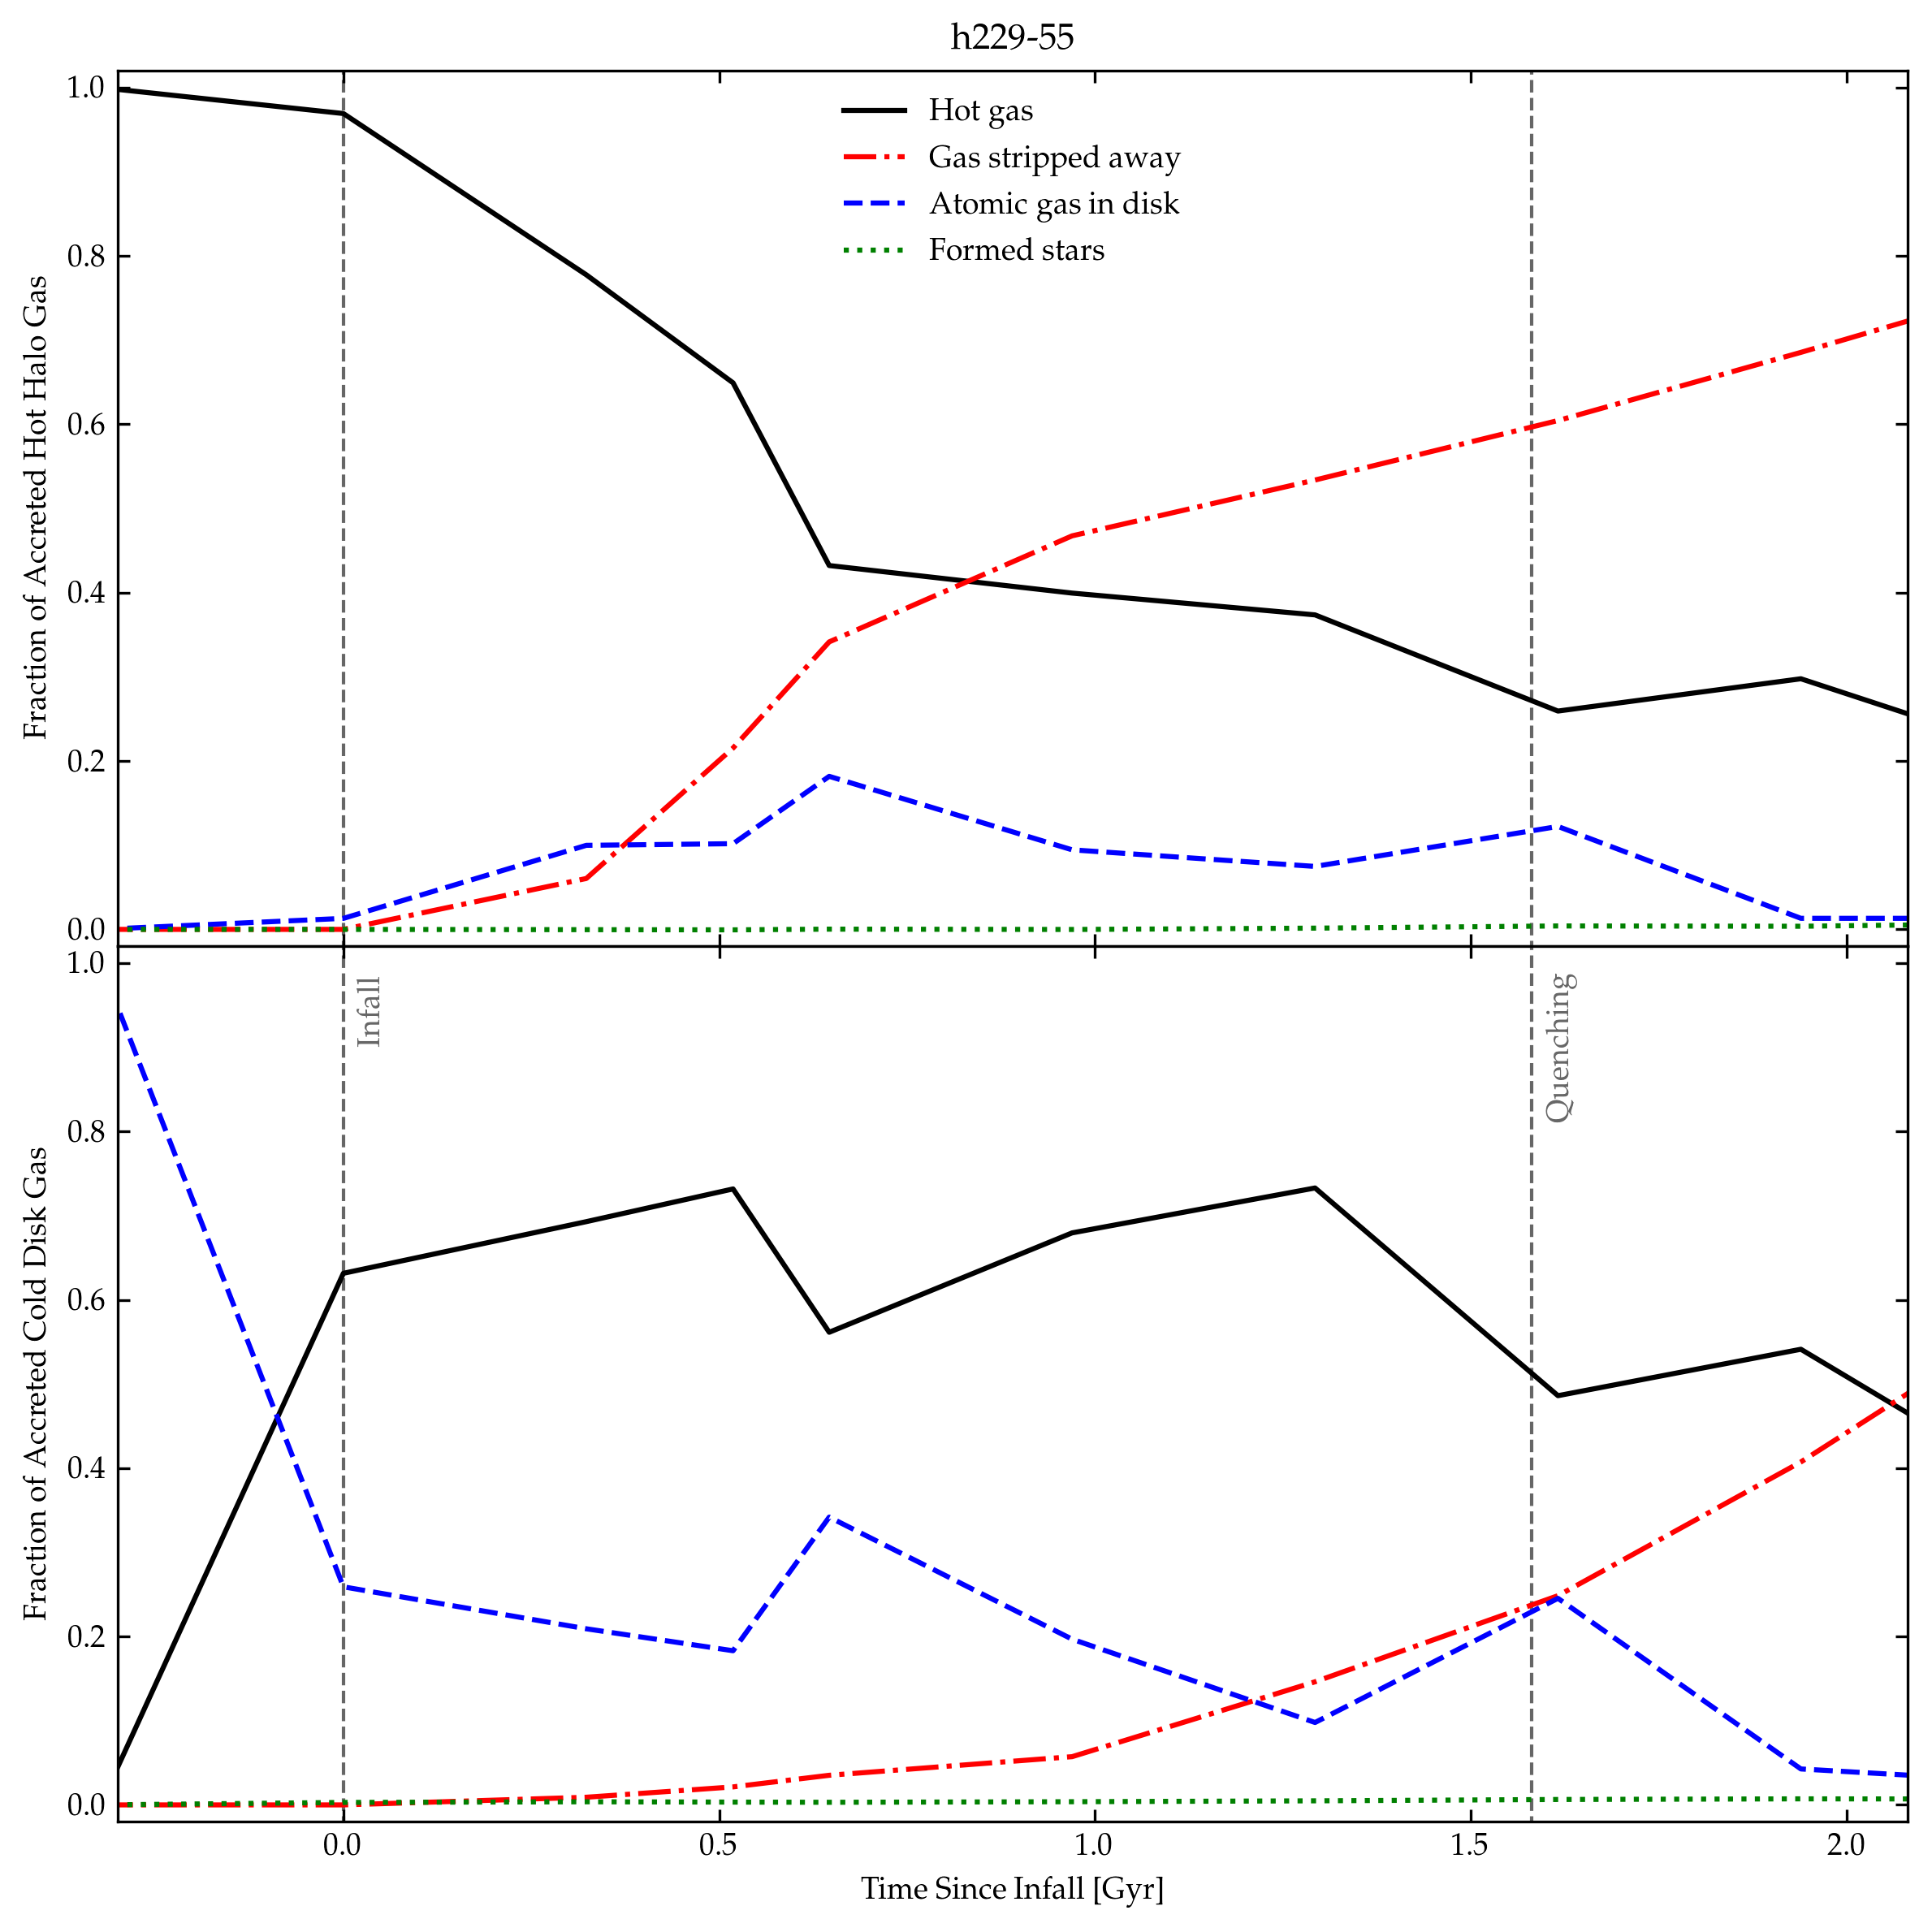

In [280]:
hgas = read_tracking_data('HotGasTracking')
cgas = read_tracking_data('ColdGasTracking')

sim, haloid = 'h229', 55
hgas = hgas[(hgas.sim==sim)&(hgas.haloid==haloid)]
cgas = cgas[(cgas.sim==sim)&(cgas.haloid==haloid)]


fig, ax = plt.subplots(2,1,figsize=(8,8),dpi=300, sharex=True)

### Top Panel: Hot Gas
timescale = np.mean(hgas.tinfall - hgas.tquench)
tinfall = np.mean(hgas.tinfall)
tquench = np.mean(hgas.tquench)

t = hgas.t - (age-tinfall)

ax[0].plot(t, hgas.frac_hot, 'k-', label='Hot gas')
ax[0].plot(t, hgas.frac_stripped, 'r-.', label='Gas stripped away')
ax[0].plot(t, hgas.frac_disk, 'b--', label='Atomic gas in disk')
ax[0].plot(t, hgas.frac_stars, 'g:', label='Formed stars')
# ax[0].plot(t, 1-hgas.frac_hot-hgas.frac_stripped-hgas.frac_disk, 'g:', label='Elsewhere')

ax[0].set_ylim(-0.02, 1.02)
ax[0].set_xlim(-0.3,timescale+0.5)
ax[0].legend(frameon=False,ncol=1)

ax[0].plot([0,0],[-0.05,1.05], 'k--', alpha=0.6, zorder=0,linewidth=1)
ax[0].plot([timescale,timescale],[-0.05,1.05],'k--', alpha=0.6, zorder=0,linewidth=1)

ax[0].set_ylabel('Fraction of Accreted Hot Halo Gas')
ax[0].set_title(f'{sim}-{haloid}')

### Bottom Panel: Cold Gas
timescale = np.mean(cgas.tinfall - cgas.tquench)
tinfall = np.mean(cgas.tinfall)
tquench = np.mean(cgas.tquench)

t = cgas.t - (age-tinfall)

ax[1].plot(t, cgas.frac_hot, 'k-', label='Hot gas')
ax[1].plot(t, cgas.frac_stripped, 'r-.', label='Gas stripped away')
ax[1].plot(t, cgas.frac_disk, 'b--', label='Atomic gas in disk')
ax[1].plot(t, cgas.frac_stars, 'g:', label='Formed stars')
#ax[1].plot(t, 1-cgas.frac_hot-cgas.frac_stripped-cgas.frac_disk, 'g:', label='Elsewhere')

ax[1].set_ylim(-.02, 1.02)
ax[1].set_xlim(-0.3,timescale+0.5)
#ax[1].legend(frameon=False,ncol=2)

ax[1].plot([0,0],[-0.05,1.05], 'k--', alpha=0.6, zorder=0,linewidth=1)
ax[1].annotate('Infall',(0.02,0.91),alpha=0.6, rotation='vertical')
ax[1].plot([timescale,timescale],[-0.05,1.05],'k--', alpha=0.6, zorder=0,linewidth=1)
ax[1].annotate(r'Quenching',(timescale+0.02,0.82),alpha=0.6, rotation='vertical')
ax[1].set_xlabel('Time Since Infall [Gyr]')
ax[1].set_ylabel('Fraction of Accreted Cold Disk Gas')

ax[0].tick_params(direction='in',which='both')
ax[0].yaxis.set_ticks_position('both')
ax[0].xaxis.set_ticks_position('both')
ax[1].tick_params(direction='in',which='both')
ax[1].yaxis.set_ticks_position('both')
ax[1].xaxis.set_ticks_position('both')


plt.tight_layout()
plt.subplots_adjust(hspace=0.)

#plt.savefig(f'{sim}-{haloid}-particletracking.png'.dpi=300)
plt.show()

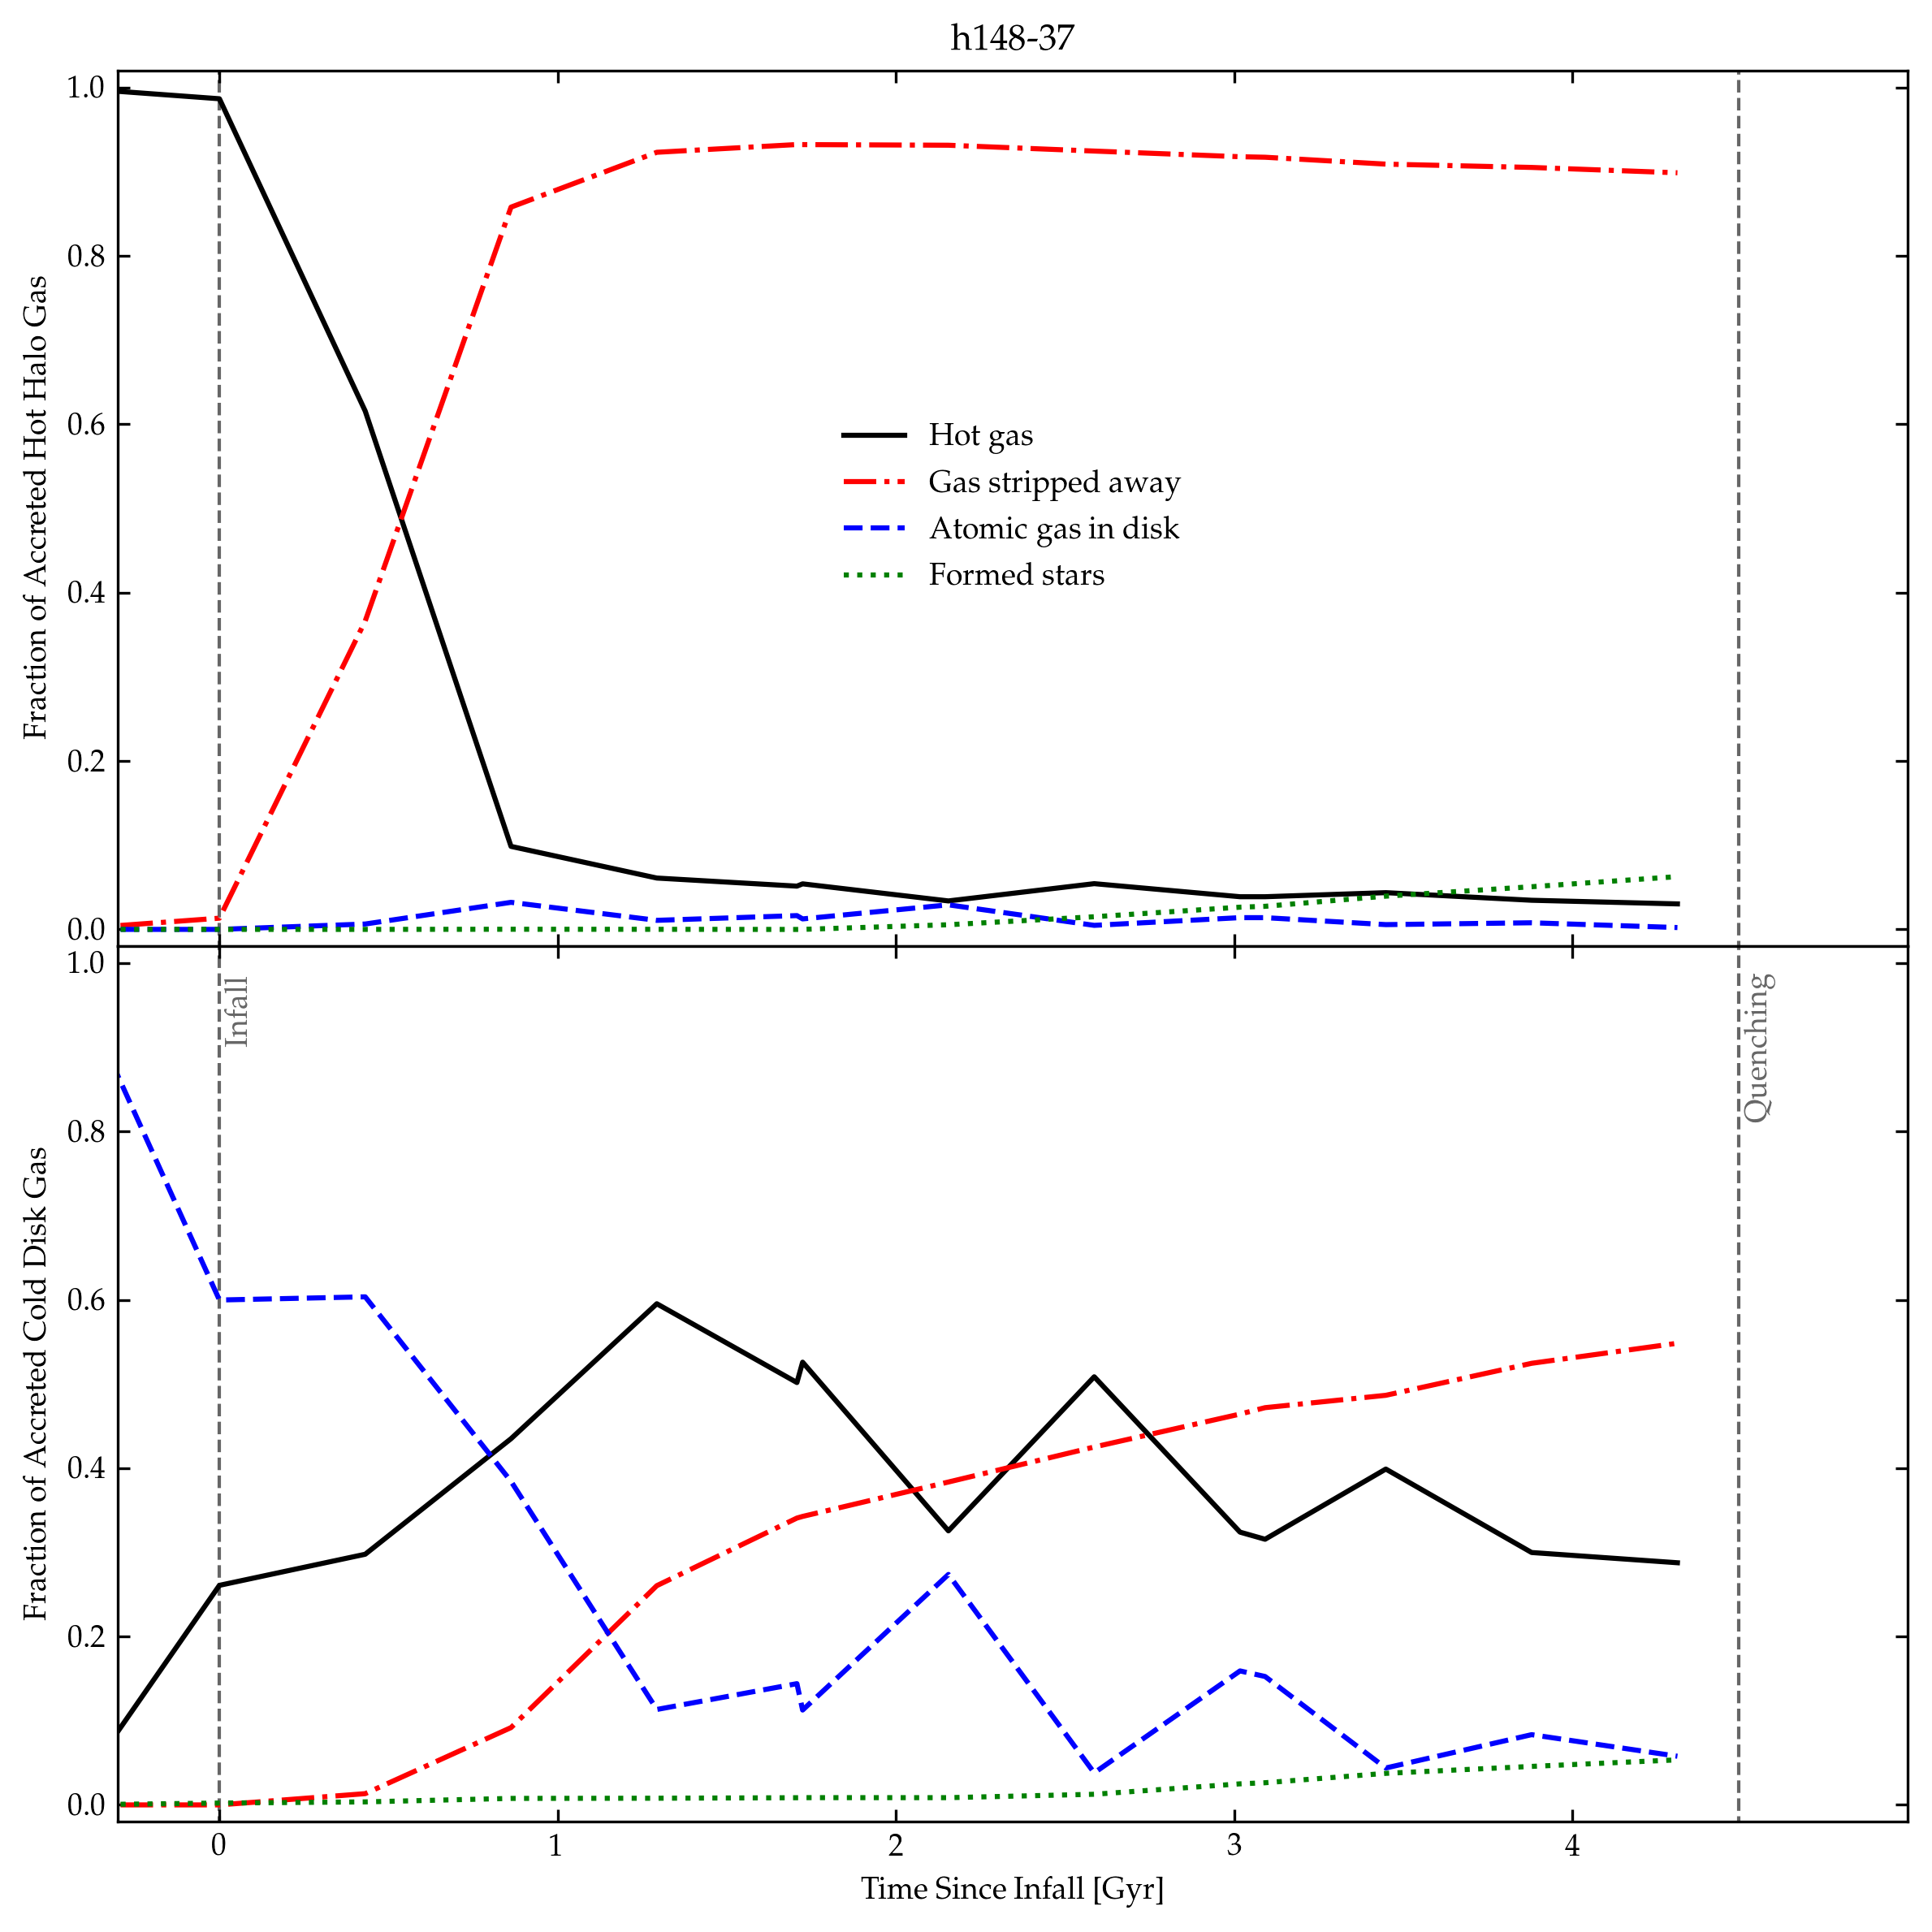

In [288]:
hgas = read_tracking_data('HotGasTracking')
cgas = read_tracking_data('ColdGasTracking')

sim, haloid = 'h148', 37
hgas = hgas[(hgas.sim==sim)&(hgas.haloid==haloid)]
cgas = cgas[(cgas.sim==sim)&(cgas.haloid==haloid)]


fig, ax = plt.subplots(2,1,figsize=(8,8),dpi=300, sharex=True)

### Top Panel: Hot Gas
timescale = np.mean(hgas.tinfall - hgas.tquench)
tinfall = np.mean(hgas.tinfall)
tquench = np.mean(hgas.tquench)

t = hgas.t - (age-tinfall)

ax[0].plot(t, hgas.frac_hot, 'k-', label='Hot gas')
ax[0].plot(t, hgas.frac_stripped, 'r-.', label='Gas stripped away')
ax[0].plot(t, hgas.frac_disk, 'b--', label='Atomic gas in disk')
ax[0].plot(t, hgas.frac_stars, 'g:', label='Formed stars')
# ax[0].plot(t, 1-hgas.frac_hot-hgas.frac_stripped-hgas.frac_disk, 'g:', label='Elsewhere')

ax[0].set_ylim(-0.02, 1.02)
ax[0].set_xlim(-0.3,timescale+0.5)
ax[0].legend(frameon=False,ncol=1)

ax[0].plot([0,0],[-0.05,1.05], 'k--', alpha=0.6, zorder=0,linewidth=1)
ax[0].plot([timescale,timescale],[-0.05,1.05],'k--', alpha=0.6, zorder=0,linewidth=1)

ax[0].set_ylabel('Fraction of Accreted Hot Halo Gas')
ax[0].set_title(f'{sim}-{haloid}')

### Bottom Panel: Cold Gas
timescale = np.mean(cgas.tinfall - cgas.tquench)
tinfall = np.mean(cgas.tinfall)
tquench = np.mean(cgas.tquench)

t = cgas.t - (age-tinfall)

ax[1].plot(t, cgas.frac_hot, 'k-', label='Hot gas')
ax[1].plot(t, cgas.frac_stripped, 'r-.', label='Gas stripped away')
ax[1].plot(t, cgas.frac_disk, 'b--', label='Atomic gas in disk')
ax[1].plot(t, cgas.frac_stars, 'g:', label='Formed stars')
#ax[1].plot(t, 1-cgas.frac_hot-cgas.frac_stripped-cgas.frac_disk, 'g:', label='Elsewhere')

ax[1].set_ylim(-.02, 1.02)
ax[1].set_xlim(-0.3,timescale+0.5)
#ax[1].legend(frameon=False,ncol=2)

ax[1].plot([0,0],[-0.05,1.05], 'k--', alpha=0.6, zorder=0,linewidth=1)
ax[1].annotate('Infall',(0.02,0.91),alpha=0.6, rotation='vertical')
ax[1].plot([timescale,timescale],[-0.05,1.05],'k--', alpha=0.6, zorder=0,linewidth=1)
ax[1].annotate(r'Quenching',(timescale+0.02,0.82),alpha=0.6, rotation='vertical')
ax[1].set_xlabel('Time Since Infall [Gyr]')
ax[1].set_ylabel('Fraction of Accreted Cold Disk Gas')

ax[0].tick_params(direction='in',which='both')
ax[0].yaxis.set_ticks_position('both')
ax[0].xaxis.set_ticks_position('both')
ax[1].tick_params(direction='in',which='both')
ax[1].yaxis.set_ticks_position('both')
ax[1].xaxis.set_ticks_position('both')


plt.tight_layout()
plt.subplots_adjust(hspace=0.)

#plt.savefig(f'{sim}-{haloid}-particletracking.png'.dpi=300)
plt.show()x

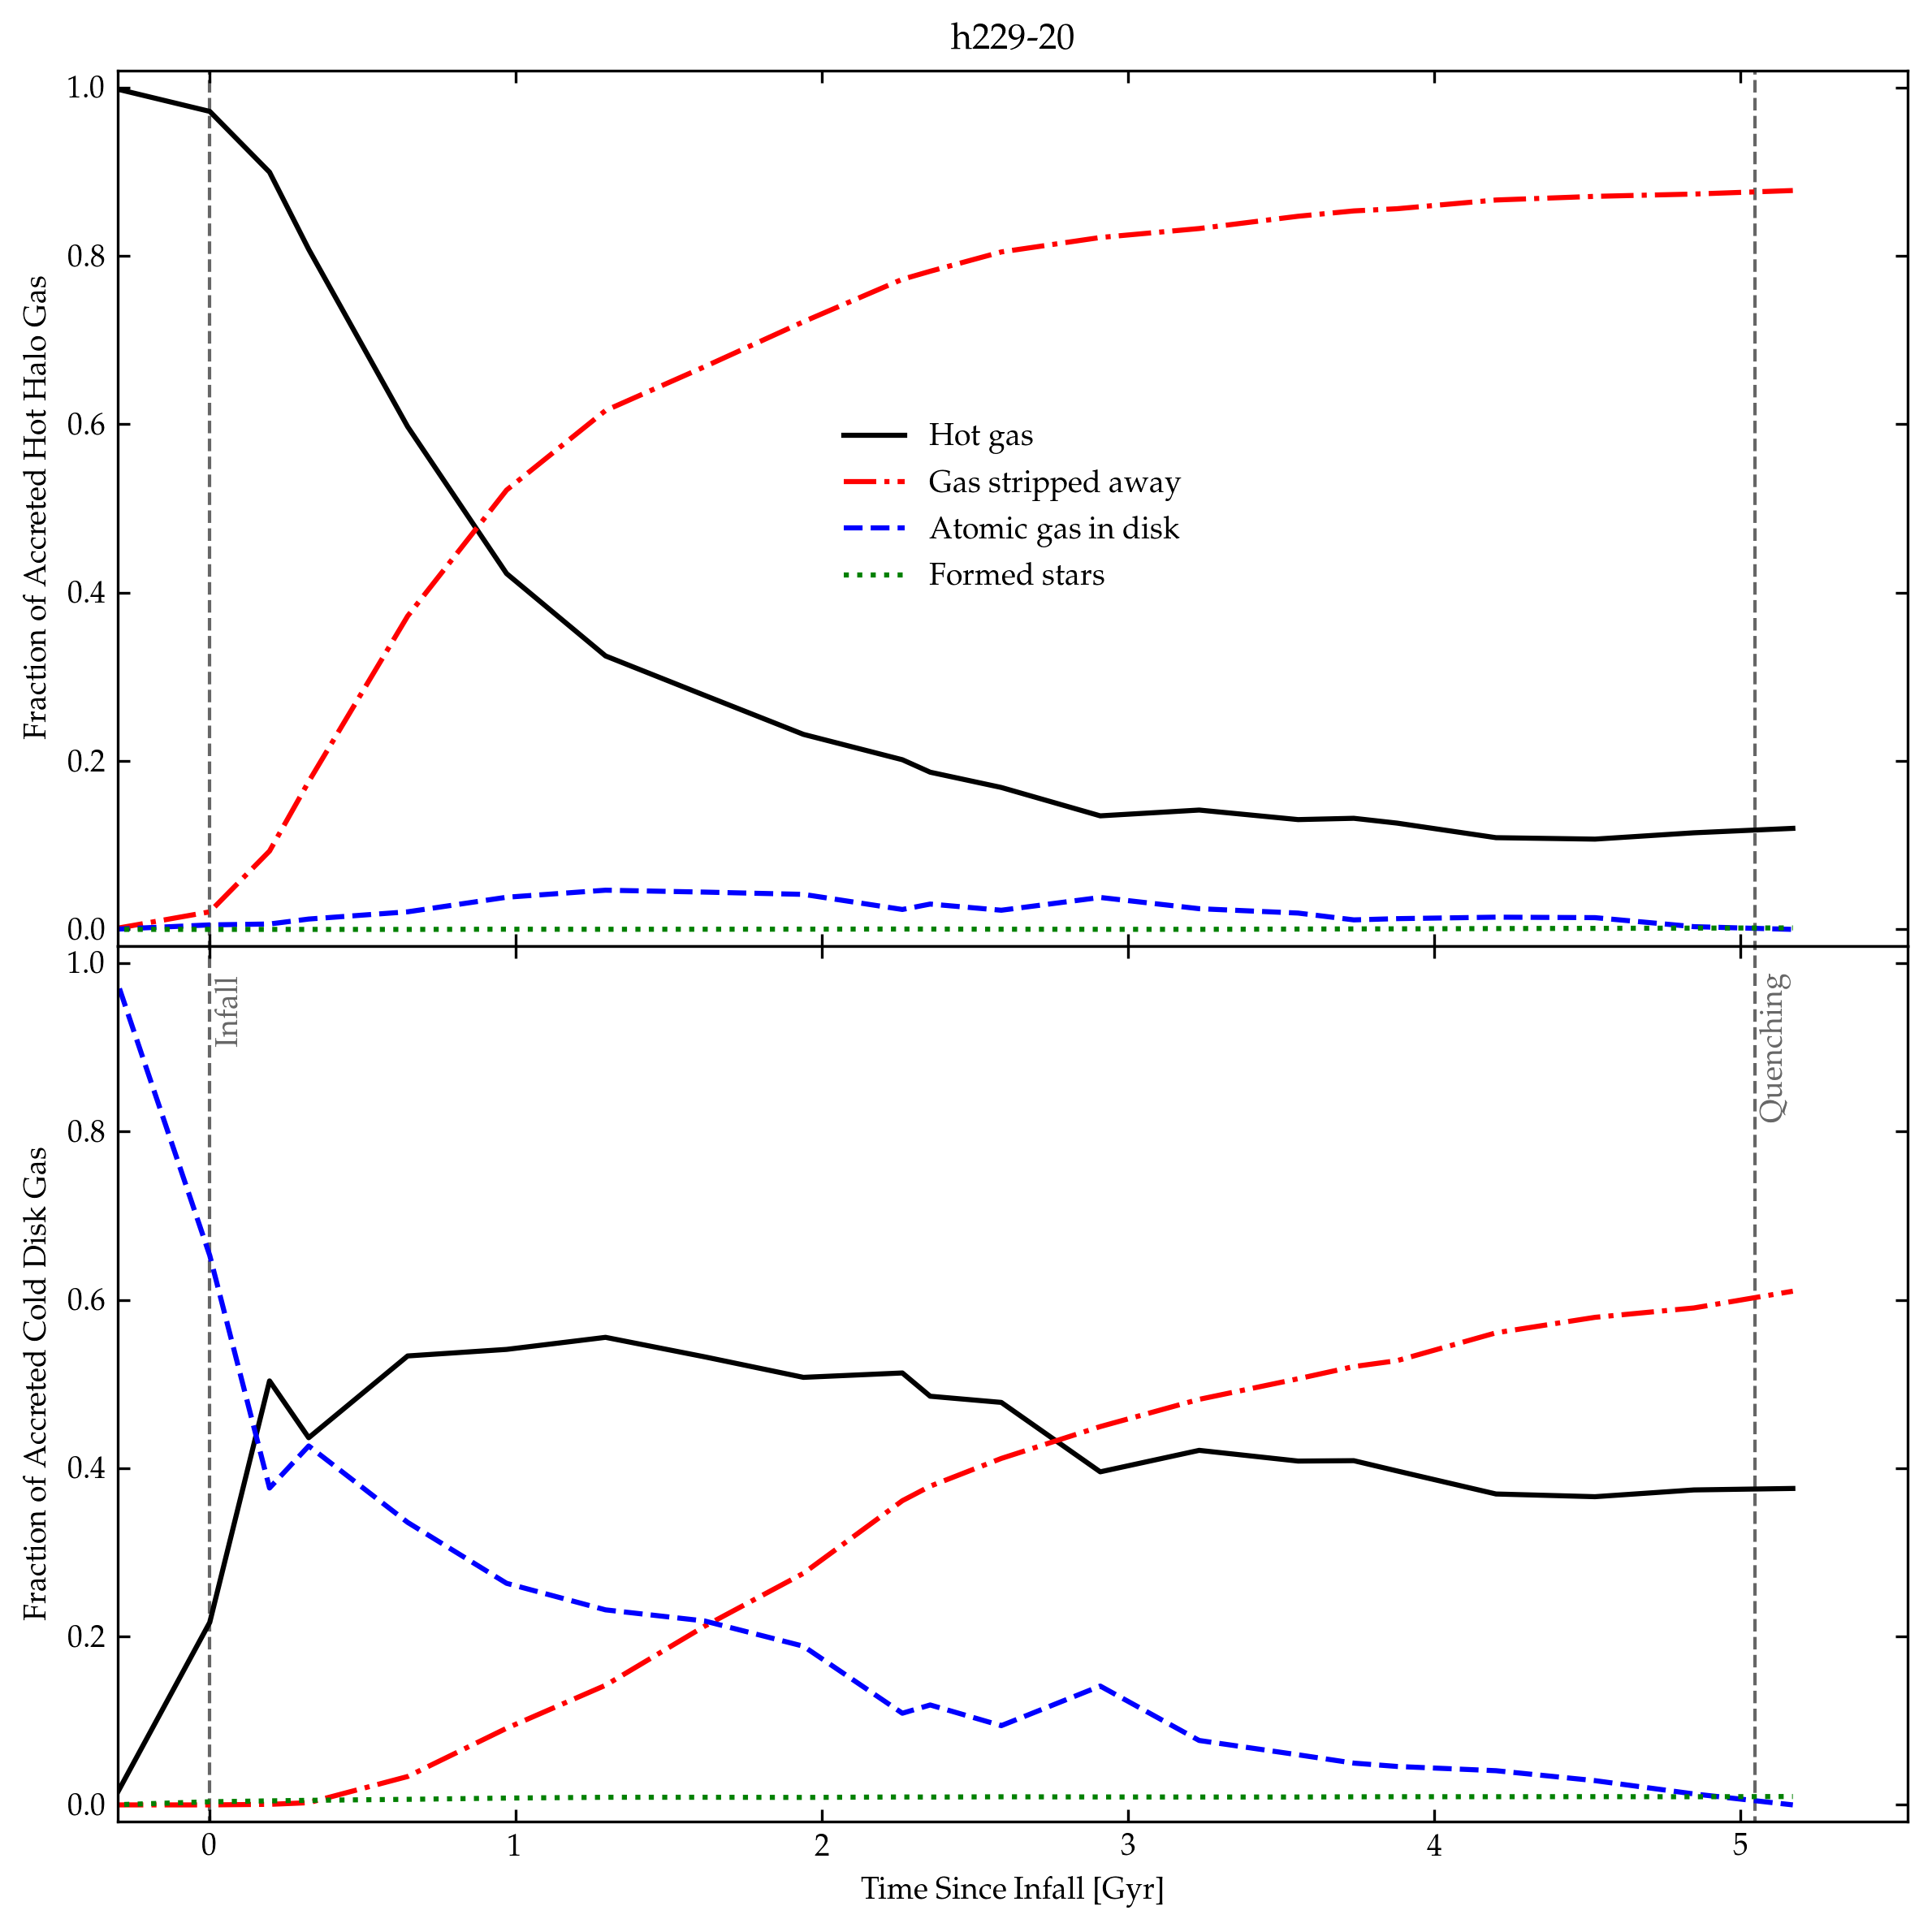

In [289]:
hgas = read_tracking_data('HotGasTracking')
cgas = read_tracking_data('ColdGasTracking')

sim, haloid = 'h229', 20
hgas = hgas[(hgas.sim==sim)&(hgas.haloid==haloid)]
cgas = cgas[(cgas.sim==sim)&(cgas.haloid==haloid)]


fig, ax = plt.subplots(2,1,figsize=(8,8),dpi=300, sharex=True)

### Top Panel: Hot Gas
timescale = np.mean(hgas.tinfall - hgas.tquench)
tinfall = np.mean(hgas.tinfall)
tquench = np.mean(hgas.tquench)

t = hgas.t - (age-tinfall)

ax[0].plot(t, hgas.frac_hot, 'k-', label='Hot gas')
ax[0].plot(t, hgas.frac_stripped, 'r-.', label='Gas stripped away')
ax[0].plot(t, hgas.frac_disk, 'b--', label='Atomic gas in disk')
ax[0].plot(t, hgas.frac_stars, 'g:', label='Formed stars')
# ax[0].plot(t, 1-hgas.frac_hot-hgas.frac_stripped-hgas.frac_disk, 'g:', label='Elsewhere')

ax[0].set_ylim(-0.02, 1.02)
ax[0].set_xlim(-0.3,timescale+0.5)
ax[0].legend(frameon=False,ncol=1)

ax[0].plot([0,0],[-0.05,1.05], 'k--', alpha=0.6, zorder=0,linewidth=1)
ax[0].plot([timescale,timescale],[-0.05,1.05],'k--', alpha=0.6, zorder=0,linewidth=1)

ax[0].set_ylabel('Fraction of Accreted Hot Halo Gas')
ax[0].set_title(f'{sim}-{haloid}')

### Bottom Panel: Cold Gas
timescale = np.mean(cgas.tinfall - cgas.tquench)
tinfall = np.mean(cgas.tinfall)
tquench = np.mean(cgas.tquench)

t = cgas.t - (age-tinfall)

ax[1].plot(t, cgas.frac_hot, 'k-', label='Hot gas')
ax[1].plot(t, cgas.frac_stripped, 'r-.', label='Gas stripped away')
ax[1].plot(t, cgas.frac_disk, 'b--', label='Atomic gas in disk')
ax[1].plot(t, cgas.frac_stars, 'g:', label='Formed stars')
#ax[1].plot(t, 1-cgas.frac_hot-cgas.frac_stripped-cgas.frac_disk, 'g:', label='Elsewhere')

ax[1].set_ylim(-.02, 1.02)
ax[1].set_xlim(-0.3,timescale+0.5)
#ax[1].legend(frameon=False,ncol=2)

ax[1].plot([0,0],[-0.05,1.05], 'k--', alpha=0.6, zorder=0,linewidth=1)
ax[1].annotate('Infall',(0.02,0.91),alpha=0.6, rotation='vertical')
ax[1].plot([timescale,timescale],[-0.05,1.05],'k--', alpha=0.6, zorder=0,linewidth=1)
ax[1].annotate(r'Quenching',(timescale+0.02,0.82),alpha=0.6, rotation='vertical')
ax[1].set_xlabel('Time Since Infall [Gyr]')
ax[1].set_ylabel('Fraction of Accreted Cold Disk Gas')

ax[0].tick_params(direction='in',which='both')
ax[0].yaxis.set_ticks_position('both')
ax[0].xaxis.set_ticks_position('both')
ax[1].tick_params(direction='in',which='both')
ax[1].yaxis.set_ticks_position('both')
ax[1].xaxis.set_ticks_position('both')


plt.tight_layout()
plt.subplots_adjust(hspace=0.)

#plt.savefig(f'{sim}-{haloid}-particletracking.png'.dpi=300)
plt.show()

In [366]:
data = read_tracking_data('HotGasTracking')
data['timescale'] = np.array(data.tinfall) - np.array(data.tquench)

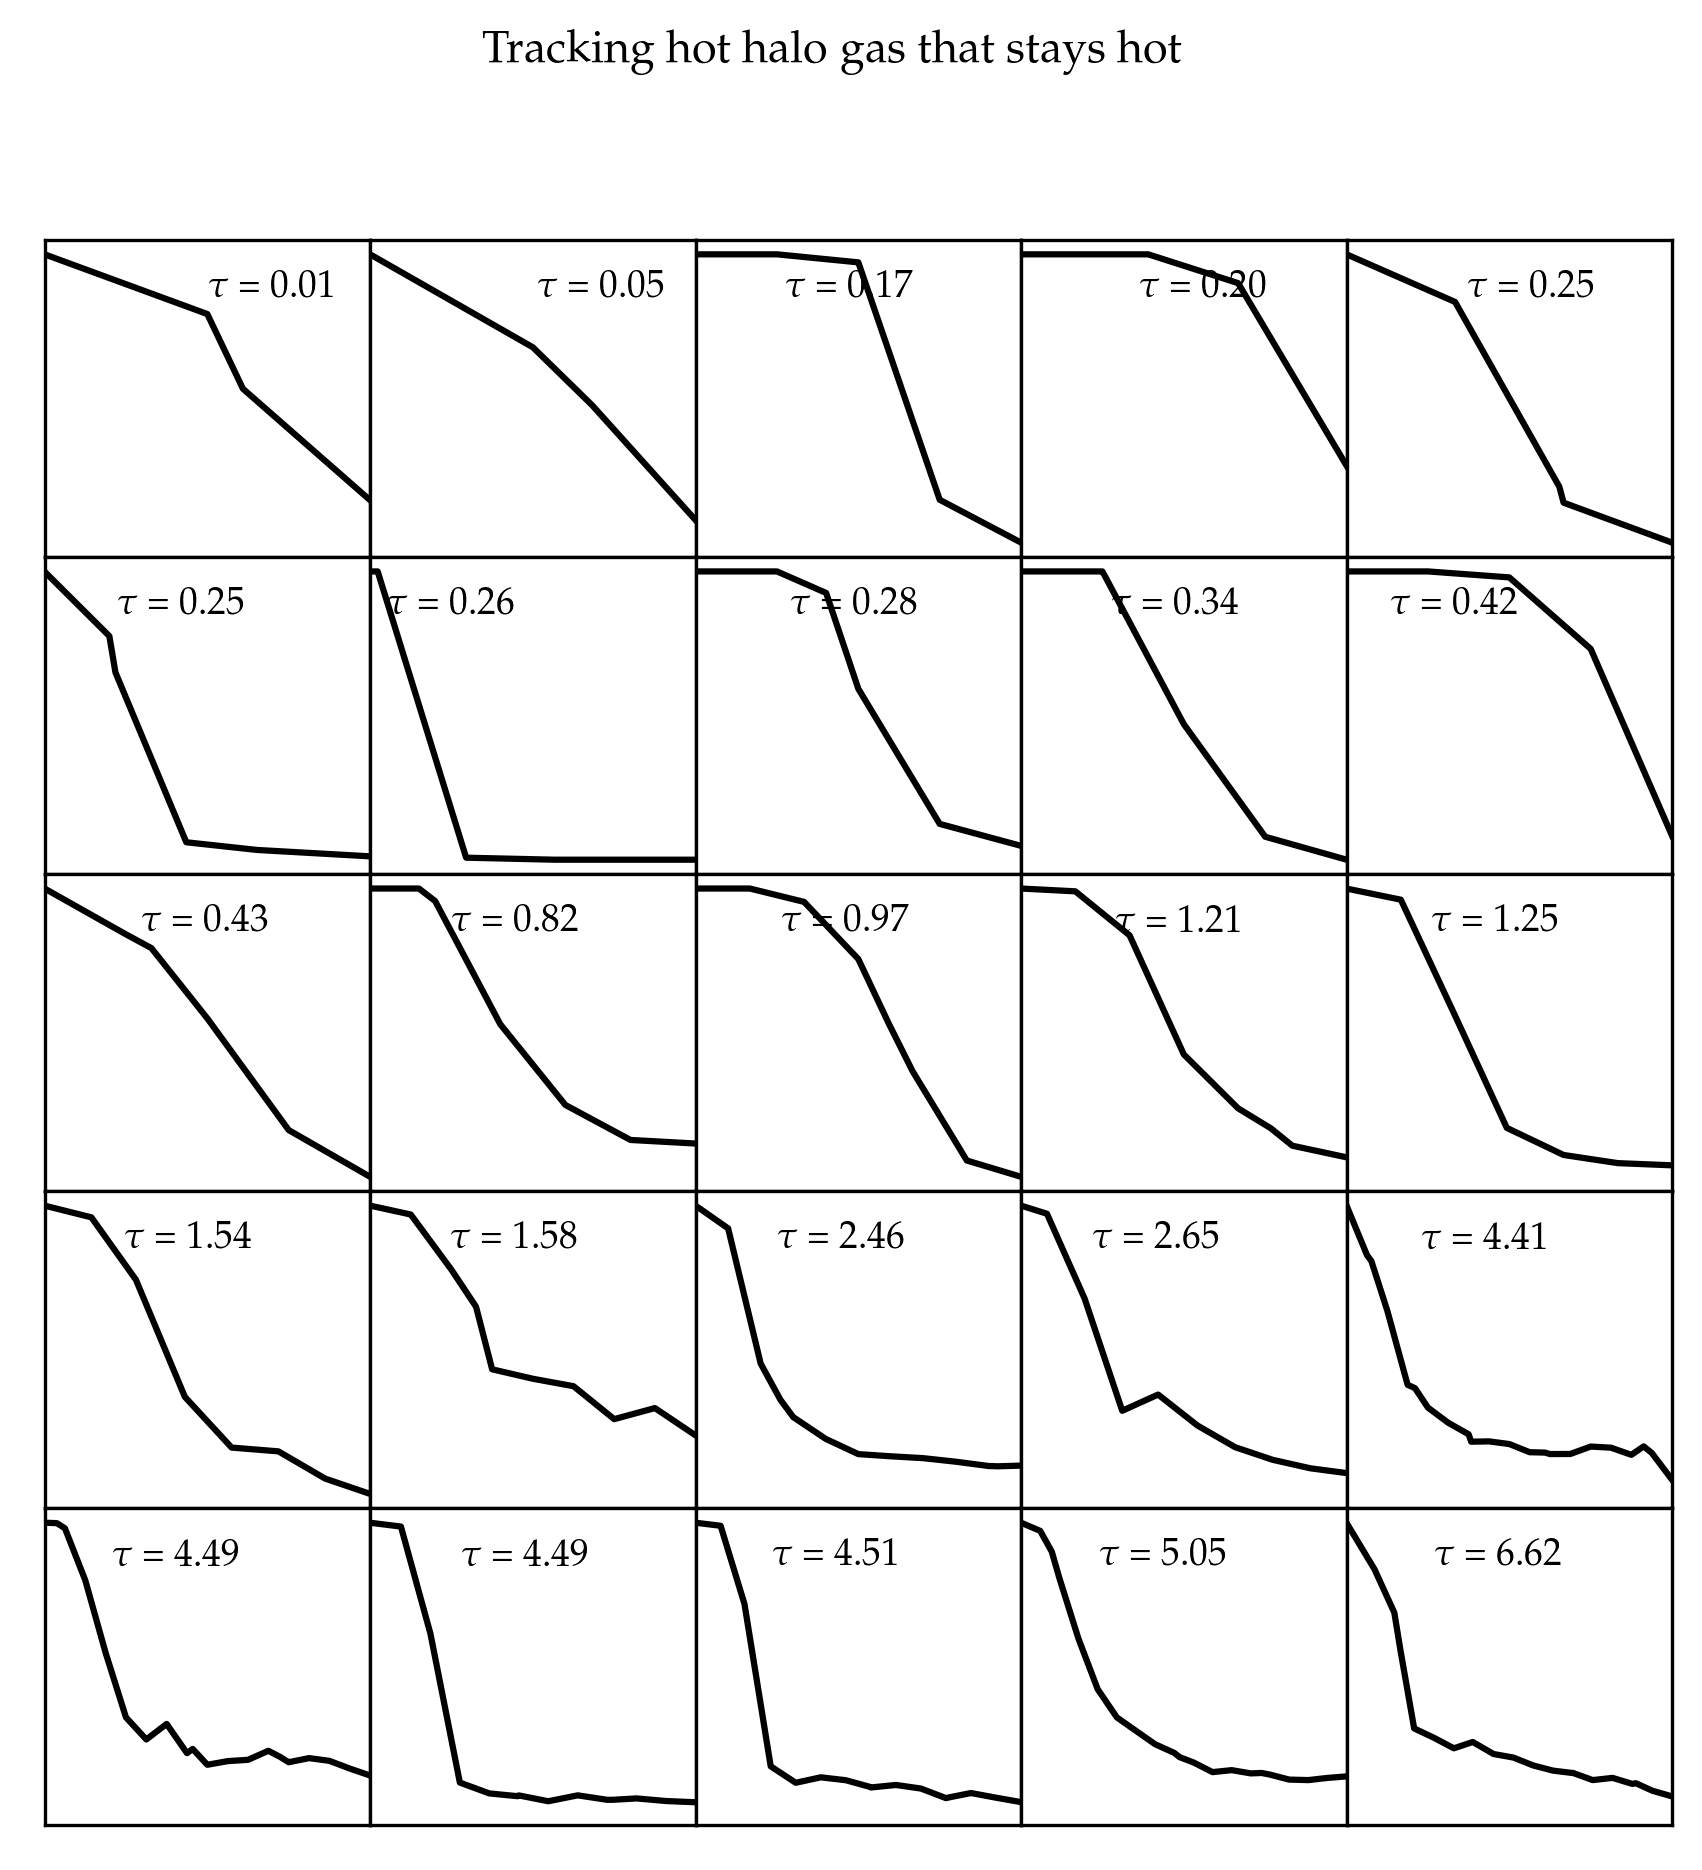

In [367]:
i,j = 0,0

sims_sorted = ['h242', 'h329', 'h229', 'h148', 'h148', 'h148', 'h148', 'h329',
       'h148', 'h329', 'h148', 'h229', 'h242', 'h229', 'h148', 'h148',
       'h229', 'h242', 'h148', 'h229', 'h242', 'h148', 'h148', 'h229',
       'h148']

haloids_sorted = [439, 137,  73,  48,  36, 329, 163,  33, 127,  31, 278,  27,  41,
        23,  13, 283,  55,  24,  45,  22,  80,  37,  68,  20,  28]

fig, ax = plt.subplots(5,5,dpi=300,figsize=(7,7))

for sim, haloid in zip(sims_sorted, haloids_sorted):
        if j > 4:
            j = 0
            i += 1
        d = data[(data.sim==sim)&(data.haloid == haloid)]
        
        tinfall = np.mean(d.tinfall)
        tquench = np.mean(d.tquench)
        t = d.t - (age - tinfall)
        ax[i,j].plot(t, d.frac_hot, 'k-')
        ax[i,j].set_ylim(-0.05,1.05)
        ax[i,j].set_xlim(np.min(t),np.max(t))
        ax[i,j].annotate(fr'$\tau$ = {(tinfall-tquench):.2f}',(0.2*(tinfall-tquench), 0.85))
        
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])

        j += 1
    
fig.suptitle('Tracking hot halo gas that stays hot')
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

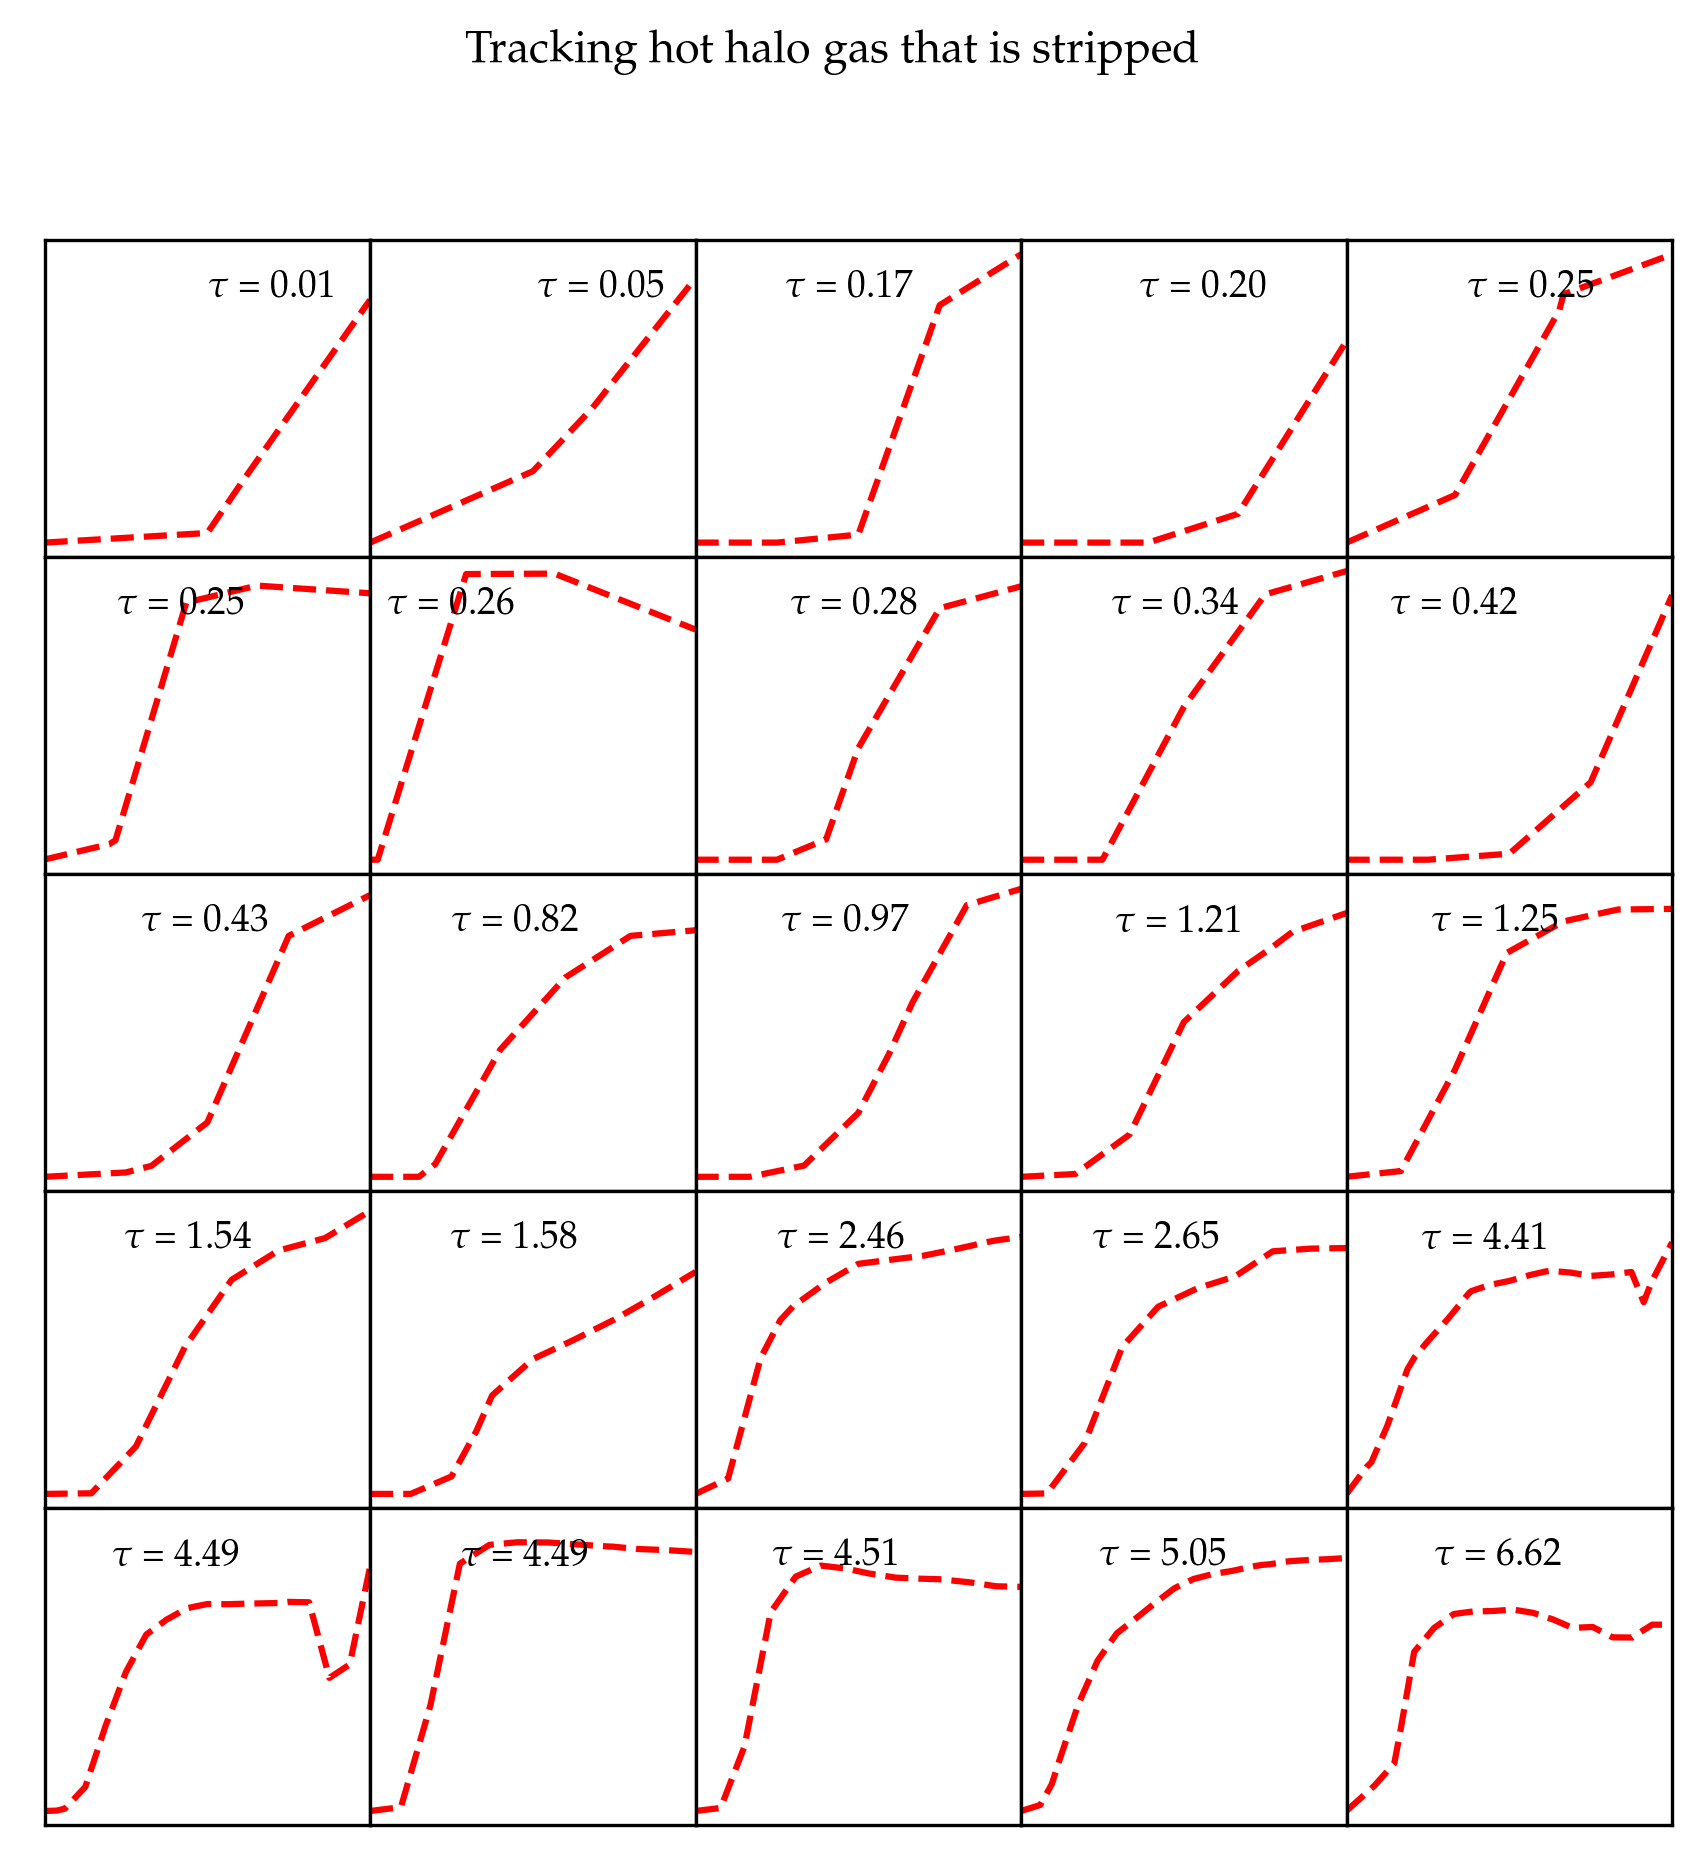

In [368]:
i,j = 0,0

sims_sorted = ['h242', 'h329', 'h229', 'h148', 'h148', 'h148', 'h148', 'h329',
       'h148', 'h329', 'h148', 'h229', 'h242', 'h229', 'h148', 'h148',
       'h229', 'h242', 'h148', 'h229', 'h242', 'h148', 'h148', 'h229',
       'h148']

haloids_sorted = [439, 137,  73,  48,  36, 329, 163,  33, 127,  31, 278,  27,  41,
        23,  13, 283,  55,  24,  45,  22,  80,  37,  68,  20,  28]

fig, ax = plt.subplots(5,5,dpi=300,figsize=(7,7))

for sim, haloid in zip(sims_sorted, haloids_sorted):
        if j > 4:
            j = 0
            i += 1
        d = data[(data.sim==sim)&(data.haloid == haloid)]
        
        tinfall = np.mean(d.tinfall)
        tquench = np.mean(d.tquench)
        t = d.t - (age - tinfall)
        ax[i,j].plot(t, d.frac_stripped, 'r--')
        ax[i,j].set_ylim(-0.05,1.05)
        ax[i,j].set_xlim(np.min(t),np.max(t))
        ax[i,j].annotate(fr'$\tau$ = {(tinfall-tquench):.2f}',(0.2*(tinfall-tquench), 0.85))
        
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])

        j += 1
    
fig.suptitle('Tracking hot halo gas that is stripped')
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

In [369]:
data = read_tracking_data('ColdGasTracking')
data['timescale'] = np.array(data.tinfall) - np.array(data.tquench)

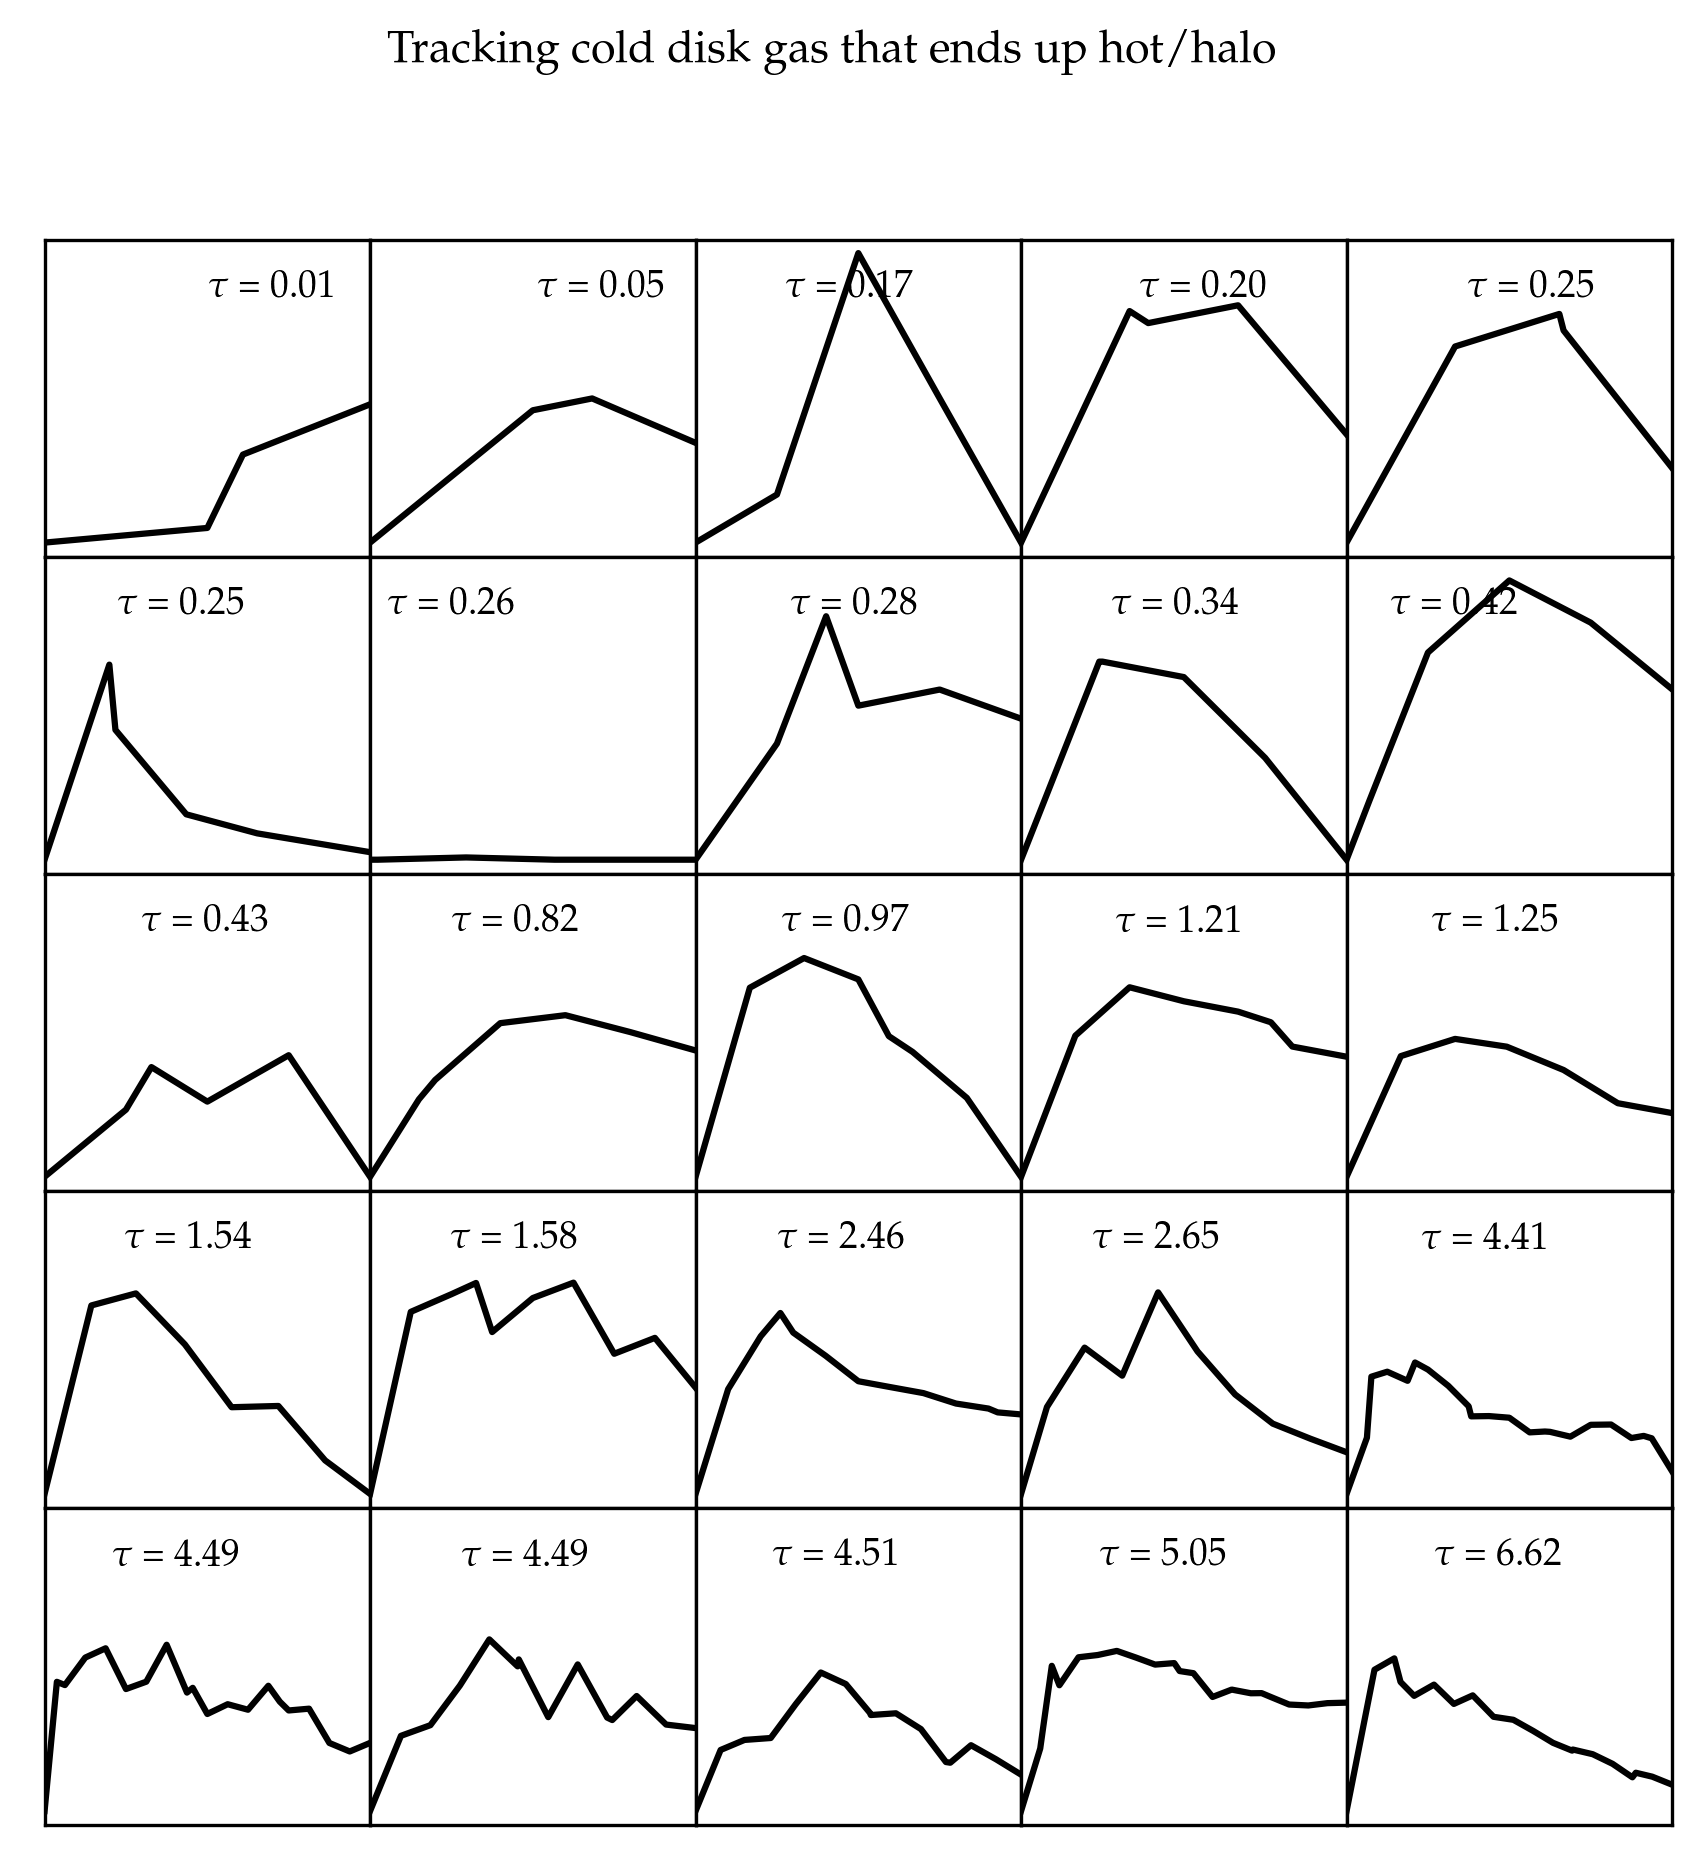

In [370]:
i,j = 0,0

sims_sorted = ['h242', 'h329', 'h229', 'h148', 'h148', 'h148', 'h148', 'h329',
       'h148', 'h329', 'h148', 'h229', 'h242', 'h229', 'h148', 'h148',
       'h229', 'h242', 'h148', 'h229', 'h242', 'h148', 'h148', 'h229',
       'h148']

haloids_sorted = [439, 137,  73,  48,  36, 329, 163,  33, 127,  31, 278,  27,  41,
        23,  13, 283,  55,  24,  45,  22,  80,  37,  68,  20,  28]

fig, ax = plt.subplots(5,5,dpi=300,figsize=(7,7))

for sim, haloid in zip(sims_sorted, haloids_sorted):
        if j > 4:
            j = 0
            i += 1
        d = data[(data.sim==sim)&(data.haloid == haloid)]
        
        tinfall = np.mean(d.tinfall)
        tquench = np.mean(d.tquench)
        t = d.t - (age - tinfall)
        ax[i,j].plot(t, d.frac_hot, 'k-')
        ax[i,j].set_ylim(-0.05,1.05)
        ax[i,j].set_xlim(np.min(t),np.max(t))
        ax[i,j].annotate(fr'$\tau$ = {(tinfall-tquench):.2f}',(0.2*(tinfall-tquench), 0.85))
        
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])

        j += 1
    
fig.suptitle('Tracking cold disk gas that ends up hot/halo')
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

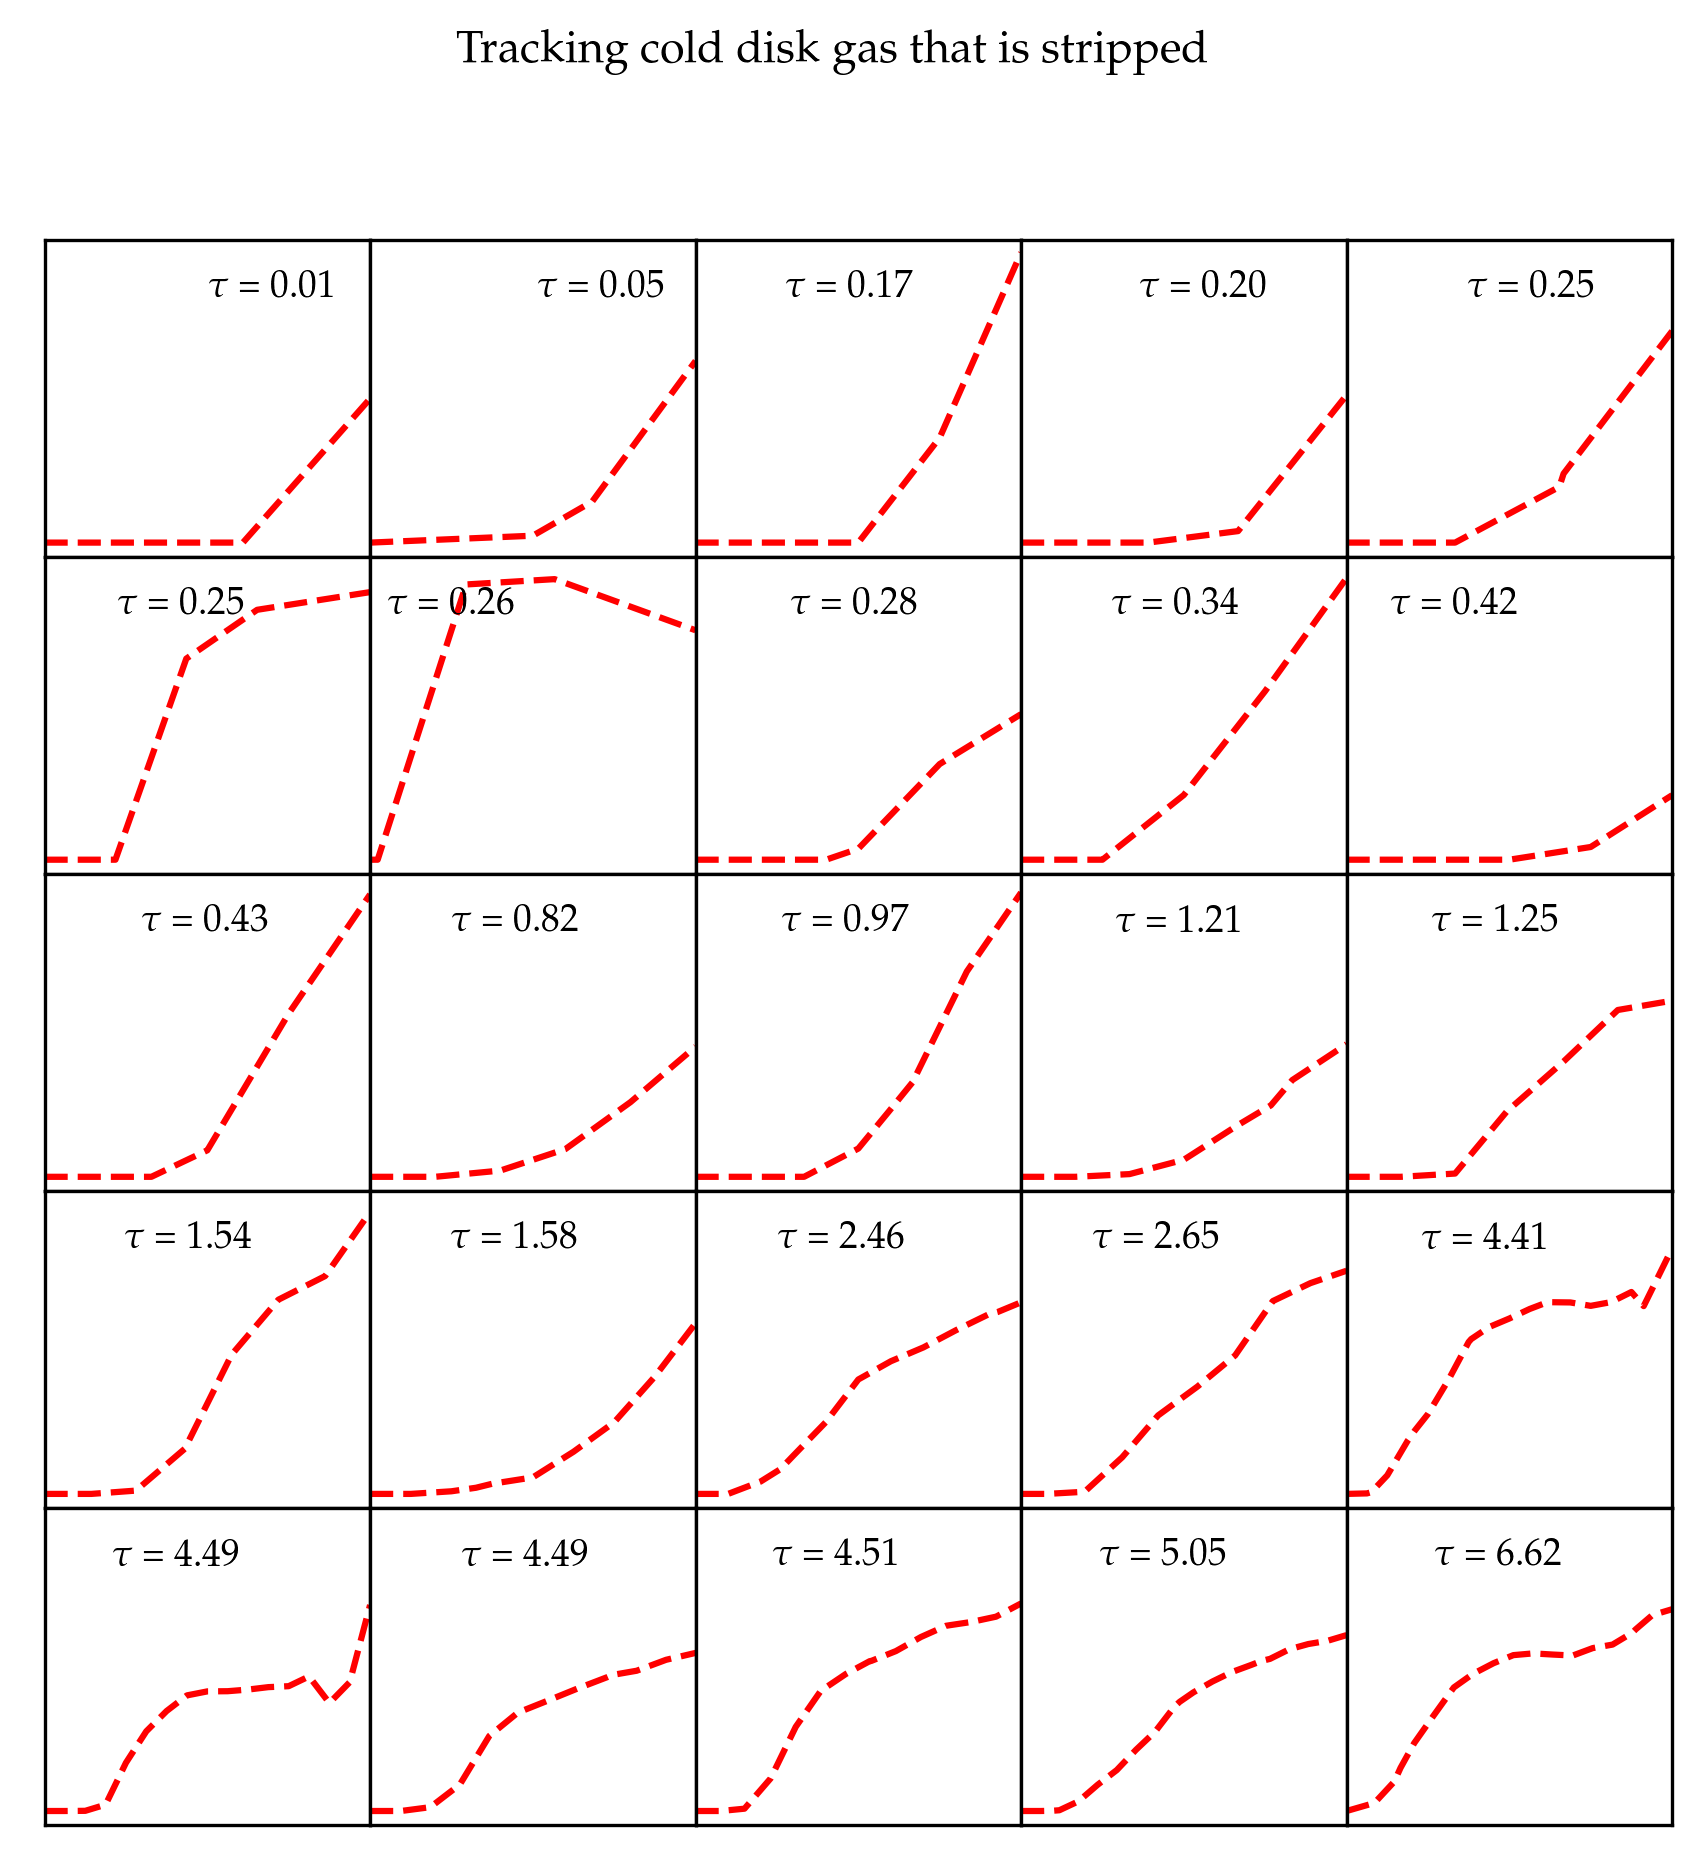

In [371]:
i,j = 0,0

sims_sorted = ['h242', 'h329', 'h229', 'h148', 'h148', 'h148', 'h148', 'h329',
       'h148', 'h329', 'h148', 'h229', 'h242', 'h229', 'h148', 'h148',
       'h229', 'h242', 'h148', 'h229', 'h242', 'h148', 'h148', 'h229',
       'h148']

haloids_sorted = [439, 137,  73,  48,  36, 329, 163,  33, 127,  31, 278,  27,  41,
        23,  13, 283,  55,  24,  45,  22,  80,  37,  68,  20,  28]

fig, ax = plt.subplots(5,5,dpi=300,figsize=(7,7))

for sim, haloid in zip(sims_sorted, haloids_sorted):
        if j > 4:
            j = 0
            i += 1
        d = data[(data.sim==sim)&(data.haloid == haloid)]
        
        tinfall = np.mean(d.tinfall)
        tquench = np.mean(d.tquench)
        t = d.t - (age - tinfall)
        ax[i,j].plot(t, d.frac_stripped, 'r--')
        ax[i,j].set_ylim(-0.05,1.05)
        ax[i,j].set_xlim(np.min(t),np.max(t))
        ax[i,j].annotate(fr'$\tau$ = {(tinfall-tquench):.2f}',(0.2*(tinfall-tquench), 0.85))
        
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])

        j += 1
    
fig.suptitle('Tracking cold disk gas that is stripped')
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

In [303]:
np.core.defchararray.add(np.array(data.sim,dtype='<U21'), np.array(data.haloid,dtype='<U21'))

array(['h14813', 'h14813', 'h14813', 'h14813', 'h14813', 'h14813',
       'h14813', 'h14828', 'h14828', 'h14828', 'h14828', 'h14828',
       'h14828', 'h14828', 'h14828', 'h14828', 'h14828', 'h14828',
       'h14828', 'h14828', 'h14828', 'h14828', 'h14828', 'h14828',
       'h14828', 'h14828', 'h14828', 'h14836', 'h14836', 'h14836',
       'h14836', 'h14836', 'h14837', 'h14837', 'h14837', 'h14837',
       'h14837', 'h14837', 'h14837', 'h14837', 'h14837', 'h14837',
       'h14837', 'h14837', 'h14837', 'h14837', 'h14845', 'h14845',
       'h14845', 'h14845', 'h14845', 'h14845', 'h14845', 'h14845',
       'h14845', 'h14845', 'h14848', 'h14848', 'h14848', 'h14848',
       'h14848', 'h14868', 'h14868', 'h14868', 'h14868', 'h14868',
       'h14868', 'h14868', 'h14868', 'h14868', 'h14868', 'h14868',
       'h14868', 'h14868', 'h14868', 'h14868', 'h14868', 'h148127',
       'h148127', 'h148127', 'h148127', 'h148127', 'h148127', 'h148163',
       'h148163', 'h148163', 'h148163', 'h148163', 'h14

In [344]:
sims, hids, timescales = [], [], []
for sim in np.unique(data.sim):
    da = data[data.sim==sim]
    for haloid in np.unique(da.haloid):
        d = da[da.haloid==haloid]
        sims.append(sim)
        hids.append(haloid)
        timescales.append(np.mean(d.timescale))
        
sims, hids, timescales = np.array(sims), np.array(hids), np.array(timescales)

In [349]:
sims[np.argsort(timescales)]

array(['h242', 'h329', 'h229', 'h148', 'h148', 'h148', 'h148', 'h329',
       'h148', 'h329', 'h148', 'h229', 'h242', 'h229', 'h148', 'h148',
       'h229', 'h242', 'h148', 'h229', 'h242', 'h148', 'h148', 'h229',
       'h148'], dtype='<U4')

In [351]:
hids[np.argsort(timescales)]

array([439, 137,  73,  48,  36, 329, 163,  33, 127,  31, 278,  27,  41,
        23,  13, 283,  55,  24,  45,  22,  80,  37,  68,  20,  28])

In [375]:
data = read_tracking_data('HotGasTracking')
data['timescales'] = data.tinfall - data.tquench

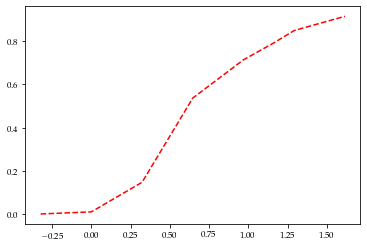

In [376]:
d = data[(data.sim=='h229')&(data.haloid==23)]
tinfall = np.mean(d.tinfall)
tquench = np.mean(d.tquench)
t = d.t - (age - tinfall)
stripped = np.array(d.frac_stripped,dtype=float)
plt.figure()
plt.plot(t, stripped, 'r--')
plt.show()

In [377]:
def f(x, a, b, c, d):
    return a / (1. + np.exp(-c * (x - d))) + b

In [378]:
a, c = np.random.exponential(size=2)
b, d = np.random.randn(2)

In [379]:
n = 100
x = np.linspace(-10., 10., n)
y_model = f(x, a, b, c, d)
y = y_model + a * .2 * np.random.randn(n)

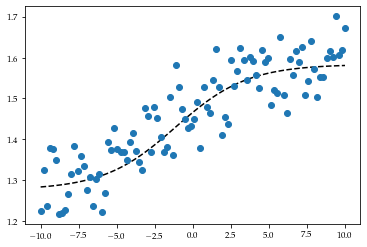

In [382]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(x, y_model, '--k')
ax.plot(x, y, 'o')
plt.show()

In [387]:
import scipy.optimize as opt
(a_, b_, c_, d_), _ = opt.curve_fit(f, t, stripped)

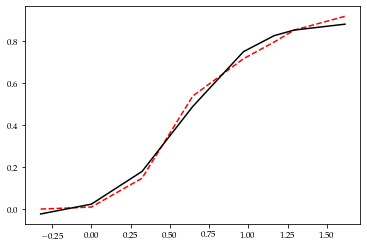

In [388]:
stripped_fit = f(t, a_, b_, c_, d_)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(t, stripped, 'r--')
ax.plot(t, stripped_fit, 'k-')
plt.show()

# Testing Some Global Stuff

In [404]:
def read_tracking_data(name):
    '''Function to read in the data file which contains hot gas particle tracking data'''
    data = []
    with open(f'/home/akinshol/Data/S20/{name}.data', 'rb') as f:
        while True:
            try:
                data.append(pickle.load(f,encoding='latin1'))
            except EOFError:
                break

    data = pd.DataFrame(data)
    return data

First time 0.9*max of Frac stripped is reached: 0.32 Gyr after infall
First time 0.9*max of Frac stripped is reached: 0.32 Gyr after infall
First time 0.9*max of Frac stripped is reached: 0.97 Gyr after infall
First time 0.9*max of Frac stripped is reached: 0.86 Gyr after infall
First time 0.9*max of Frac stripped is reached: 0.86 Gyr after infall
First time 0.9*max of Frac stripped is reached: 0.47 Gyr after infall
First time 0.9*max of Frac stripped is reached: 0.43 Gyr after infall
First time 0.9*max of Frac stripped is reached: 0.65 Gyr after infall
First time 0.9*max of Frac stripped is reached: 0.88 Gyr after infall
First time 0.9*max of Frac stripped is reached: 1.20 Gyr after infall
First time 0.9*max of Frac stripped is reached: 1.29 Gyr after infall
First time 0.9*max of Frac stripped is reached: 1.05 Gyr after infall
First time 0.9*max of Frac stripped is reached: 1.29 Gyr after infall
First time 0.9*max of Frac stripped is reached: 1.29 Gyr after infall
First time 0.9*max o

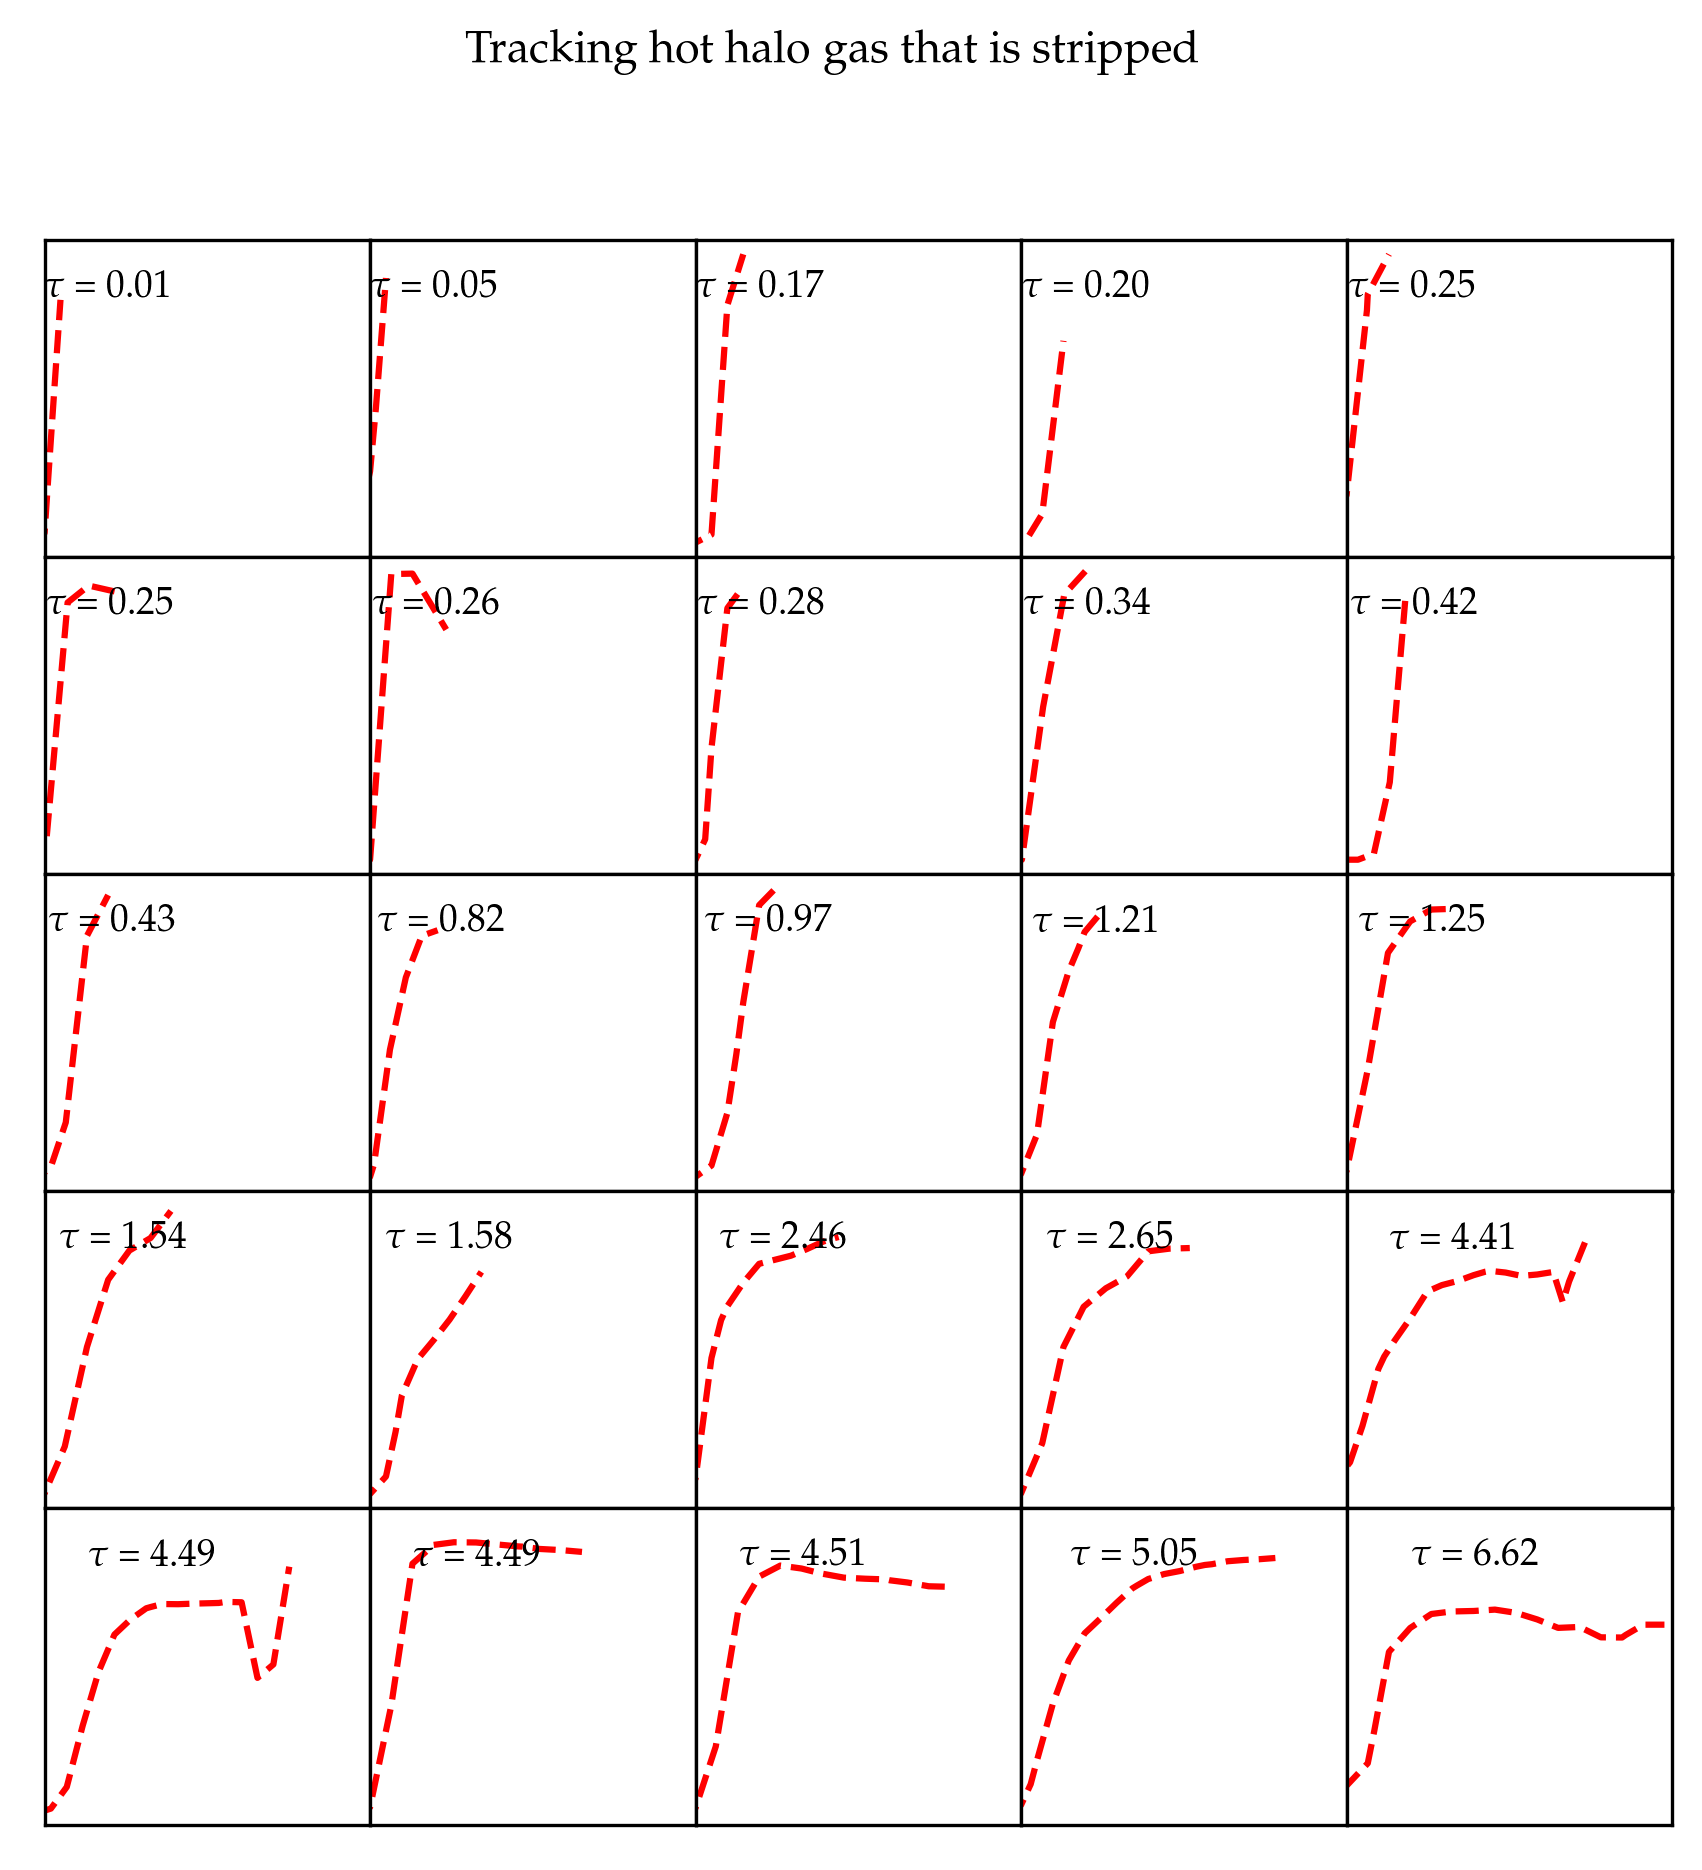

In [405]:
data = read_tracking_data('HotGasTracking')
data['timescale'] = np.array(data.tinfall) - np.array(data.tquench)

i,j = 0,0

sims_sorted = ['h242', 'h329', 'h229', 'h148', 'h148', 'h148', 'h148', 'h329',
       'h148', 'h329', 'h148', 'h229', 'h242', 'h229', 'h148', 'h148',
       'h229', 'h242', 'h148', 'h229', 'h242', 'h148', 'h148', 'h229',
       'h148']

haloids_sorted = [439, 137,  73,  48,  36, 329, 163,  33, 127,  31, 278,  27,  41,
        23,  13, 283,  55,  24,  45,  22,  80,  37,  68,  20,  28]

fig, ax = plt.subplots(5,5,dpi=300,figsize=(7,7))

for sim, haloid in zip(sims_sorted, haloids_sorted):
        if j > 4:
            j = 0
            i += 1
        d = data[(data.sim==sim)&(data.haloid == haloid)]
        
        tinfall = np.mean(d.tinfall)
        tquench = np.mean(d.tquench)
        t = np.array(d.t - (age - tinfall))
        frac_stripped = np.array(d.frac_stripped)
        ax[i,j].plot(t, frac_stripped, 'r--')
        ax[i,j].set_ylim(-0.05,1.05)
        ax[i,j].set_xlim(0,6.62)
        ax[i,j].annotate(fr'$\tau$ = {(tinfall-tquench):.2f}',(0.2*(tinfall-tquench), 0.85))
        
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
        for time, frac in zip(t,frac_stripped):
            if frac > 0.9*np.max(frac_stripped):
                print(f'First time 0.9*max of Frac stripped is reached: {time:.2f} Gyr after infall')
                break

        j += 1
    
fig.suptitle('Tracking hot halo gas that is stripped')
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

First time 0.1*max of Frac stripped is reached: 0.32 Gyr after infall
First time 0.1*max of Frac stripped is reached: 0.12 Gyr after infall
First time 0.1*max of Frac stripped is reached: 0.65 Gyr after infall
First time 0.1*max of Frac stripped is reached: 0.86 Gyr after infall
First time 0.1*max of Frac stripped is reached: 0.41 Gyr after infall
First time 0.1*max of Frac stripped is reached: 0.47 Gyr after infall
First time 0.1*max of Frac stripped is reached: 0.43 Gyr after infall
First time 0.1*max of Frac stripped is reached: 0.65 Gyr after infall
First time 0.1*max of Frac stripped is reached: 0.45 Gyr after infall
First time 0.1*max of Frac stripped is reached: 0.88 Gyr after infall
First time 0.1*max of Frac stripped is reached: 0.86 Gyr after infall
First time 0.1*max of Frac stripped is reached: 0.73 Gyr after infall
First time 0.1*max of Frac stripped is reached: 0.83 Gyr after infall
First time 0.1*max of Frac stripped is reached: 0.65 Gyr after infall
First time 0.1*max o

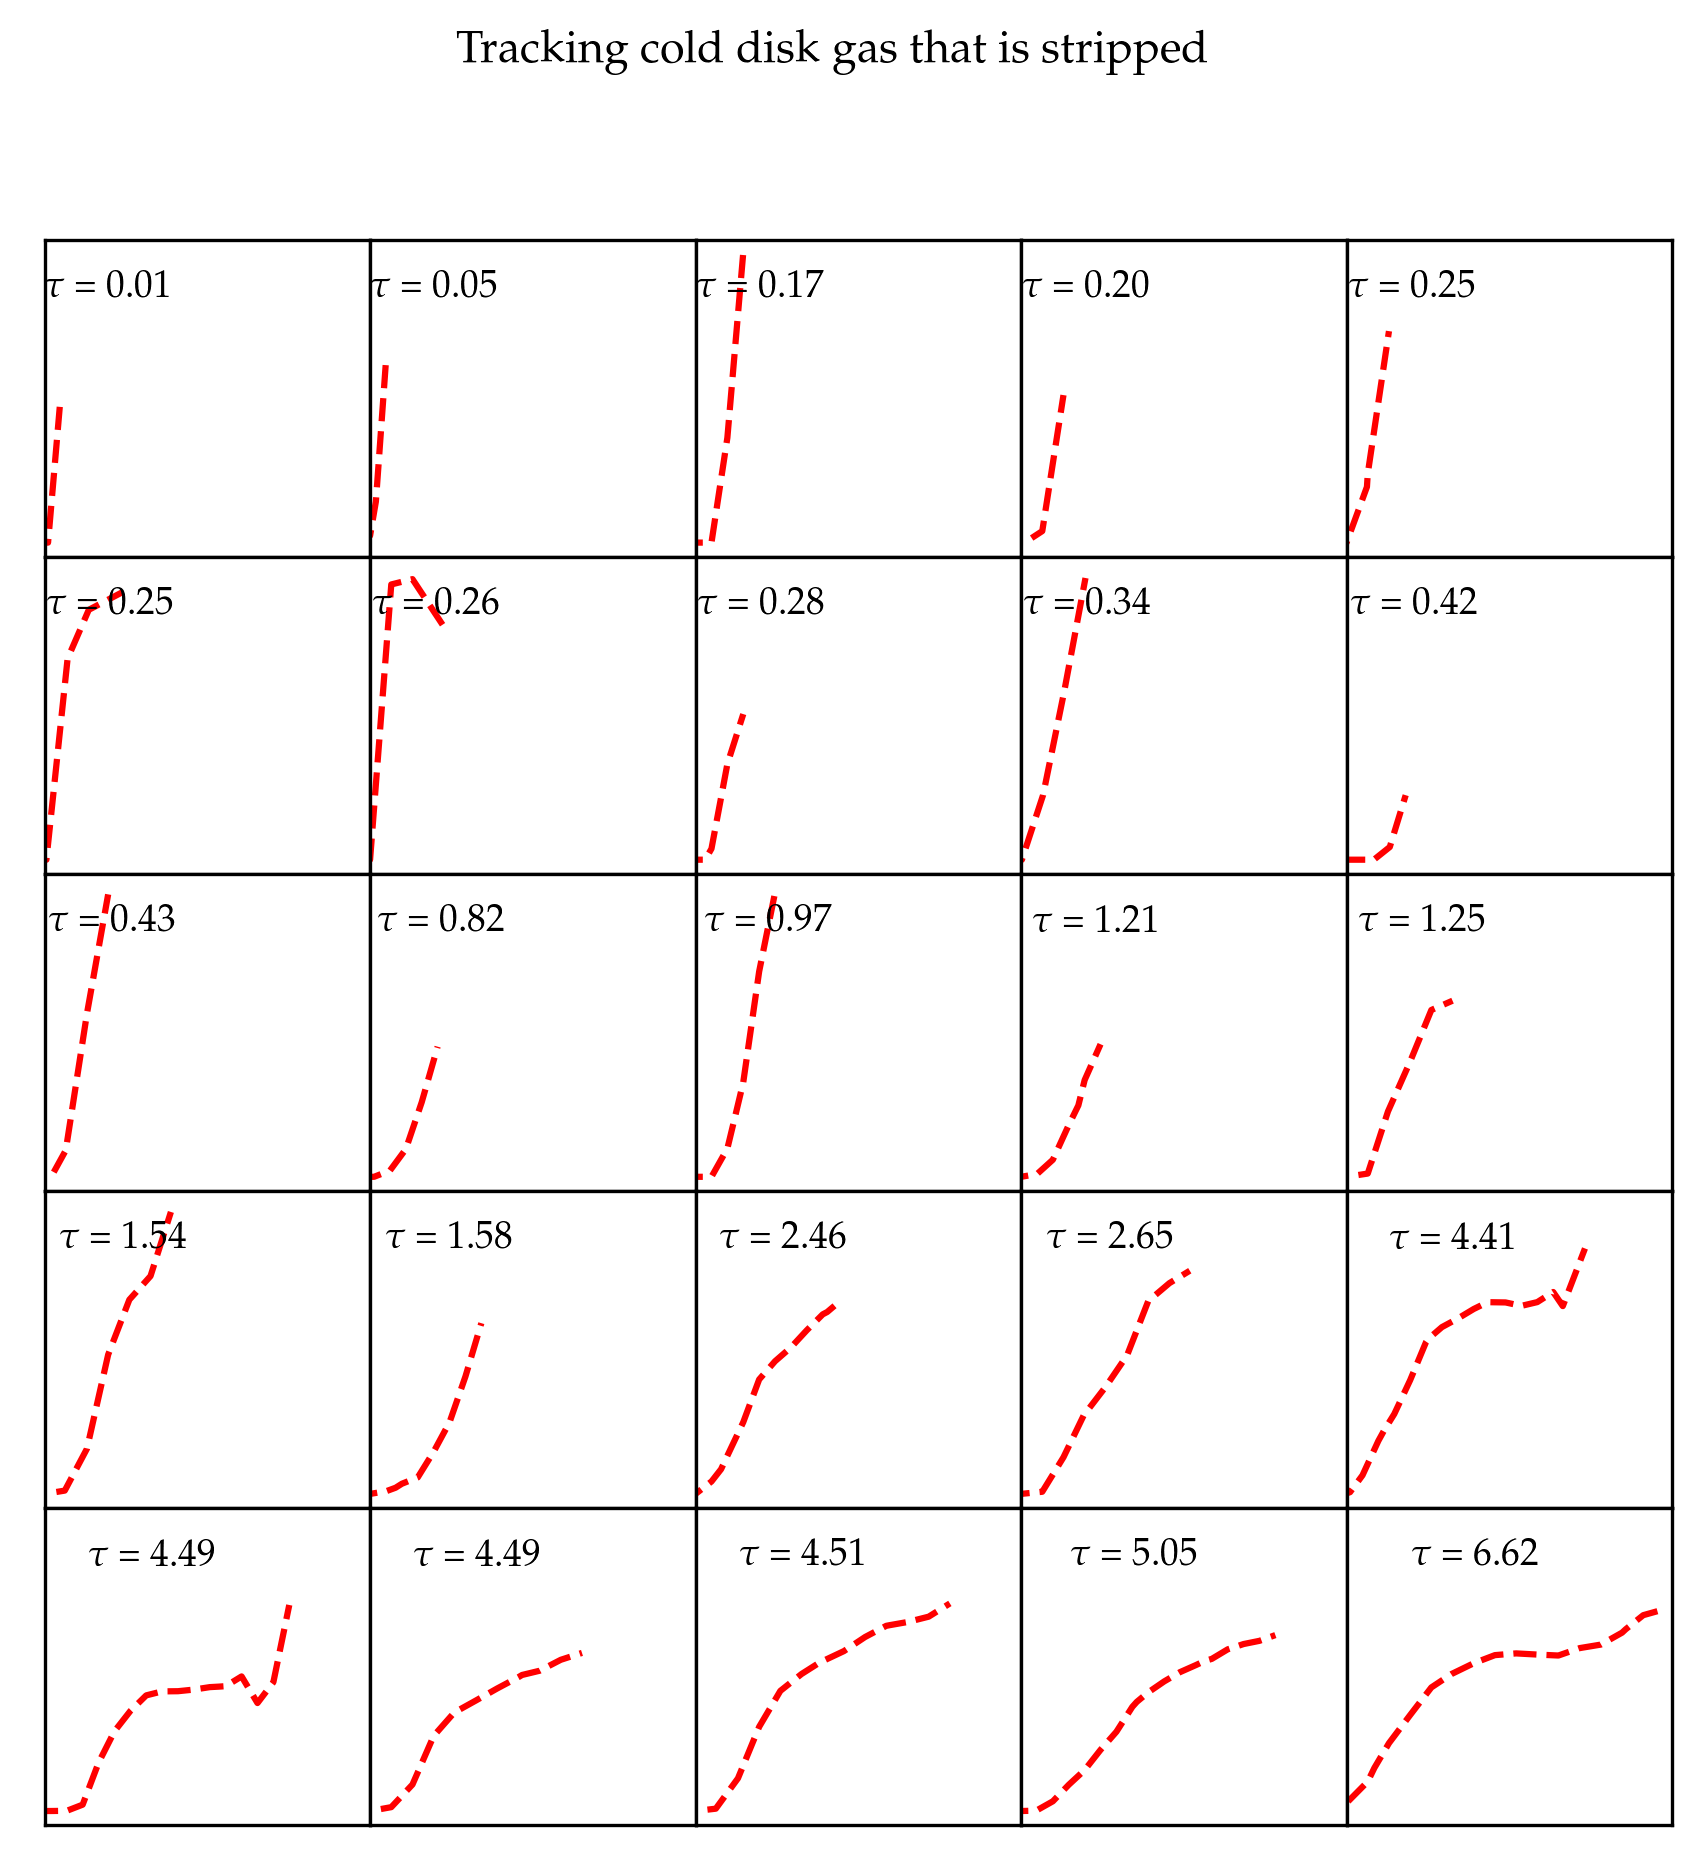

In [407]:
data = read_tracking_data('ColdGasTracking')
data['timescale'] = np.array(data.tinfall) - np.array(data.tquench)

i,j = 0,0

sims_sorted = ['h242', 'h329', 'h229', 'h148', 'h148', 'h148', 'h148', 'h329',
       'h148', 'h329', 'h148', 'h229', 'h242', 'h229', 'h148', 'h148',
       'h229', 'h242', 'h148', 'h229', 'h242', 'h148', 'h148', 'h229',
       'h148']

haloids_sorted = [439, 137,  73,  48,  36, 329, 163,  33, 127,  31, 278,  27,  41,
        23,  13, 283,  55,  24,  45,  22,  80,  37,  68,  20,  28]

fig, ax = plt.subplots(5,5,dpi=300,figsize=(7,7))

for sim, haloid in zip(sims_sorted, haloids_sorted):
        if j > 4:
            j = 0
            i += 1
        d = data[(data.sim==sim)&(data.haloid == haloid)]
        
        tinfall = np.mean(d.tinfall)
        tquench = np.mean(d.tquench)
        t = np.array(d.t - (age - tinfall))
        frac_stripped = np.array(d.frac_stripped)
        ax[i,j].plot(t, d.frac_stripped, 'r--')
        ax[i,j].set_ylim(-0.05,1.05)
        ax[i,j].set_xlim(0,6.62)
        ax[i,j].annotate(fr'$\tau$ = {(tinfall-tquench):.2f}',(0.2*(tinfall-tquench), 0.85))
        
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])

        for time, frac in zip(t,frac_stripped):
            if frac > 0.1*np.max(frac_stripped):
                print(f'First time 0.1*max of Frac stripped is reached: {time:.2f} Gyr after infall')
                break

        j += 1
    
fig.suptitle('Tracking cold disk gas that is stripped')
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

In [443]:
ColdData = read_tracking_data('ColdGasTracking')
ColdData['timescale'] = np.array(ColdData.tinfall) - np.array(ColdData.tquench)
HotData = read_tracking_data('HotGasTracking')
HotData['timescale'] = np.array(HotData.tinfall) - np.array(HotData.tquench)

sims_sorted = ['h242', 'h329', 'h229', 'h148', 'h148', 'h148', 'h148', 'h329',
       'h148', 'h329', 'h148', 'h229', 'h242', 'h229', 'h148', 'h148',
       'h229', 'h242', 'h148', 'h229', 'h242', 'h148', 'h148', 'h229',
       'h148']

haloids_sorted = [439, 137,  73,  48,  36, 329, 163,  33, 127,  31, 278,  27,  41,
        23,  13, 283,  55,  24,  45,  22,  80,  37,  68,  20,  28]

t60_hot, t60_cold, taus = [], [], []
for sim, haloid in zip(sims_sorted, haloids_sorted):
    
    d = HotData[(HotData.sim==sim)&(HotData.haloid == haloid)]
    d2 = ColdData[(ColdData.sim==sim)&(ColdData.haloid==haloid)]
    
    tinfall = np.mean(d.tinfall)
    tquench = np.mean(d.tquench)
    t = np.array(d.t - (age - tinfall))
    taus.append(tinfall-tquench)
    
    Hot_frac_stripped = np.array(d.frac_stripped)
    Cold_frac_stripped = np.array(d2.frac_stripped)
    
    complete = False
    for time, frac in zip(t,Hot_frac_stripped):
        if (frac > 0.6) and (complete==False):
            print(f'First time 60% of hot gas at infall is removed: {time:.2f} Gyr after infall')
            t60_hot.append(time)
            complete = True
    
    complete = False
    for time, frac in zip(t,Cold_frac_stripped):
        if (frac > 0.6) and (complete==False):
            print(f'First time 60% of cold gas at infall is removed: {time:.2f} Gyr after infall')
            t60_cold.append(time)
            complete = True

7.326666467273415
nan
nan
nan
First time 60% of hot gas at infall is removed: 0.86 Gyr after infall
First time 60% of cold gas at infall is removed: 1.29 Gyr after infall
1.7239215218961164
First time 60% of hot gas at infall is removed: 0.41 Gyr after infall
First time 60% of cold gas at infall is removed: 0.86 Gyr after infall
3.447843043558656
9.518605745786113
First time 60% of hot gas at infall is removed: 0.43 Gyr after infall
First time 60% of cold gas at infall is removed: 0.43 Gyr after infall
9.481568369344389
nan
First time 60% of hot gas at infall is removed: 0.88 Gyr after infall
First time 60% of cold gas at infall is removed: 1.31 Gyr after infall
3.0336978342544243
nan
First time 60% of hot gas at infall is removed: 0.86 Gyr after infall
First time 60% of cold gas at infall is removed: 1.29 Gyr after infall
6.895686086860574
nan
nan
nan
First time 60% of hot gas at infall is removed: 0.84 Gyr after infall
First time 60% of cold gas at infall is removed: 2.15 Gyr after i

ValueError: x and y must be the same size

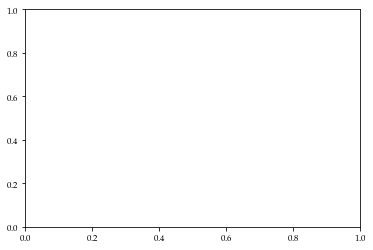

In [442]:
plt.scatter(taus,t60_hot,c='r')
plt.scatter(taus,t60_cold,c='b')
plt.show()uu

In [444]:
len(haloids_sorted)

25

First time 60% of hot halo gas at infall is removed: 0.32 Gyr after infall
First time 60% of hot halo gas at infall is removed: 0.32 Gyr after infall
First time 60% of hot halo gas at infall is removed: 0.65 Gyr after infall
First time 60% of hot halo gas at infall is removed: 0.86 Gyr after infall
First time 60% of hot halo gas at infall is removed: 0.41 Gyr after infall
First time 60% of hot halo gas at infall is removed: 0.47 Gyr after infall
First time 60% of hot halo gas at infall is removed: 0.43 Gyr after infall
First time 60% of hot halo gas at infall is removed: 0.65 Gyr after infall
First time 60% of hot halo gas at infall is removed: 0.88 Gyr after infall
First time 60% of hot halo gas at infall is removed: 1.20 Gyr after infall
First time 60% of hot halo gas at infall is removed: 0.86 Gyr after infall
First time 60% of hot halo gas at infall is removed: 0.73 Gyr after infall
First time 60% of hot halo gas at infall is removed: 0.97 Gyr after infall
First time 60% of hot hal

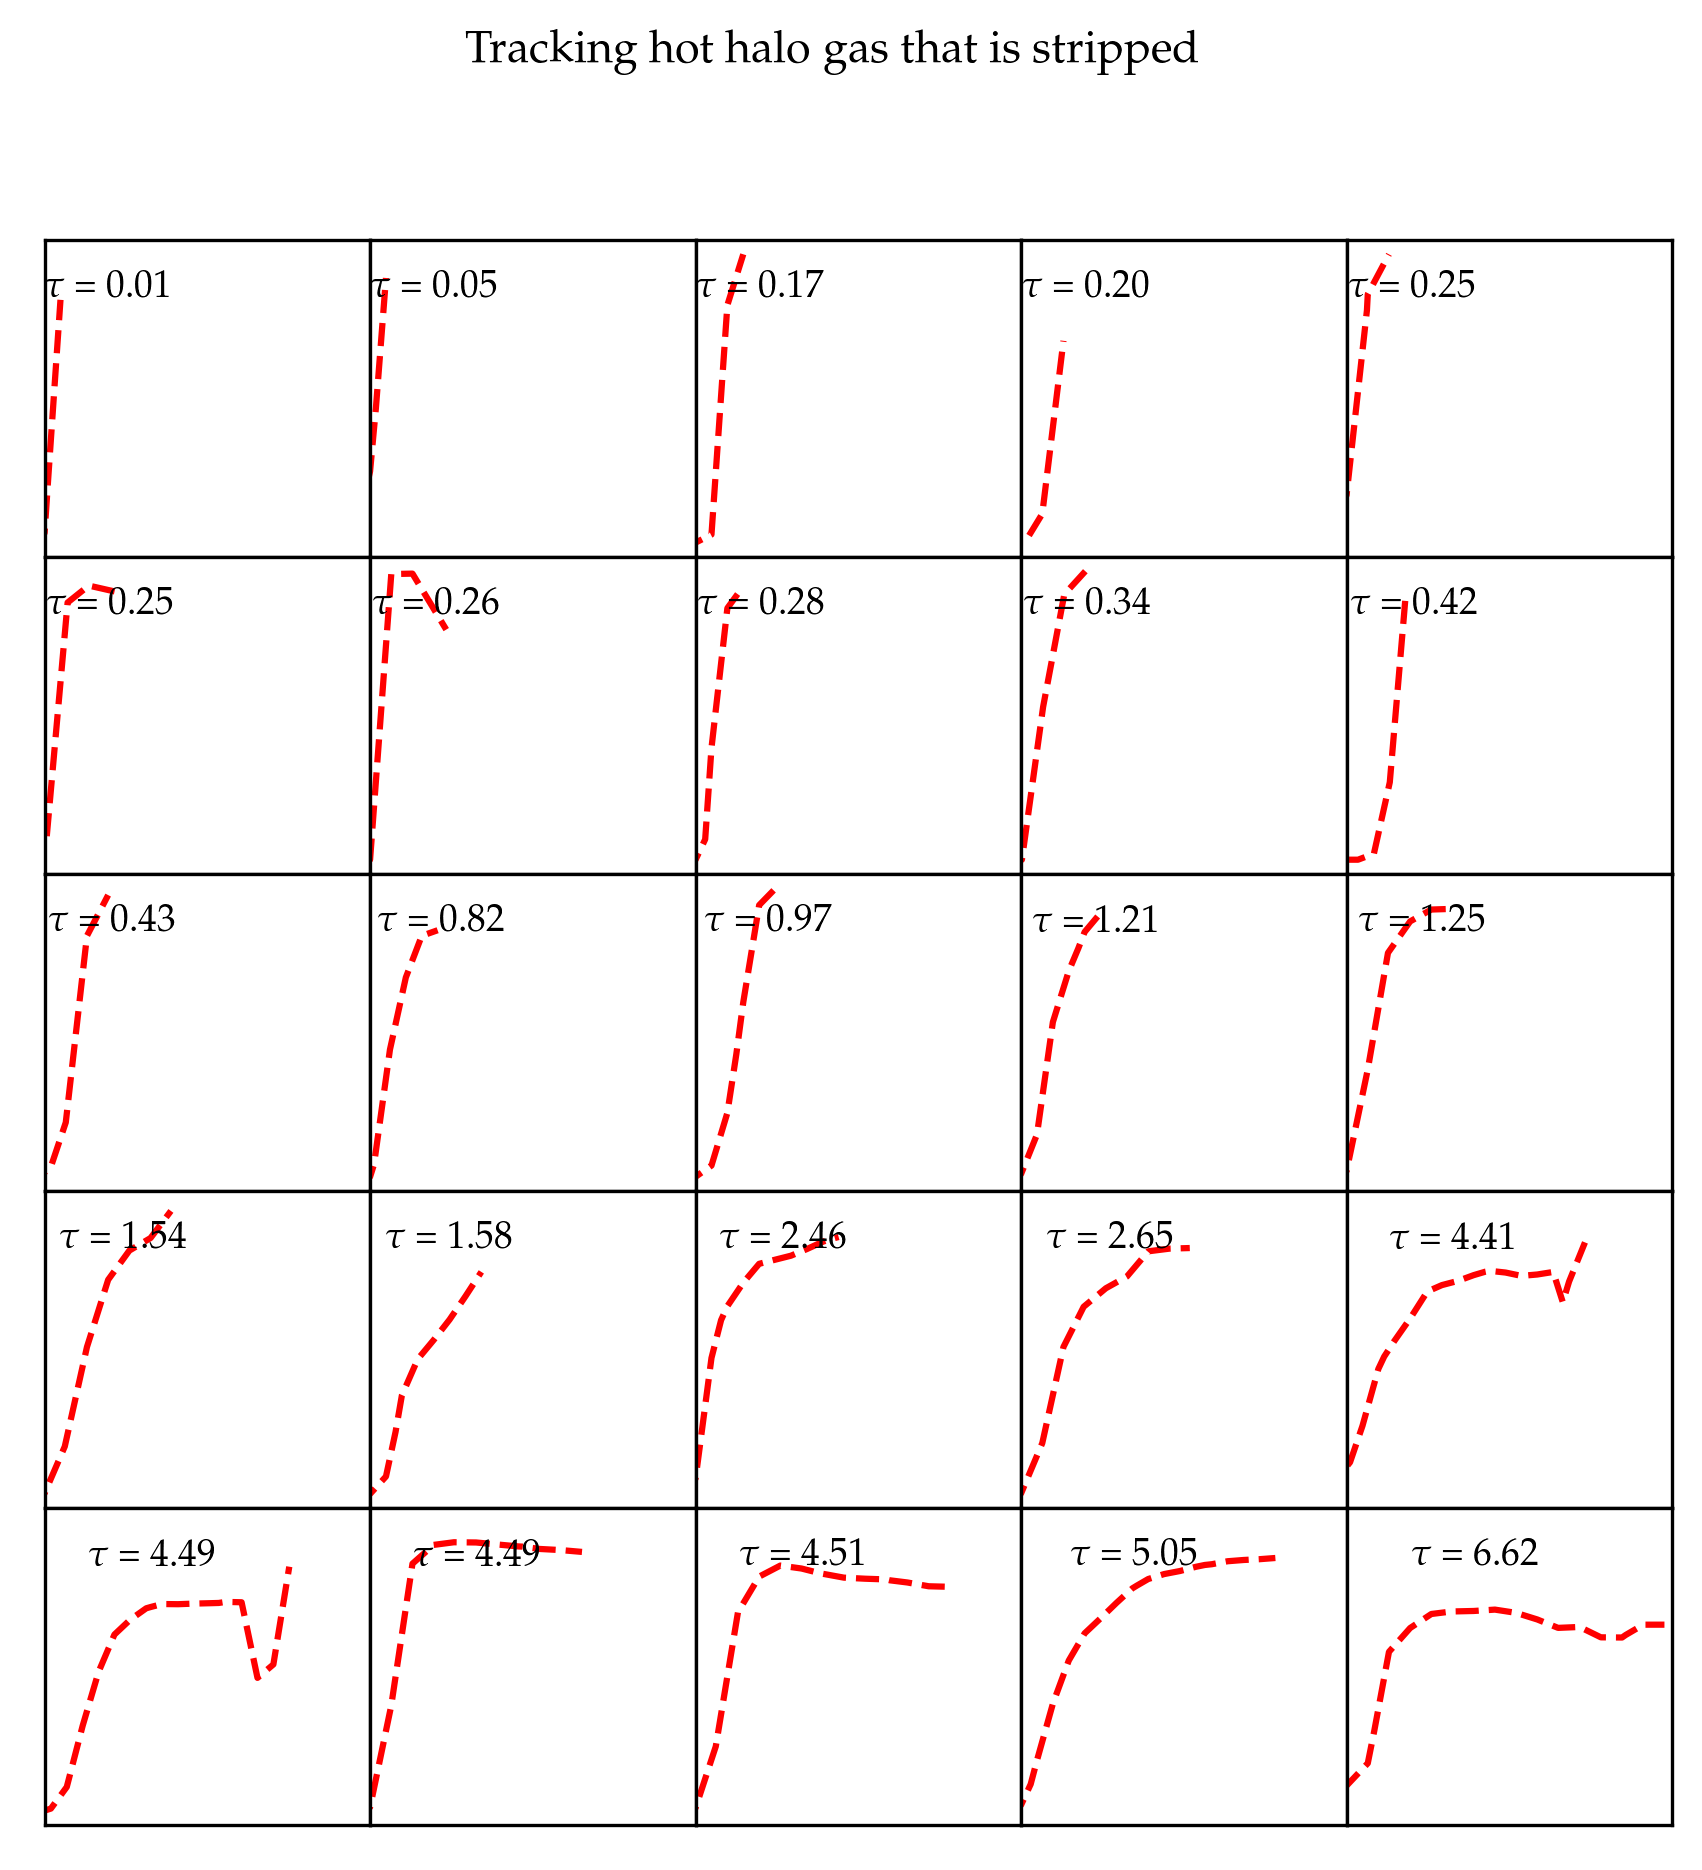

First time 60% of cold disk gas at infall is removed: 0.32 Gyr after infall
First time 60% of cold disk gas at infall is removed: 0.97 Gyr after infall
First time 60% of cold disk gas at infall is removed: 0.86 Gyr after infall
First time 60% of cold disk gas at infall is removed: 0.47 Gyr after infall
First time 60% of cold disk gas at infall is removed: 0.43 Gyr after infall
First time 60% of cold disk gas at infall is removed: 1.31 Gyr after infall
First time 60% of cold disk gas at infall is removed: 1.29 Gyr after infall
First time 60% of cold disk gas at infall is removed: 1.29 Gyr after infall
First time 60% of cold disk gas at infall is removed: 2.15 Gyr after infall
First time 60% of cold disk gas at infall is removed: 1.72 Gyr after infall
First time 60% of cold disk gas at infall is removed: 2.59 Gyr after infall
First time 60% of cold disk gas at infall is removed: 2.59 Gyr after infall
First time 60% of cold disk gas at infall is removed: 2.26 Gyr after infall
First time 6

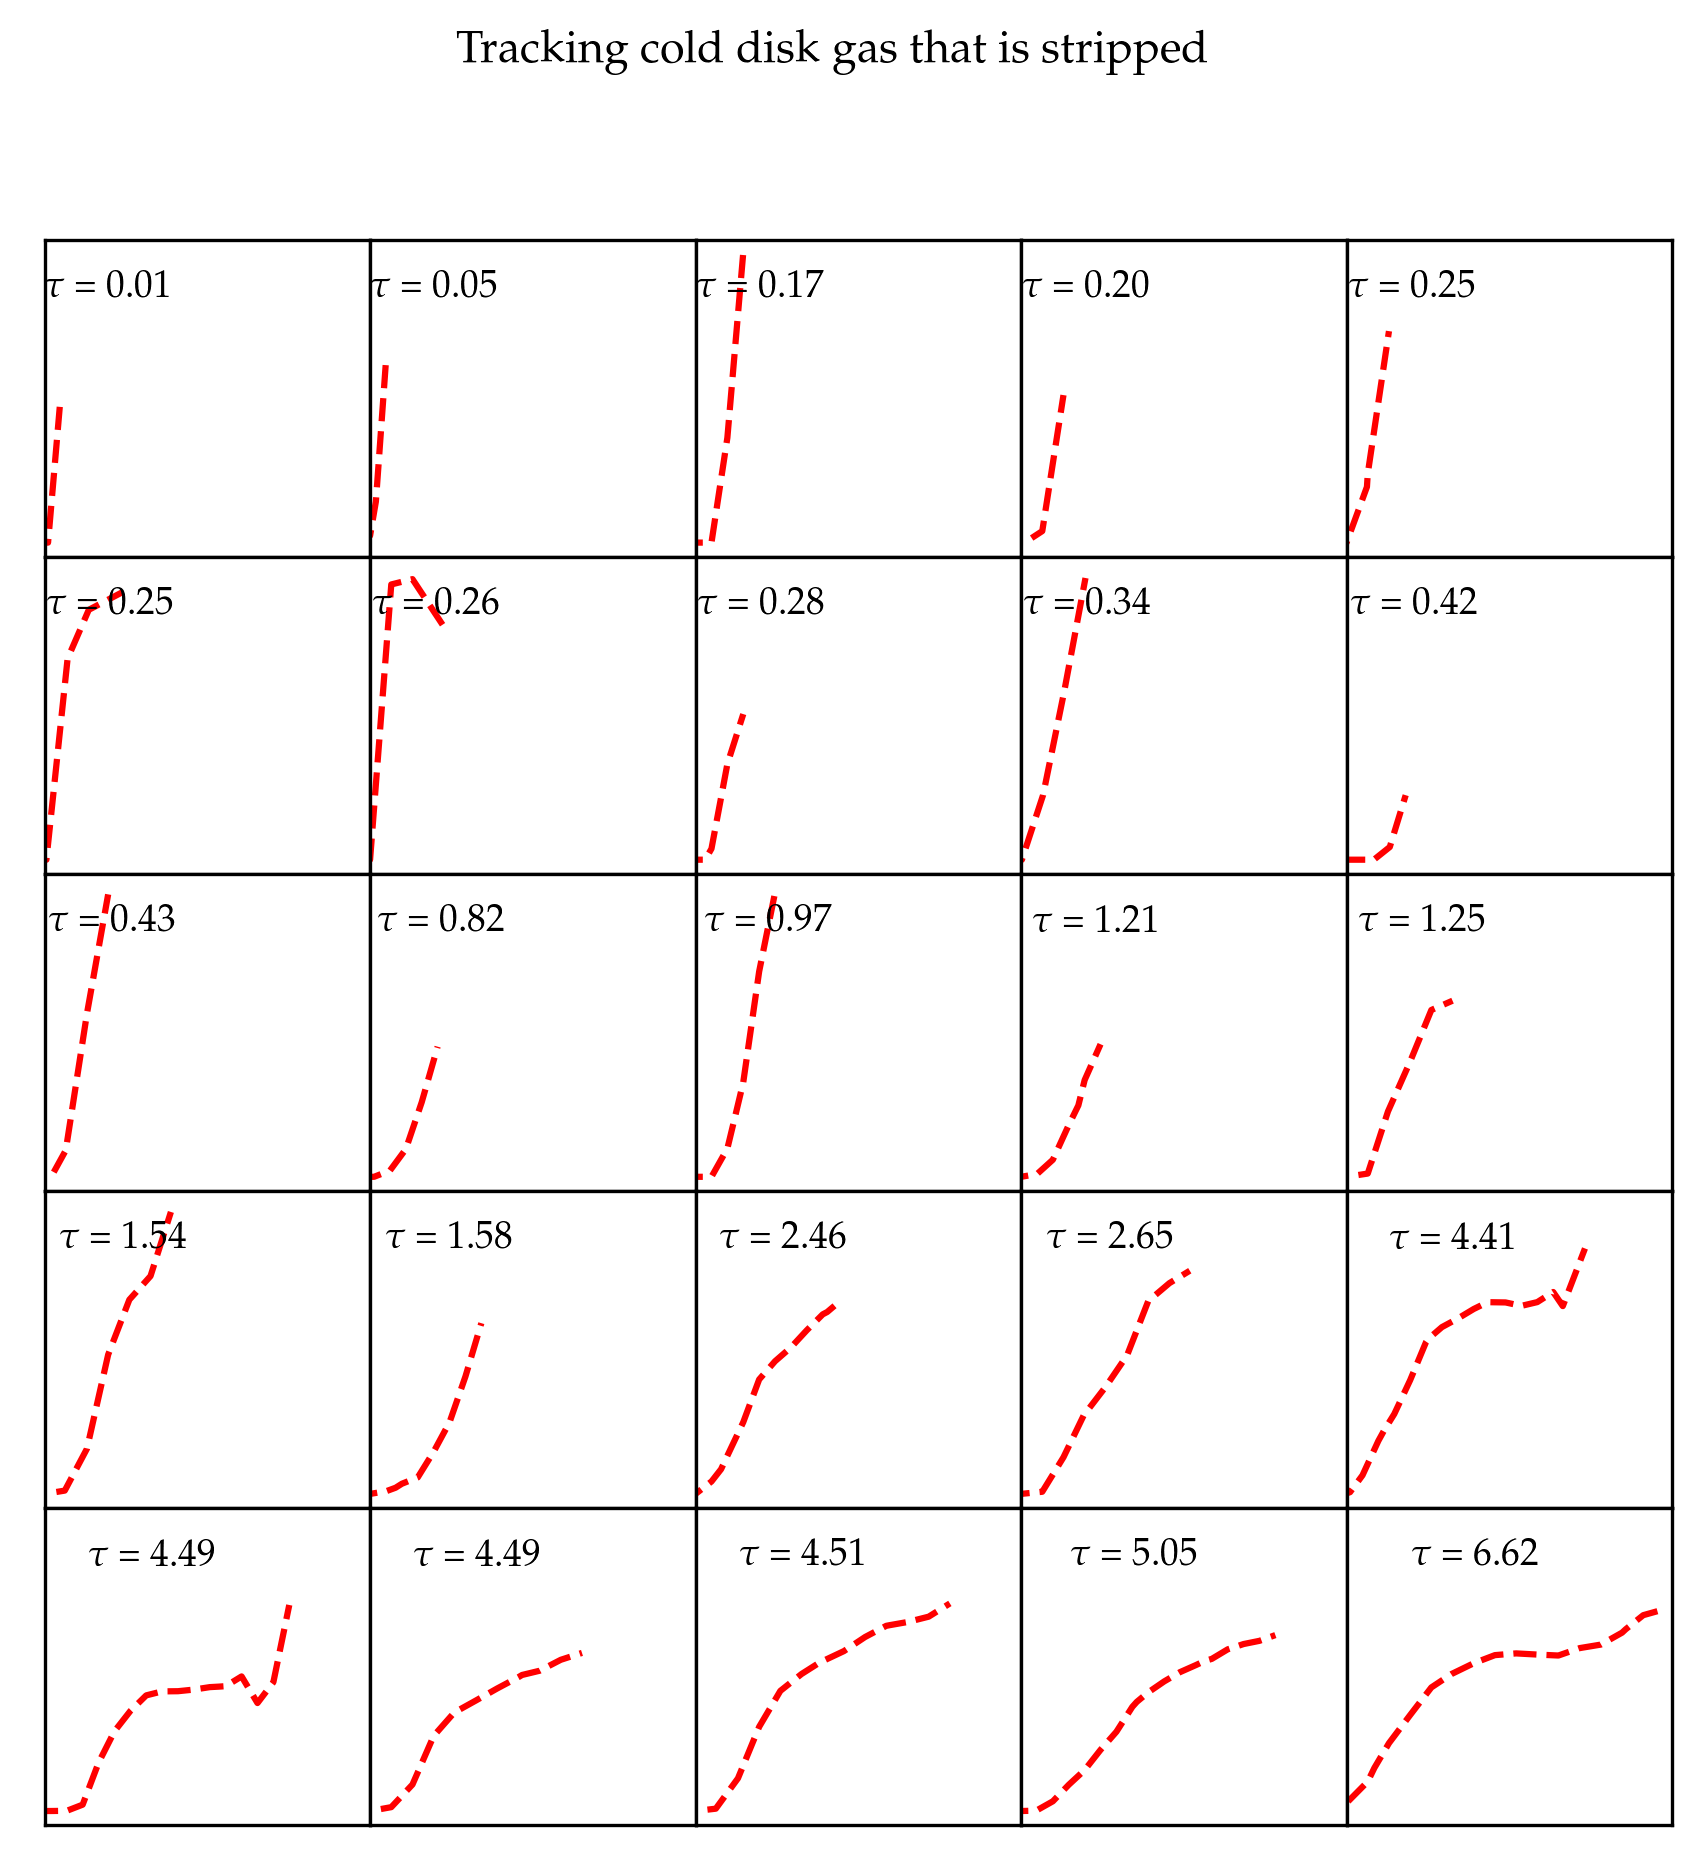

In [460]:
sims_sorted = ['h242', 'h329', 'h229', 'h148', 'h148', 'h148', 'h148', 'h329',
       'h148', 'h329', 'h148', 'h229', 'h242', 'h229', 'h148', 'h148',
       'h229', 'h242', 'h148', 'h229', 'h242', 'h148', 'h148', 'h229',
       'h148']

haloids_sorted = [439, 137,  73,  48,  36, 329, 163,  33, 127,  31, 278,  27,  41,
        23,  13, 283,  55,  24,  45,  22,  80,  37,  68,  20,  28]

i,j = 0,0
fig, ax = plt.subplots(5,5,dpi=300,figsize=(7,7))
data = read_tracking_data('HotGasTracking-March6')
tau_hot, t60_hot = np.array([]), np.array([])

for sim, haloid in zip(sims_sorted, haloids_sorted):
        if j > 4:
            j = 0
            i += 1
        d = data[(data.sim==sim)&(data.haloid == haloid)]
        
        tinfall = np.mean(d.tinfall)
        tquench = np.mean(d.tquench)
        t = np.array(d.t - (age - tinfall))
        
        frac_stripped = np.array(d.frac_stripped)
        ax[i,j].plot(t, frac_stripped, 'r--')
        ax[i,j].set_ylim(-0.05,1.05)
        ax[i,j].set_xlim(0,6.62)
        ax[i,j].annotate(fr'$\tau$ = {(tinfall-tquench):.2f}',(0.2*(tinfall-tquench), 0.85))
        
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
        for time, frac in zip(t,frac_stripped):
            if frac > 0.6:
                print(f'First time 60% of hot halo gas at infall is removed: {time:.2f} Gyr after infall')
                t60_hot = np.append(t60_hot,time)
                tau_hot = np.append(tau_hot,tinfall-tquench)
                break

        j += 1
    
fig.suptitle('Tracking hot halo gas that is stripped')
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()


i,j = 0,0
fig, ax = plt.subplots(5,5,dpi=300,figsize=(7,7))
data = read_tracking_data('ColdGasTracking-March6')
tau_cold, t60_cold = np.array([]), np.array([])

for sim, haloid in zip(sims_sorted, haloids_sorted):
        if j > 4:
            j = 0
            i += 1
        d = data[(data.sim==sim)&(data.haloid == haloid)]
        
        tinfall = np.mean(d.tinfall)
        tquench = np.mean(d.tquench)
        t = np.array(d.t - (age - tinfall))
        
        frac_stripped = np.array(d.frac_stripped)
        ax[i,j].plot(t, frac_stripped, 'r--')
        ax[i,j].set_ylim(-0.05,1.05)
        ax[i,j].set_xlim(0,6.62)
        ax[i,j].annotate(fr'$\tau$ = {(tinfall-tquench):.2f}',(0.2*(tinfall-tquench), 0.85))
        
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
        for time, frac in zip(t,frac_stripped):
            if frac > 0.6:
                print(f'First time 60% of cold disk gas at infall is removed: {time:.2f} Gyr after infall')
                t60_cold = np.append(t60_cold,time)
                tau_cold = np.append(tau_cold,tinfall-tquench)
                break
        
            
        j += 1
    
fig.suptitle('Tracking cold disk gas that is stripped')
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

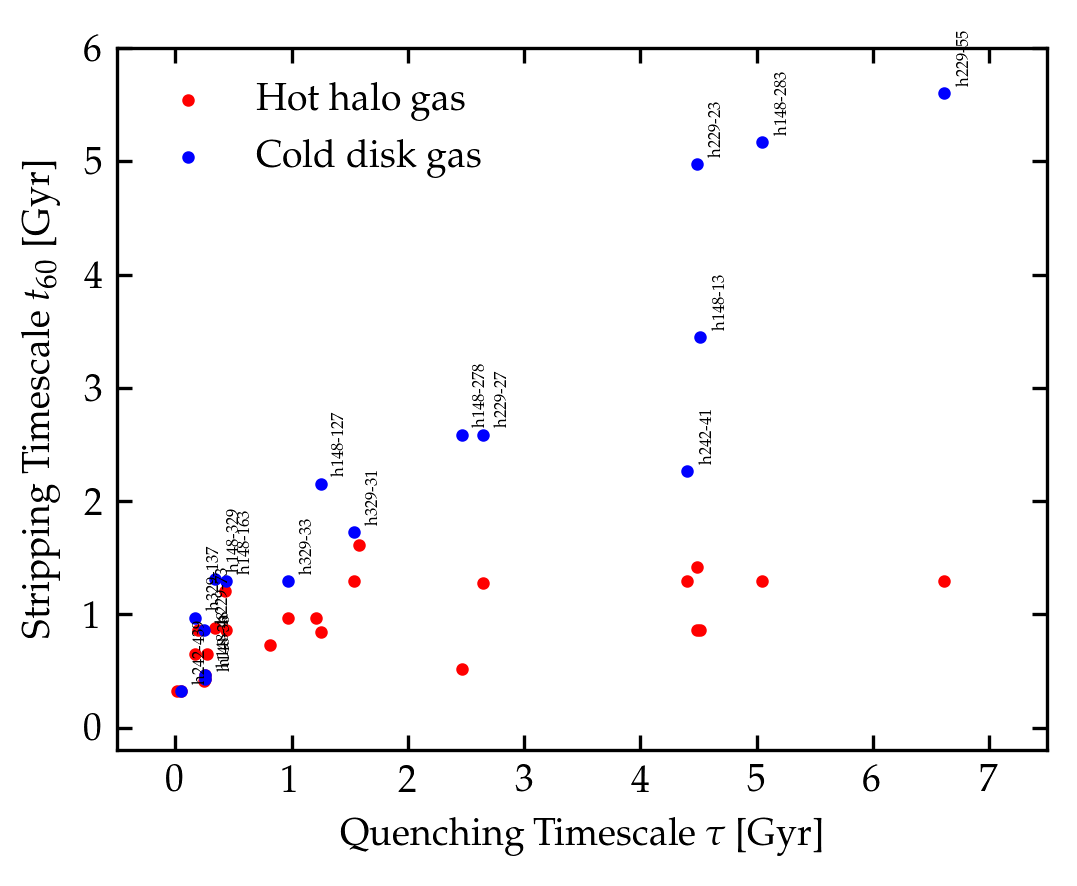

In [481]:
xmin, xmax = -0.5, 7.5
ymin, ymax = -0.2, 6

yscale = (ymax-ymin)*4/(xmax-xmin)

fig, ax = plt.subplots(figsize=(4,yscale),dpi=300)

ax.scatter(tau_hot, t60_hot, c='r', s=4, label='Hot halo gas')
ax.scatter(tau_cold, t60_cold, c='b', s=4, label='Cold disk gas')

ax.set_xlabel(r'Quenching Timescale $\tau$ [Gyr]')
ax.set_ylabel('Stripping Timescale $t_{60}$ [Gyr]')

ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.tick_params(direction='in',which='both')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

for i,(x,y) in enumerate(zip(tau_cold,t60_cold)):
    ax.annotate(str(sims_sorted[i]+'-'+str(haloids_sorted[i])),(x+0.1,y+0.1), rotation=90,size=4)

ax.legend(frameon=False)
plt.show()

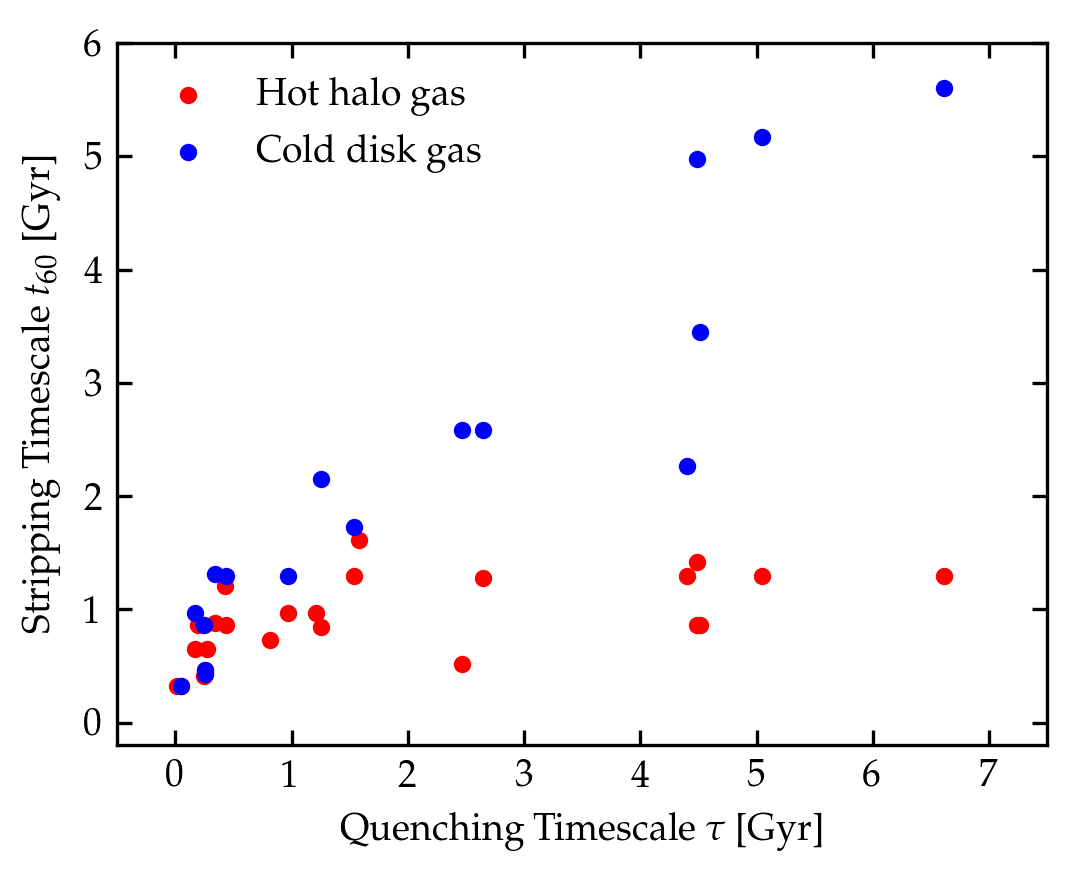

In [484]:
xmin, xmax = -0.5, 7.5
ymin, ymax = -0.2, 6

yscale = (ymax-ymin)*4/(xmax-xmin)

fig, ax = plt.subplots(figsize=(4,yscale),dpi=300)

ax.scatter(tau_hot, t60_hot, c='r', s=10, label='Hot halo gas')
ax.scatter(tau_cold, t60_cold, c='b', s=10, label='Cold disk gas')

ax.set_xlabel(r'Quenching Timescale $\tau$ [Gyr]')
ax.set_ylabel('Stripping Timescale $t_{60}$ [Gyr]')

ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.tick_params(direction='in',which='both')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

ax.legend(frameon=False)
plt.show()

In [486]:
# read_tracking_data('HotGasTracking-March6')
read_timescales()

M_star  haloid  n_star quenched   sim       tinfall  tinfall_lower  \
0   2.268773e+09       2  435389    False  h148  1.723922e+00       2.154902   
1   1.505383e+09       3  295443    False  h148  4.309804e+00       4.740784   
2   4.317847e+08       5   85749    False  h148  2.585882e+00       3.033698   
3   3.315968e+08       6   65528    False  h148  2.585882e+00       3.033698   
4   2.359537e+08       9   47542    False  h148  4.740784e+00       4.740784   
5   2.452897e+07      10    4919    False  h148  2.450751e-10       0.430980   
6   1.353323e+08      11   26093    False  h148  6.033725e+00       6.033725   
7   1.043767e+08      13   21027     True  h148  6.033725e+00       6.033725   
8   1.241519e+07      14    2459    False  h148  1.292941e+00       1.649847   
9   4.102691e+06      21     815    False  h148  1.723922e+00       1.723922   
10  3.907653e+06      24     787    False  h148           NaN            NaN   
11  1.004160e+08      27   20102    False  h148  7.326666e+00       7.326666   
12  8.417204e+07      28   16982     True  h148  7.326666e+00       7.326666   
13  3.741385e+05      30      76     True  h148           NaN            NaN   
14  3.171186e+06      32     634    False  h148  1.723922e+00       2.154902   
15  3.707061e+06      36     753     True  h148  3.447843e+00       3.878823   
16  5.759679e+06      37    1159     True  h148  4.740784e+00       4.740784   
17  2.948507e+04      41       6     True  h148  4.309804e-01       0.861961   
18  1.374093e+07      45    2789     True  h148  6.464706e+00       6.464706   
19  9.824078e+03      47       2     True  h148  3.447843e+00       3.878823   
20  1.272999e+05      48      25     True  h148  1.723922e+00       1.723922   
21  3.439065e+04      58       7     True  h148           NaN            NaN   
22  1.067540e+06      61     217     True  h148  4.740784e+00       5.191967   
23  1.965739e+04      65       4     True  h148  3.033698e+00       3.033698   
24  2.822993e+06      68     568     True  h148  5.602745e+00       5.602745   
25  3.001293e+07      80    6101     True  h148  7.326666e+00       7.326666   
26  1.473612e+04      81       3     True  h148  1.723922e+00       2.154902   
27  9.100373e+05      96     185     True  h148  4.740784e+00       4.740784   
28  2.456866e+04     105       5     True  h148           NaN            NaN   
29  8.358252e+04     119      17     True  h148  5.191967e+00       5.602745   
..           ...     ...     ...      ...   ...           ...            ...   
70  2.476346e+07       7    4954    False  h229           NaN            NaN   
71  1.720524e+05      17      35     True  h229           NaN            NaN   
72  3.338275e+06      20     672     True  h229  5.387255e+00       5.710490   
73  7.714878e+07      22   15673     True  h229  9.589313e+00       9.589313   
74  8.610682e+05      23     175     True  h229  6.356961e+00       6.356961   
75  4.786508e+06      27     973     True  h229  6.761005e+00       7.003431   
76  1.442006e+06      29       1     True  h229           NaN            NaN   
77  6.013067e+06      33      14     True  h229  2.801372e+00       2.801372   
78  4.572901e+05      52      93     True  h229  7.003431e+00       7.003431   
79  6.246040e+05      53     127     True  h229  7.649902e+00       7.649902   
80  6.790767e+06      55    1379     True  h229  5.710490e+00       5.710490   
81  6.882666e+04      59      14     True  h229           NaN            NaN   
82  2.949617e+04      61       6     True  h229  8.619608e-01       1.185196   
83  1.473842e+04      62       3     True  h229  4.094314e+00       4.094314   
84  2.715946e+06      73     552     True  h229  4.417549e+00       4.740784   
85  1.473623e+04     104       3     True  h229  7.973137e+00       8.296372   
86  2.292203e+06     113     466     True  h229  5.191967e+00       5.191967   
87  4.912074e+03     139       1     True  h229  4.094314e+00       4.094314   
88  5.9019